<h2> Table of contents</h2>
1. Introduction
2. Import libraries
3. #############
4. ##########
5. ###############
6. ###############
7. ###############
8. ###############
9. ###############
10. ###############
11. ###############
12. ###############
13. Conclusion

<h3><u>Instructions</u></h3>

<p>something good</p>

<h3><u>Import libraries</u></h3>

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 25)
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import requests
import json
import pprint
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

<h3><u>Upload Annual_Crime_Austin_2014_to_2016_update.csv </u></h3>

In [3]:
df_Crime_Austin_2014_to_2016 = pd.read_csv('Annual_Crime_Austin_2014_to_2016_update.csv')
df_Crime_Austin_2014_to_2016.head()

,GO Primary Key,Council District,GO Highest Offense Desc,Highest NIBRS/UCR Offense Description,GO Report Date,GO Location,Clearance Status,Clearance Date,GO District,GO Location Zip,GO Census Tract,GO X Coordinate,GO Y Coordinate
0,201610188.0,8.0,AGG ASLT ENHANC STRANGL/SUFFOC,Agg Assault,1-Jan-16,8600 W SH 71 ...,C,12-Jan-16,D,78735.0,19.08,3067322.0,10062796.0
1,201610643.0,9.0,THEFT,Theft,1-Jan-16,219 E 6TH ST ...,C,4-Jan-16,G,78701.0,11.00,3114957.0,10070462.0
2,201610892.0,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-16,701 W LONGSPUR BLVD ...,N,3-May-16,E,78753.0,18.23,3129181.0,10106923.0
3,201610893.0,9.0,THEFT,Theft,1-Jan-16,404 COLORADO ST ...,N,22-Jan-16,G,78701.0,11.00,3113643.0,10070357.0
4,201611018.0,4.0,SEXUAL ASSAULT W/ OBJECT,Rape,1-Jan-16,NaN,C,10-Mar-16,E,78753.0,18.33,NaN,NaN


<h3><u>Rename Column Names for df_Crime_Austin_2014_to_2016</u></h3>

In [4]:
df_Crime_Austin_2014_to_2016.rename_axis({'GO Location Zip':'Zip','Highest NIBRS/UCR Offense Description':'Austin_Offense_Description'},axis = 1, inplace=True)


<h3><u>Check for Duplicated Rows and dropna values in df_Crime_Austin_2014_to_2016 </u></h3>

In [5]:
number_of_Duplicated_Rows = df_Crime_Austin_2014_to_2016.duplicated().sum()
print('There are {} duplicated rows in df_Crime_Austin_2014_2016'.format(number_of_Duplicated_Rows))

There are 0 duplicated rows in df_Crime_Austin_2014_2016


In [6]:
df_Crime_Austin_2014_to_2016 = df_Crime_Austin_2014_to_2016.dropna()

<h3>Change zipcode to an object dtype in df_Crime_Austin_2014_to_2016 dataframe </h3>

In [7]:
df_Crime_Austin_2014_to_2016['Zip'] = df_Crime_Austin_2014_to_2016.Zip.astype(int)
df_Crime_Austin_2014_to_2016['Zip'] = df_Crime_Austin_2014_to_2016.Zip.astype(str)

<h3>Save df_Crime_Austin_2014_to_2016 as .csv file </h3>

In [8]:
df_Crime_Austin_2014_to_2016.to_csv('Final_Generated_Crime_Austin_2014_to_2016.csv',index=False)

<h3>Setup YELP  API Authentication</h3>

In [9]:
keys ={"client_id":"acsWZVrkgYT2pceSbVY3SA" ,
      "client_secret": "3P6HCoVLXl5IddCFs0yokn8fZ2gzkvzzatJaUjG0PJrD5Xi9gbPvrkBwYFwMmnMP"}

token = requests.post(url="https://api.yelp.com/oauth2/token",data=keys).json()

access_token = token['access_token']

headers = {'Authorization': 'bearer %s' % access_token}

<h3>Austin ZipCodes</h3>

In [10]:
#There are 48 different zip codes in the df_Crime_Austin_2014_2016 dataframe. 

austin_zips=['78735', '78701', '78753', '78724', '78741', '78704',
             '78748', '78758', '78744', '78747', '78756', '78759', 
             '78723', '78745', '78749', '78751', '78752', '78731', 
             '78702', '78722', '78705', '78757', '78721', '78739', 
             '78729', '78613', '78617', '78746', '78750', '78719', 
             '78703', '78736', '78653', '78727', '78652', '78754', 
             '78726', '78717', '78660', '78725', '78712', '78730', 
             '78742', '78728', '78732', '78737', '78733', '78610']

<h3>Yelp API Call by austin zipcode </h3>

In [11]:
#Create empty list for all the information pulled from yelp api

info = []

#Using the austin_zips list generate a json file for all the 48 austin zipcodes

for zips_codes in austin_zips:
    url = 'https://api.yelp.com/v3/businesses/search'
    params = {'location': zips_codes, 'sort_by': 'rating', 'limit' : 50}
    resp = requests.get(url=url, params=params, headers=headers).json()
    data = resp['businesses']
    info.append(data)
    

In [12]:
#pprint.pprint(info)

<h3>Generated Yelp Dataframe</h3>

In [15]:
len(list_lat)

2399

In [17]:
len(list_lon)

2399

In [14]:
#Store information from api in below empty lists

list_business_name = []
list_review_counts = []
list_ratings = []
list_zip_codes = []
list_id_business = []
list_city =[]
list_state = []
list_categories = []
list_address = []
list_lat = []
list_lon = []


#loop through json file containing all the information from Yelp API call

for x in range(len(info)):
    
    data = info[x]
   
    
    for item in data:
        list_business_name.append(item.get('name'))
        list_review_counts.append(item.get('review_count'))
        list_ratings.append(item.get('rating'))
        
        list_zip_codes.append(item.get('location').get('zip_code'))
        list_id_business.append(item.get('id'))
        list_city.append(item.get('location').get('city'))
        list_state.append(item.get('location').get('state'))
        list_categories.append(item.get('categories')[0].get('alias'))
        list_address.append(item.get('location').get('display_address')[0])
        list_lat.append(item.get('coordinates').get('latitude'))
        list_lon.append(item.get('coordinates').get('longitude'))                

In [18]:
#Generate df_Yelp_API dataframe

df_Yelp_API = pd.DataFrame({'Business_Name'   : list_business_name,
                            'Review_Counts'   : list_review_counts,
                            'Business_Ratings': list_ratings,
                            'Zip'             : list_zip_codes,
                            'Business_ID'     : list_id_business,
                            'City'            : list_city,
                            'State'           : list_state,
                            'Category'        : list_categories,
                            'Company_Address' : list_address,
                            'latitude'        : list_lat,
                            'longitude'       : list_lon})


df_Yelp_API.head(3)

,Business_ID,Business_Name,Business_Ratings,Category,City,Company_Address,Review_Counts,State,Zip,latitude,longitude
0,urban-mattress-south-austin-austin-2,Urban Mattress South Austin,5.0,furniture,Austin,5400 Brodie Ln,96,TX,78745,30.228722,-97.82285
1,healthy-pet-austin,Healthy Pet,5.0,petstore,Austin,4301 W William Cannon,123,TX,78749,30.221350,-97.83949
2,toast-entertainment-austin,Toast Entertainment,5.0,djs,Austin,"Austin, TX 78735",109,TX,78735,30.254790,-97.88913


In [19]:
#Checking to make sure they both have the same zipcodes
#100 rows need to be removed from yelp dataframe. This rows contain zipcodes which are out of scope for the analysis.

df_Yelp_API['Zip'].isin(austin_zips).value_counts()

True     2301
False      98
Name: Zip, dtype: int64

<h3>Double checking the length of Dataframe</h3>

In [20]:
#Double checking the length of Dataframe to ensure all rows contain zipcodes which are in scope

df_Yelp_API = df_Yelp_API[df_Yelp_API['Zip'].isin(austin_zips)]
df_Yelp_API.shape

(2301, 11)

In [21]:
#Comparing the number of Zips in df_Yelp_API and df_Crime_Austin_2014_to_2016

df_Yelp_API.Zip.nunique() == df_Crime_Austin_2014_to_2016.Zip.nunique()

True

<h3>Checking for duplicated columns in df_Yelp_API dataframe </h3>

In [22]:
#There are 1055 duplicated rows in this dataframe these will be deleted 

df_Yelp_API.duplicated().sum()

1060

In [23]:
#After Dropping the duplicated row the dataframe will have the following number of rows

len(df_Yelp_API) - df_Yelp_API.duplicated().sum()

1241

In [24]:
#drop duplicated rows in df_Yelp_API and keep the first 

df_Yelp_API = df_Yelp_API.drop_duplicates(keep='first')

#Checking length of df_Yelp_API to ensure it has the correct amount of rows

df_Yelp_API.shape

(1241, 11)

<h3>Create blank columns for df_Yelp_API dataframe to store all Reviews</h3>

In [25]:
#Create blank columns for df_Yelp_API dataframe to store Reviews 

df_Yelp_API['First_Review'] = " "
df_Yelp_API['Second_Review'] = " "
df_Yelp_API['Third_Review'] = " "

In [26]:
#Use Yelp API to place all reviews in review columns associated with df_Yelp_API dataframe

for index,row in df_Yelp_API.iterrows():
    review = row['Business_ID']
    
    url_review = 'https://api.yelp.com/v3/businesses/{}/reviews'.format(review)
    
    api_reviews = requests.get(url=url_review,headers=headers).json()
    pprint.pprint(api_reviews)
    
    df_Yelp_API.set_value(index,'First_Review',api_reviews['reviews'][0]['text'])
    df_Yelp_API.set_value(index,'First_Timestamp', api_reviews['reviews'][0]['time_created'])
    df_Yelp_API.set_value(index,'Second_Review',api_reviews['reviews'][1]['text'])
    df_Yelp_API.set_value(index,'Second_Timestamp', api_reviews['reviews'][1]['time_created'])
    df_Yelp_API.set_value(index,'Third_Review',api_reviews['reviews'][2]['text'])
    df_Yelp_API.set_value(index,'Third_Timestamp', api_reviews['reviews'][2]['time_created'])
    
#display df_Yelp_API dataframe after all information has be obtained   

df_Yelp_API.head(10)

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I was searching for a comfortable mattress and visited '
                      'several different stores in Austin. Deciding on a '
                      'mattress is no small decision.  But Troy was great...',
              'time_created': '2017-11-15 18:16:20',
              'url': 'https://www.yelp.com/biz/urban-mattress-south-austin-austin-2?hrid=pBFCXwUrSfK2fu7HUzJp7A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/xyxyOQpER96wH5XKR7P2kw/o.jpg',
                       'name': 'Pam Y.'}},
             {'rating': 5,
              'text': 'I was helped by a Hannah at this store and she was '
                      'helpful and informative but not pushy or a typical '
                      'mattress salesperson. I ended up purchasing my...',
    

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This was amazing! Dawn blew me away. She was so '
                      'knowledgeable, and got me back to full range of motion '
                      'and out of pain for the first time in weeks. The...',
              'time_created': '2017-11-12 12:41:10',
              'url': 'https://www.yelp.com/biz/zen-well-austin?hrid=D7NYV4SwSGALGAIzbdvAtg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/bPSbX5IWGRcMRK3YmUdXOQ/o.jpg',
                       'name': 'Jill J.'}},
             {'rating': 5,
              'text': 'Overall, a very unique massage experience!\n'
                      '\n'
                      'I did no research whatsoever on what exactly a Thai '
                      "massage is before coming here. That's smart, right? "
     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I wanted to write this review even though I never got a '
                      "chance to do business with Thockmorton's. I sent a "
                      'message asking if they would be able to fix a...',
              'time_created': '2017-09-12 15:09:52',
              'url': 'https://www.yelp.com/biz/throckmortons-austin?hrid=9O-V7c9QUsTMV7EtqoAK6A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/xXexg3xiF6JThht8_MJ8LA/o.jpg',
                       'name': 'Kate C.'}},
             {'rating': 1,
              'text': 'If you want to support businesses who support their '
                      'employees then Go somewhere else.\n'
                      '\n'
                      "I went to Throkmorton's for a new watchband on a 2nd "
       

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Craig came highly recommended by our realtor and I am '
                      'so glad I called him for our home inspection. Craig is '
                      'personable, thorough, efficient and very...',
              'time_created': '2017-11-04 06:23:34',
              'url': 'https://www.yelp.com/biz/third-coast-home-inspection-austin?hrid=VfqyG-DeQDiybiI8n_J8iw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/jlQojobG9PsZUVrFSV1CGQ/o.jpg',
                       'name': 'Meghann H.'}},
             {'rating': 5,
              'text': 'Craig was a recommendation from my realtor and she '
                      "couldn't be more right about him. Craig is super "
                      'personable and knowledgeable. He patiently explained, '
      

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': '10 years ago after having the coolant in my AC replaced '
                      'several times by another company l called Dash. After '
                      'promptly arriving they repaired the damaged...',
              'time_created': '2017-08-17 18:33:20',
              'url': 'https://www.yelp.com/biz/dash-service-company-austin-5?hrid=Z8KwzObrVeEucSJhODyAng&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Robert F.'}},
             {'rating': 1,
              'text': 'I understand that calling for AC repair on a Sunday '
                      'morning, in July, the on-call tech is going to be '
                      'swamped. But, still, waiting nearly 4 hours for a...',
              'time_created': '2017-07-30 11:19:25',
              'url': 'https://www.yelp.com

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I come here to get the lash lift/tint and I would 12/10 '
                      "recommend!! It's so nice to wake up and not have to "
                      "worry about putting mascara on bc you're still...",
              'time_created': '2017-10-12 16:21:30',
              'url': 'https://www.yelp.com/biz/pure-skin-spa-austin?hrid=V_thJoZfnzjytl6hK3A6mA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Stephanie J.'}},
             {'rating': 5,
              'text': 'If i could give Heather a thousand stars I would! First '
                      "off, let me say I'm from San Antonio, so I'm not super "
                      'familiar with Austin. I ended up going to...',
              'time_created': '2017-08-25 15:23:09',
              'url': 'https://www.yelp.com/biz

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Buddha's Brew makes my favorite kombucha EVER. I love "
                      'the taste, the variety of flavors, and the little '
                      'bottles with the peace sign on the bottom. My only...',
              'time_created': '2015-09-02 09:29:19',
              'url': 'https://www.yelp.com/biz/buddhas-brew-kombucha-austin?hrid=uB1j439K-Am1en5zHu_T4g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/DGveJF3WFYPm_ZRL_laL1w/o.jpg',
                       'name': 'Brandie M.'}},
             {'rating': 5,
              'text': 'THIS KOMBUCHA IS THE BEST and by far my absolute '
                      "favorite (and I've had a lot)!! All of their flavors "
                      'never disappoint. Great customer service. The '
             

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Ryan is a wonderful stylist: attentive, highly '
                      'experienced, personable, kind and a great listener.\n'
                      '\n'
                      'The entire experience was a joy from the moment I '
                      'walked...',
              'time_created': '2015-01-29 09:22:42',
              'url': 'https://www.yelp.com/biz/ryan-carrel-studio-austin?hrid=CANetLIyUIv4llL_r0OLSw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/3Jfpk37ixWs0X6AL-hR3GA/o.jpg',
                       'name': 'Xander M.'}},
             {'rating': 5,
              'text': 'Ryan does blonde like no other! He works his magic and '
                      'my bright blonde hair looks natural and grows out well! '
                      'He

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I know I'm just adding to the pile of positive remarks "
                      "about Nicole's work & manner, but it's worth noting. "
                      "It's the least I could do for what she has given...",
              'time_created': '2014-02-22 14:11:42',
              'url': 'https://www.yelp.com/biz/nicole-mlakar-photography-austin?hrid=2rewTFZEmzXy3ZP_R3dDvQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/zXuBaFw4RGy1dl5kDtj4AA/o.jpg',
                       'name': 'Leslie H.'}},
             {'rating': 5,
              'text': 'Nicole was such a joy to work with. Photoshoots can be '
                      'stressful to say the least, and Nicole made the entire '
                      'process so relaxing and fun. In addition, she...

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Came here for lunch had the rib sandwich and it was '
                      'delicious. If your in the market for BBQ hands down '
                      "this place has some awesome meat options you can't...",
              'time_created': '2017-09-28 11:25:33',
              'url': 'https://www.yelp.com/biz/slab-bbq-and-beer-austin-3?hrid=TJTmbwQ5Rqd7hcoHDurhaA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/HkKvQ4kjWuhzxqEEDykZ1w/o.jpg',
                       'name': 'Mark M.'}},
             {'rating': 2,
              'text': 'TL;DR synopsis of this Slab BBQ & Beer location:\n'
                      '- City slicker limited-menu BBQ--as in "Sammys"\n'
                      '- Half-off ribs on Tuesday nights are half-gristle\n'
               

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I'm ecstatic that I found this place. I love sushi with "
                      'all my heart and my boyfriend, well not so much. So '
                      'finding a place for date night that we can both...',
              'time_created': '2017-11-01 09:44:40',
              'url': 'https://www.yelp.com/biz/eurasia-sushi-bar-and-seafood-austin-2?hrid=xi9klS-sK6ZuEY87S5chow&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/tgulDMuxwMgSKzv3AODNYg/o.jpg',
                       'name': 'Ashley V.'}},
             {'rating': 4,
              'text': 'Okay, this is a plea to this restaurant to fix '
                      'something, figure something out, about your '
                      'ventilation/exhaust system! I am a huge fan of the food '
    

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Love all the vegan smoothies and juices here. Friendly '
                      'service as well. I highly recommend the originator!',
              'time_created': '2017-11-05 13:34:25',
              'url': 'https://www.yelp.com/biz/juiceland-austin-22?hrid=aRZC4U_E8pQF3Ln1-Gnr5Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/-DmPopOVmXnZ8yR6g06BkQ/o.jpg',
                       'name': 'Esther Y.'}},
             {'rating': 1,
              'text': 'Every single time I come here I think, "I could drive '
                      'home, make a smoothie and drink it in the time it takes '
                      'them to get my order to me."\n'
                      '\n'
                      'Edited to add:...',
              'time_created': '2017-0

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "He's pretty available so Brad has become my go-to "
                      'plumber in a pinch. Kitchen sink has a leak on a '
                      'Wednesday and guests are arriving for the weekend?! '
                      'Brad...',
              'time_created': '2017-11-14 20:33:28',
              'url': 'https://www.yelp.com/biz/brad-b-plumbing-services-austin?hrid=qEGSCN-u-Ku9_REyky30SQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/UghwqCMOyD-W4aiohcSVWg/o.jpg',
                       'name': 'Jennie K.'}},
             {'rating': 5,
              'text': 'Brad is responsive, courteous, and professional. He '
                      'showed up on time and contacted us to let us know that '
                      "he's on his way.\n"
        

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This awesome trailer puts out some of the best Thai '
                      "cuisine I've ever had the pleasure of experiencing.  "
                      "When it comes to Thai food I'm usually familiar...",
              'time_created': '2017-10-14 17:13:04',
              'url': 'https://www.yelp.com/biz/dee-dee-austin-2?hrid=GLcBCnFk6q60RRPN371nAg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/8Gm9-JCLpgyQiFf1IuCKYg/o.jpg',
                       'name': 'Chris M.'}},
             {'rating': 4,
              'text': "Dee Dee is an awesome food truck, and I'll definitely "
                      "be back when I'm craving good Thai food! I came here "
                      'with friends on a Friday night. Parking is just...',
              'time

{'possible_languages': ['en', 'es'],
 'reviews': [{'rating': 5,
              'text': 'Decadent style, lush in high class, but yet subtle and '
                      'elegant! I loved the layout, the design, and the '
                      'vibe... I felt like I was in a rich dim lit...',
              'time_created': '2017-11-12 12:01:18',
              'url': 'https://www.yelp.com/biz/the-roosevelt-room-austin?hrid=Fo7XztXwy0dqYtDMa0ZTjg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/Nu7aFNLJjE_N75W8IivbDA/o.jpg',
                       'name': 'Brett J.'}},
             {'rating': 4,
              'text': 'Who knew something so swanky existed in Austin? With a '
                      'dark but lit layout, extravagance pouring from drinks '
                      'made by likable bartenders and classiness...',
             

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Mole chilaquiles taco is sooo good! The corn tortillas '
                      'are amazing along with the salsas. \n'
                      '\n'
                      'The veggie taco is a hit too. \n'
                      '\n'
                      'The breakfast tacos can be a...',
              'time_created': '2017-11-22 15:22:59',
              'url': 'https://www.yelp.com/biz/grannys-tacos-austin?hrid=ClSKzfA4rLYB9E8EP5aMEw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/N2AG2Ayj-OG64nX7fODhIQ/o.jpg',
                       'name': 'Ty P.'}},
             {'rating': 5,
              'text': "If you are in Austin or live in Austin and you don't go "
                      'here you are a complete fool. \n'
                      '\n'
       

{'possible_languages': ['nb', 'de', 'en', 'es'],
 'reviews': [{'rating': 5,
              'text': "We arrived at 5:00 thinking we'd have plenty of time to "
                      'join the happy hour. We soon realized we were actually '
                      'late, and were lucky to get the last two...',
              'time_created': '2017-11-29 17:41:50',
              'url': 'https://www.yelp.com/biz/uchi-austin?hrid=QR6gWvqKLnt6my64VGM6qA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/oRXfNvJEXzrTifXtP3SSzQ/o.jpg',
                       'name': 'Laine C.'}},
             {'rating': 3,
              'text': 'Came to Uchi with a high level of anticipation for a '
                      'celebration. The place was, of course, packed at 9:00 '
                      'pm on a Friday night. When we arrived we were...',
         

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'You actually order through a food truck and there is a '
                      'seating area available if you decide to eat there.  I '
                      'visited around 9 pm and there were many bugs...',
              'time_created': '2017-08-06 04:49:34',
              'url': 'https://www.yelp.com/biz/las-trancas-austin?hrid=jO-El7WfoO_J5mgzGnUrzw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/dV6DNtfRrNlnRgmGdimd9w/o.jpg',
                       'name': 'Jorge N.'}},
             {'rating': 5,
              'text': "FINALLY, QUALITY TACOS THAT AREN'T $5 EACH.\n"
                      '\n'
                      "Las Trancas has some incredible tacos. I'd recommend "
                      'getting the pastor (usually my go to anywhere but '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Ya'll, I don't want to write this because I really "
                      'wanna keep the lines short but Kerlin is just as good, '
                      'if not better than all those nearby BBQ places...',
              'time_created': '2017-11-07 07:51:21',
              'url': 'https://www.yelp.com/biz/kerlin-bbq-austin?hrid=lD2iBSNgfNKLZDRkctEZrg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/bIF2jxM8iTkTKZ039gUipg/o.jpg',
                       'name': 'Lucy A.'}},
             {'rating': 5,
              'text': 'I spend $50k per year on food. Gourmet and down Home. '
                      'This is the best BBQ I have ever had. Why it was #4 on '
                      "eater's BBQ in Austin is beyond me. The line...",
              'time_

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "To drive home the point that's been made in the earlier "
                      'reviews: BEST PIZZA AND BEST BAR IN ALL OF AUSTIN. \n'
                      '\n'
                      'The pizza is tavern-style: square cut, thin...',
              'time_created': '2017-11-18 06:44:16',
              'url': 'https://www.yelp.com/biz/king-bee-lounge-austin-2?hrid=HiJd-8Sn2Y2NEAQqb3yFLg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/HgyOSO2qT1UKueHTs8mRZg/o.jpg',
                       'name': 'Liane T.'}},
             {'rating': 5,
              'text': 'This bar is everything. Everything is done with love '
                      'and authenticity. The pizza is so good (choosing '
                      'between pesto and tomato sauce is the hard

{'possible_languages': ['de', 'en'],
 'reviews': [{'rating': 5,
              'text': "It's Austin's front yard (courtesy of generous gifts by "
                      "A.J. Zilker in 1918 and 1932), and we're all invited to "
                      'come enjoy the 358 acres of expansive lawn,...',
              'time_created': '2017-09-12 14:07:27',
              'url': 'https://www.yelp.com/biz/zilker-park-austin-2?hrid=gUQSCYcBqUI7GU3hJM9i-Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/jh0vM_E2JLSPCod4ycW3Lw/o.jpg',
                       'name': 'Shannon B.'}},
             {'rating': 4,
              'text': "When I explore the inner-workings of a city, I'm always "
                      'on the lookout for public spaces that are designed for '
                      'public welfare and the occasional nap. Zilker...',
  

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Best. Breakfast. Tacos. Ever! Came to Austin for the '
                      'weekend and left so satisfied! \n'
                      '\n'
                      "Got the migas. Changed my life. I'll never be the same "
                      'woman after...',
              'time_created': '2017-11-20 06:27:36',
              'url': 'https://www.yelp.com/biz/veracruz-all-natural-austin-6?hrid=wURHidd6bSsSXBMVbGqG8Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/XPoqT3o8a-nDTlpnT373Og/o.jpg',
                       'name': 'Liz C.'}},
             {'rating': 4,
              'text': "This is a solid breakfast taco place. I didn't know "
                      'what migas were and had to google it. Apparently, it is '
                      'tortilla

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Ain't nothing better than some good ol' southern "
                      "comfort food--and it's breakfast food! \n"
                      '\n'
                      'I was strolling back to my car after ACL and was '
                      'surprised to see...',
              'time_created': '2017-10-08 14:39:47',
              'url': 'https://www.yelp.com/biz/biscuits-groovy-south-austin?hrid=Hw_ycRLYCXjnfujGJcB42Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/5bc4-3idXgi_6-2mp1SrUA/o.jpg',
                       'name': 'Kasper L.'}},
             {'rating': 4,
              'text': 'This place was soooo delicious! Perfect comfort '
                      'breakfast. I had the Johnny Cash made vegan, it was '
                      'great, howe

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'One night in Austin and boy did we strike gold.\n'
                      'This place was the jam.\n'
                      'If you love the most delicious Veggie going, then this '
                      'is your spot,...',
              'time_created': '2017-11-26 15:19:02',
              'url': 'https://www.yelp.com/biz/true-food-kitchen-austin-2?hrid=wMHcTH34tuu9KvvoNuUyPg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/2L56RrbmHp4R-qfXZZ9X4Q/o.jpg',
                       'name': 'Ian K.'}},
             {'rating': 3,
              'text': 'You should probably go...\n'
                      '\n'
                      'I hesitate to write a review after just one visit, but '
                      'this place deserves your attention. Why only a 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "For the last several years, I've been looking for a "
                      "cheesesteak place that is better than Phatso's, which "
                      'shut down. The hunt is over. Way South Philly...',
              'time_created': '2017-06-18 11:25:15',
              'url': 'https://www.yelp.com/biz/way-south-philly-austin?hrid=_m9rBcp25IOW_N5DfCM0Zg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/cf7O8QdUuHRFSA50jsx6CA/o.jpg',
                       'name': 'John H.'}},
             {'rating': 5,
              'text': 'Found this place through the advice of local Austin '
                      'Yelpers, so figured to check them out.\n'
                      '\n'
                      'I am glad that I did. The sandwiches were great '
     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'What can be said about this place that has not. Owners '
                      'are friendly , get to know their customers, the hot '
                      'dogs are fantastic blend of flavors and buns are...',
              'time_created': '2017-11-04 14:09:46',
              'url': 'https://www.yelp.com/biz/t-locs-sonora-hot-dogs-austin-4?hrid=2Mxi5fscy-8_vsR_wos6-A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/W6cLqjBfBCnqR-J2mc891w/o.jpg',
                       'name': 'Mike B.'}},
             {'rating': 2,
              'text': 'Mystified by all these 5 star reviews, which just goes '
                      'to show that people in Austin will pay almost anything '
                      'for a food item they are not familiar with....',
   

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Came here for lunch on a Saturday since I've heard so "
                      'much about the food here. My brother has been here '
                      'several times before and recommended the poke...',
              'time_created': '2017-10-21 18:39:30',
              'url': 'https://www.yelp.com/biz/the-big-kahuna-austin-3?hrid=L3T4S82aoyPvIM-tmR-RTg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/tQL7i6T052ZF-ulSXuoO5g/o.jpg',
                       'name': 'Nikita D.'}},
             {'rating': 4,
              'text': "A decent Hawaiian food truck. Not the best I've ever "
                      'had, but solid. I came when they were almost out of '
                      'everything (they had some catering stuff later in...',
             

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Though I came here to study; I stayed for the music and '
                      'the vibe. The lighting was a bit too dark to get any '
                      'reading done--granted I did come at 10pm on a...',
              'time_created': '2017-09-24 16:59:06',
              'url': 'https://www.yelp.com/biz/yahala-hookah-lounge-austin?hrid=O5KPlEwyxCIBoGJU6iFLWg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/6Y2D596hsuzMzwJvq1FLsQ/o.jpg',
                       'name': 'Tabias W.'}},
             {'rating': 4,
              'text': 'Leave it to Armenians to find a hookah lounge in Austin '
                      ':x\n'
                      '\n'
                      'Though kinda in the middle of nowhere, I really liked '
                      

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Finally found good breakfast tacos up north! Homemade '
                      'right in front of you. Migas was amazing and the '
                      "chorizo isn't greasy like most places. So happy to...",
              'time_created': '2017-10-21 07:23:30',
              'url': 'https://www.yelp.com/biz/jrs-tacos-austin?hrid=drrSvqc4eT0217jy19ja_Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/o3N5vvdPtz9bSHjHsqvflw/o.jpg',
                       'name': 'Landa C.'}},
             {'rating': 5,
              'text': "Found JR's taco on Yelp while I was have a cafeteria "
                      'food confidence crisis and did not want to spend '
                      'another dime there.\n'
                      'As the other reviews mention, 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Every time I come here with my wife we get the most '
                      'awesome customer service. The spot is really chill '
                      'atmosphere is great. Audi takes great care of us....',
              'time_created': '2017-10-13 18:55:24',
              'url': 'https://www.yelp.com/biz/hookah-buzz-austin-7?hrid=Ai3Dbv4J_ZOEQdGzcLmrdg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/27LWAuRN83jdG48m1J6zJg/o.jpg',
                       'name': 'Ken P.'}},
             {'rating': 5,
              'text': 'This place has literally the BEST paan hookah in ATX '
                      'hands down! The hookah will last you for hours..you get '
                      'new coals without having to ask, they play good...',
              '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Just tried some today and I'm totally hooked!!\n"
                      'Price is very affordable (varies from $1-5), open '
                      'Monday-Saturday 10-6, located near crossing of Parmer '
                      'Lane...',
              'time_created': '2017-10-11 12:01:52',
              'url': 'https://www.yelp.com/biz/bodhi-viet-veggie-cuisine-austin-8?hrid=iqG7MDH_jk9k1NB8Ap4ZsA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/lYNCRgIueji6-6XlCyn-CA/o.jpg',
                       'name': 'Thress S.'}},
             {'rating': 1,
              'text': 'I had the vegan rice dish and the veagn Bhan mi, both '
                      'were extremely dry, chewy and  underwhelming to say the '
                      'least. The fake vegan

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Gonna keep this brief: \n'
                      '\n'
                      'This is an adorable little coffee stand inside the new '
                      'Veracruz All Natural brick and mortar. I had a truly '
                      'stellar espresso and my...',
              'time_created': '2017-11-27 12:27:58',
              'url': 'https://www.yelp.com/biz/machine-head-coffee-austin?hrid=5tlosLMgzONm5YL7Tbum1A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/MVPDSOSzqWNcUPFu_sxRwg/o.jpg',
                       'name': 'Kasy S.'}},
             {'rating': 5,
              'text': 'Nolan & crew are the best there is. Just great coffee '
                      'people. It helps that they share a space with the best '
                      "tacos

{'possible_languages': ['en', 'es'],
 'reviews': [{'rating': 5,
              'text': 'Why 5 starts ? \n'
                      'Well first very nice people Sunday 2pm for launch  with '
                      'my family. We order the full family meal come with 2 '
                      'sides and whole chicken . We...',
              'time_created': '2017-11-20 01:37:34',
              'url': 'https://www.yelp.com/biz/inka-chicken-austin?hrid=JqjkT7_b6ADJ1gQ9uuq5QA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/F2XNPglNstBwzvOyaOzkPA/o.jpg',
                       'name': 'Tony E.'}},
             {'rating': 5,
              'text': 'AMAZING Rotisserie chicken! The chicken is super '
                      'flavorful and moist. I would recommend this place to '
                      'anyone and everyone. \n'
                 

{'possible_languages': ['en', 'es'],
 'reviews': [{'rating': 5,
              'text': 'This place is half restaurant, half bakery. An '
                      'authentic Mexican spot where everything is delicious!\n'
                      '\n'
                      'Restaurant has GREAT breakfasts tacos. They use...',
              'time_created': '2017-11-23 07:43:54',
              'url': 'https://www.yelp.com/biz/mi-tradici%C3%B3n-austin-3?hrid=dAGUlHqxVqZNzTog6pHNAA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/TzkfRQOnbPmnD0gtWDCjcQ/o.jpg',
                       'name': 'Cynthia A.'}},
             {'rating': 4,
              'text': 'So so so happy we went to this place!!! Very simple '
                      'establishment.  We had tortas and pastor tacos.\n'
                      'The tortas were great...the bread wa

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "First off, I don't really like the idea of eating from "
                      'food trucks but mannnn these tacos are amazing. If you '
                      "want real tacos come here. I've been to Mexico...",
              'time_created': '2017-07-18 18:47:16',
              'url': 'https://www.yelp.com/biz/tacos-y-tortas-el-chilango-austin-2?hrid=GkmCdBQyv2y0z09fR90RDQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'G V.'}},
             {'rating': 5,
              'text': 'This guerita LOVES tortas and this food truck does it '
                      'perfectly. The Torta Chilango is the BOMB. Get it! It '
                      "comes with everything I've ever wanted or...",
              'time_created': '2017-10-19 15:27:42',
              'url': 'https://www.yelp.c

{'possible_languages': ['fr', 'en'],
 'reviews': [{'rating': 5,
              'text': 'I came here for lunch with my boyfriend a couple days '
                      'ago for the first time and it was quite an '
                      'experience. \n'
                      '\n'
                      'Upon walking in, there was only one other...',
              'time_created': '2017-10-22 09:24:21',
              'url': 'https://www.yelp.com/biz/d-k-sushi-and-seoul-asian-food-market-austin?hrid=E3geHYmK44jaGjq7tS4Y1A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/vRmhJtm000PzYqPCft33JQ/o.jpg',
                       'name': 'Elizabeth S.'}},
             {'rating': 5,
              'text': 'Do not be fooled by the shabby exterior. Or the '
                      'graffiti, disco themed inside, and open mic looking '
            

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Best bubble tea in town! They have a large selection of '
                      'drinks from smoothies to slushies to milk teas. My go '
                      'to drinks are the iced Vietnamese coffee...',
              'time_created': '2017-11-10 16:07:35',
              'url': 'https://www.yelp.com/biz/teapioca-lounge-austin-3?hrid=pTgpAdCB-xJODaiEwtq7IQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/iIipNNABgPaLg_Oh2PeyMQ/o.jpg',
                       'name': 'Blair V.'}},
             {'rating': 5,
              'text': '* I love it here! This is my new favorite place! \n'
                      '\n'
                      '* Great service, amazing drinks and lovely little '
                      'lounge area! \n'
                      '\n'
 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I'm beyond delighted that we finally visited this place "
                      "last night. I truly feel as though we've found our new "
                      '"spot." \n'
                      '\n'
                      'First of all, the area is quite far...',
              'time_created': '2017-11-11 07:58:39',
              'url': 'https://www.yelp.com/biz/night-owl-austin-2?hrid=OC3BVCEKOmXAOR1u5xjIkA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/XASVjjI6lEl0qz4enuxwsQ/o.jpg',
                       'name': 'Yasmine J.'}},
             {'rating': 5,
              'text': 'I had my birthday party here during Hurricane Harvey.  '
                      'Everything was incredible.  Around 50 people showed up, '
                      'and Rob 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'We found Kit & Kaboodle on Yelp and are so glad we did! '
                      'Booking with them was very easy and convenient. When we '
                      'arrived I filled out a little info about my...',
              'time_created': '2017-05-11 06:18:19',
              'url': 'https://www.yelp.com/biz/kit-and-kaboodle-grooming-austin?hrid=Tl6gtWryvrw3cn6_f0bVmg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/29UDb9R9or2fEmgRzdCh8A/o.jpg',
                       'name': 'Arly D.'}},
             {'rating': 5,
              'text': 'Brought my little senior mutt here two times for his '
                      "bi-yearly cuts and they've always done a great job and "
                      'been super kind! \n'
                      '\n'
     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Several friends and I came here twice on a recent trip '
                      'to Austin.  The facilities are great, accommodating to '
                      'inexperienced shooters without being a...',
              'time_created': '2016-02-08 11:45:33',
              'url': 'https://www.yelp.com/biz/capitol-city-trap-and-skeet-club-manor?hrid=TEW9XWhetc3rdTdWnxvJrQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/ToIh6Ntwtr0Vp23-wMdReA/o.jpg',
                       'name': 'James J.'}},
             {'rating': 5,
              'text': 'Came here for the first time today with my husband, mom '
                      'and dad, we had a great time! It is really nice there '
                      'and very affordable. We bought the family...',
    

{'possible_languages': ['en'],
 'reviews': [{'rating': 2,
              'text': 'The quality of the vegetables from the farm is '
                      'exceptional and I will likely continue to buy from them '
                      'at markets, but the execution of the CSA is sub-par....',
              'time_created': '2015-08-04 11:31:45',
              'url': 'https://www.yelp.com/biz/green-gate-farms-austin?hrid=G6lhv4H2IsHmrAJTlbQ4fg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/nmE55oibNkUxbgopq67_gg/o.jpg',
                       'name': 'Stephen M.'}},
             {'rating': 5,
              'text': 'Toured this past week by invitation of one of the kids '
                      'that took their one week summer camp.  The enthusiasm '
                      'of the children was infectious.  They did not...',
       

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "We don't leave till tomorrow but so far this has been "
                      'the best B&B we have stayed at. This is a really nice '
                      'B&B really close to Austin. You get your own...',
              'time_created': '2016-01-30 19:46:09',
              'url': 'https://www.yelp.com/biz/decker-creek-bed-and-breakfast-and-biscuit-manor?hrid=GCSIGF4Pje22vs98NEII0w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/raRFewLK5b0hPwcDkYV0PQ/o.jpg',
                       'name': 'Edgar A.'}},
             {'rating': 5,
              'text': 'Pat and Byron are the greatest hosts. Cabin 2 is '
                      'perfect for any dog owner. It has a beautiful rustic '
                      'look with very detailed/themed decorations. A

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Their food is always hot, fresh, and delicious! AND '
                      'THEY DELIVER! \n'
                      '\n'
                      'We love the sesame chicken, egg rolls, house special '
                      'fried rice, chicken noodle...',
              'time_created': '2017-10-28 18:09:30',
              'url': 'https://www.yelp.com/biz/dragon-express-austin?hrid=7zbhV5EPfcxypEU2EzWaSg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/5B58_UFflHXu0C9HneQ75Q/o.jpg',
                       'name': 'Victoria H.'}},
             {'rating': 5,
              'text': "The food at this place is so amazing. It's gotten so "
                      'much better than I had there in the past. Our family is '
                      'so happy to hav

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Stopped here on our way down to Port Aransas for '
                      'vacation. Excellent tacos and gordita, and the salsa '
                      'was just hot enough with a great flavor. Will have '
                      'to...',
              'time_created': '2017-02-18 12:29:28',
              'url': 'https://www.yelp.com/biz/jds-tacos-austin?hrid=buaaM6NrqLb5NUaxmkTnQA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/qoE5O_qYgtr_eUrhG1K8cw/o.jpg',
                       'name': 'Aaron N.'}},
             {'rating': 5,
              'text': 'This place is amazing. I eat here all the time. The '
                      "chorizo and potato breakfast tacos are where it's at. "
                      'The people who work there are also really nic

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'First time helicopter ride overlooking beautiful '
                      'downtown Austin. I lived in Austin for many years, but '
                      'the friendly pilot points out places of interest....',
              'time_created': '2017-01-22 10:18:39',
              'url': 'https://www.yelp.com/biz/austin-helicopter-tours-austin?hrid=KqtgoWismANeDedDabgMjA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/QUo7LczVbCcyK2_Li4dQ2Q/o.jpg',
                       'name': 'Dana C.'}},
             {'rating': 5,
              'text': 'What an amazing time. Perfect way to sweep your date '
                      'off their feet. Start with a shorter flight to make '
                      'sure you can handle it lol. But if you can handle...',
     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Javier & Wallace came today to clean our furniture and '
                      'carpet.  They were VERY professional, introduced '
                      'themselves and knew their product.  They did a...',
              'time_created': '2017-07-07 08:04:48',
              'url': 'https://www.yelp.com/biz/stanley-steemer-austin-3?hrid=oiP-K8JGE9V58p2E8v1miw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Jim S.'}},
             {'rating': 1,
              'text': 'I received a quote through their online questionnaire. '
                      'I thought is was really expensive so I called to setup '
                      'and appointment for an on-site quote. When the...',
              'time_created': '2017-11-14 11:22:36',
              'url': 'https://www.yelp.com/biz/s

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Simply a great place that is helping Austin's youth and "
                      'volunteers understand where the food comes from and how '
                      'it gets to its destinations.\n'
                      '\n'
                      'I was able to...',
              'time_created': '2015-12-23 17:12:57',
              'url': 'https://www.yelp.com/biz/urban-roots-farm-austin?hrid=vPs49gm0GyI4luSnC4p8Kw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/ExzlNRnOuLJu3WnHrkFFvQ/o.jpg',
                       'name': 'Troy H.'}},
             {'rating': 4,
              'text': 'We had a great time at the Tour de Farm Event. Would '
                      'recommend it for next year. What a great concept for '
                      "changing the

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'If you are looking to have your car detailed, look no '
                      'further. I bought a used car and it needed a complete '
                      'detail inside and out. I dropped off my car and...',
              'time_created': '2017-11-26 20:01:18',
              'url': 'https://www.yelp.com/biz/auto-detailing-by-dub-coates-austin?hrid=POSZG4KnFejdjtmHoZunqA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/PftSff_zWB6PWp4sbgrjQQ/o.jpg',
                       'name': 'Ruby M.'}},
             {'rating': 5,
              'text': "Dub's work is better than any other detail group I have "
                      'used! Highly recommend!',
              'time_created': '2017-05-15 16:09:15',
              'url': 'https://www.yelp.com/biz/a

{'possible_languages': ['en'],
 'reviews': [{'rating': 4,
              'text': 'Pretty decent sized community with great access to '
                      'highways. Friendly staff.',
              'time_created': '2017-07-01 11:51:02',
              'url': 'https://www.yelp.com/biz/the-reserve-at-walnut-creek-apartments-austin-2?hrid=DBIACBJn4QgsroOMA2IvSg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/5ngFWQsE2JHP0iVSHJY9Ig/o.jpg',
                       'name': 'Jorge O.'}},
             {'rating': 1,
              'text': '***WARNING****This place is an absolute nightmare. The '
                      'Management staff is hands down the most incompetent '
                      'group of people you will ever work with....',
              'time_created': '2017-11-13 17:29:42',
              'url': 'https://www.yelp.com/biz

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'My experience was just like many of the other reviews '
                      'you will see about Green iPhone Repair. I reached out '
                      'to Lane and he got back to me quickly, gave me a...',
              'time_created': '2015-07-01 12:02:17',
              'url': 'https://www.yelp.com/biz/green-device-exchange-austin?hrid=9JqEHw80hMWfaeYpt_rKZQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/-GIT4poXnPuMJo6dUAWkBw/o.jpg',
                       'name': 'Raquel C.'}},
             {'rating': 5,
              'text': 'Lane and Green iPhone Repair has saved me and my phone '
                      "several times in the last two years. I'm such a clumsy "
                      'oaf that even with a brick case around my...',
     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Great experience. We have been several times both with '
                      'family and friends of all ages. This is not only '
                      'educational but an enjoyable and great work out....',
              'time_created': '2017-11-09 18:50:53',
              'url': 'https://www.yelp.com/biz/live-love-paddle-austin-2?hrid=vwKFoXM3Muz8qrh-iyEaiQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/UAdf7-MdUaHAFy41PQMZ9A/o.jpg',
                       'name': 'Elisa A.'}},
             {'rating': 5,
              'text': 'I went on the Bat Watching Tour and had a fantastic '
                      'time. The guide was very knowledgeable and friendly.. '
                      'The kayaking was a lot of fun, and the bats were...',
          

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Love this little spot in Austin. If you're going to "
                      "take pictures, Park down the street - don't try to stop "
                      'your car in the middle of the on the corner...',
              'time_created': '2017-09-17 08:26:07',
              'url': 'https://www.yelp.com/biz/greetings-from-austin-postcard-mural-austin?hrid=l2mBcHEueRhsJ9ZLstdS1g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/KD12DlPDf9SFVcanhRedcg/o.jpg',
                       'name': 'Phylicia P.'}},
             {'rating': 5,
              'text': 'What an awesome and iconic piece of Public Art in '
                      'Austin! \n'
                      '\n'
                      'Love the cute, "postcard" style and the colors!\n'
            

{'possible_languages': ['en', 'es'],
 'reviews': [{'rating': 5,
              'text': 'What can I say... this place is BOMB. I find myself '
                      'craving home slice ALL. THE. TIME. I love their '
                      'margherita pizza. Delicious slices of melted '
                      'mozzarella...',
              'time_created': '2017-11-24 00:27:26',
              'url': 'https://www.yelp.com/biz/home-slice-pizza-austin?hrid=8ZWwwIb2InLVFvtRFoFmaQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/VSgpr1-s2TcoGXKw8W679A/o.jpg',
                       'name': 'Claudia C.'}},
             {'rating': 4,
              'text': "$18.50 for a medium pizza that's actually really big. "
                      'Got half pepperoni and mushroom (#5) and half sausage, '
                      'ricotta cheese, and roasted

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This place is now my favorite pho joint! The food is '
                      "delish and everything is so clean. It's a little "
                      'different from the usual sit in pho places, because...',
              'time_created': '2017-11-17 18:50:35',
              'url': 'https://www.yelp.com/biz/pho-please-austin-3?hrid=7n11WoX-Z2tMGDuriD59ug&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/iDxPnFo9Yk-UYCQR0vTlyw/o.jpg',
                       'name': 'Jamie G.'}},
             {'rating': 5,
              'text': 'I ate here last night, and my boyfriend and I agreed '
                      "that it's the most amazing pho we had ever eaten. The "
                      'service was awesome too. They had our appetizer...',
              '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Yup yup yup! I needed to find a coffee spot stat and '
                      'trusty yelp led me to the right place once again.\n'
                      '\n'
                      "This place is so freaking tiny and adorable I can't...",
              'time_created': '2017-10-24 11:36:19',
              'url': 'https://www.yelp.com/biz/fleet-coffee-austin?hrid=UCv0bWazc25AZBfB4kL-7w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/tgulDMuxwMgSKzv3AODNYg/o.jpg',
                       'name': 'Ashley V.'}},
             {'rating': 4,
              'text': 'This is where you might find most of the hipsters in '
                      'Austin since it has great coffee and '
                      'cool/modern/unassuming decor. :)\n'
                   

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Absolutely fantastic and authentic Jamaican food. Well '
                      "eclipses good I've had in the Bahamas and absolutely "
                      'worth a trip!!!\n'
                      '\n'
                      'I had the jerk chicken and it...',
              'time_created': '2017-10-27 13:00:18',
              'url': 'https://www.yelp.com/biz/tonys-jamaican-food-austin?hrid=KqVJIvazZER_N8ttWWlgOQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/xaurs84o5hAwYr0tCGPR8Q/o.jpg',
                       'name': 'Amila D.'}},
             {'rating': 4,
              'text': "Service: To be honest, I don't remember because I was "
                      "too busy eyeing everyone else's food. \n"
                      '\n'
                 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Thai-ful is AMAZING! If you are looking for authentic '
                      'Thai food with a twist (aka in roll form) I highly '
                      'recommend this food truck. The staff are as amazing...',
              'time_created': '2017-11-21 12:40:00',
              'url': 'https://www.yelp.com/biz/thai-2-u-austin-5?hrid=r4Bo8ERtoLlNhXifH1TIBQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/GzNFLAUwKV_cPEBxa8Motg/o.jpg',
                       'name': 'Daniel S.'}},
             {'rating': 5,
              'text': 'Great flavor, great food, super great customer service, '
                      'Thai Tea is the best!\n'
                      'Extreme menu!\n'
                      'Fresh and natural ingredients.\n'
                    

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'People like Daniel Brown are the reason we moved to '
                      'Austin. Kind, honest and hardworking and it shows in '
                      'his approach to business and the quality of food....',
              'time_created': '2017-07-28 17:42:40',
              'url': 'https://www.yelp.com/biz/browns-bar-b-que-austin?hrid=nJWdPFkgz_QSQMOliL4PRg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/-8mu9xht5PvvDLRxcHZTYw/o.jpg',
                       'name': 'Mark M.'}},
             {'rating': 4,
              'text': "I liked this food more than la BBQ. And I didn't have "
                      'to wait 2 hours for an over rated place\n'
                      'Browns is moist, juicy, great flavors\n'
                      'Walked from 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Our first breakfast/brunch spot in Austin,TX and it '
                      "definitely didn't disappoint. At first we were actually "
                      'planning to check out another spot but the line...',
              'time_created': '2017-11-10 16:43:29',
              'url': 'https://www.yelp.com/biz/patika-austin?hrid=_YAiVV6OaHZwP4u7Qjlq1Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/LuWSLZHL8u2ULu3TbU25dQ/o.jpg',
                       'name': 'Anna M.'}},
             {'rating': 4,
              'text': 'One of the better lit and modern feeling coffee places '
                      'in Austin with great coffee and tea and plenty of '
                      'chairs and plugs. \n'
                      '\n'
                      "Par

{'possible_languages': ['en', 'es'],
 'reviews': [{'rating': 5,
              'text': "SO GOOD! Finding a great veggie burger isn't an easy "
                      'feat, but I think Hopdoddy has one of the best. We '
                      'would also recommend the El Diablo burger! The...',
              'time_created': '2017-11-19 12:28:43',
              'url': 'https://www.yelp.com/biz/hopdoddy-burger-bar-austin?hrid=-SCYgNUqZyWPtBEom-UnjQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/2QKuU8_vPJkeOxYvqAtD6w/o.jpg',
                       'name': 'Joanie G.'}},
             {'rating': 5,
              'text': "I've been here several times since moving to Austin. "
                      'Whether I go for burgers or just some fries & '
                      "margaritas, they've been equally as accommodating. "
            

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Always a professional and pleasant experience when we '
                      'visit.  Would recommend this office to anyone searching '
                      'for a caring environment for their family.',
              'time_created': '2017-09-22 07:44:31',
              'url': 'https://www.yelp.com/biz/petite-dental-and-orthodontics-austin-2?hrid=MrKpIVl_qLEglPLTia9ISw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/m9yZHXQXEYfMN9Hj7a5ovw/o.jpg',
                       'name': 'Stephanie S.'}},
             {'rating': 5,
              'text': 'I was deathly afraid of taking my two year old to the '
                      'dentist because I had some traumatic dental treatments '
                      'as a child.. After reading reviews for Petite.

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Live Oak DJ was a pleasure to work with throughout the '
                      'planning process of our wedding. Shay was very user '
                      'friendly as we requested a quote and additional...',
              'time_created': '2017-11-20 19:34:56',
              'url': 'https://www.yelp.com/biz/live-oak-dj-austin?hrid=Lk-M0-N-E_2eLR_mFvlgSg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/mdWLgdDBJ9OyiN0NG4boJw/o.jpg',
                       'name': 'Allie G.'}},
             {'rating': 5,
              'text': 'We used Live Oak DJ to hire Jaime Diaz as the DJ for '
                      'our wedding this pst October. We would highly recommend '
                      'doing the same. The company was professional...',
              't

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I like that they make the tacos for you fresh, not '
                      'pre-rolled waiting under a heat lamp. And that the rest '
                      'of the customers you wait with tend to be...',
              'time_created': '2017-11-26 19:33:25',
              'url': 'https://www.yelp.com/biz/taqueria-morales-austin?hrid=t5QS8ZYp-uGzAKC1pfiZ9g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/-E7JDU6TYTFKlXRIy1jv4w/o.jpg',
                       'name': 'Lorrie C.'}},
             {'rating': 5,
              'text': "I'm going to go ahead and throw 5 stars here because "
                      'this place is fckn legit.  I came here for breakfast '
                      'twice last weekend.  Their tacos have quickly...',
              'tim

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'My move went very smoothly due to Brick by Brick '
                      'Moving. Elaine was helpful with scheduling the move and '
                      'Brian worked hard to move my things in a timely...',
              'time_created': '2017-10-26 07:58:26',
              'url': 'https://www.yelp.com/biz/brick-by-brick-moving-austin-3?hrid=dYopiqKPA0RQq24Ss8DpVw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/A4763W-UQDpy2xlc47Li3w/o.jpg',
                       'name': 'Taylor W.'}},
             {'rating': 1,
              'text': 'I was impressed with the reviews of Brick by Brick so I '
                      'contacted them by email on May 13 to ask about getting '
                      'an estimate for an interstate move.  Tim (the...',
  

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'UPDATE: Danielle and Theresa did it again! My upstairs '
                      'bathroom floor in particular never looked so clean...\n'
                      '\n'
                      "We just had twins and we're totally unprepared...",
              'time_created': '2017-11-21 21:51:24',
              'url': 'https://www.yelp.com/biz/welcome-home-cleaning-services-austin-4?hrid=VG6gBrgrnK3gHyYuWPHaDw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/HzkdxpdQnMM4Ryni12ZcbA/o.jpg',
                       'name': 'Jennifer S.'}},
             {'rating': 5,
              'text': 'Danielle and Teresa just arrived from Welcome Home.   '
                      'Hurray!  They have been cleaning at our home for 3 '
                      "months now.   I d

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I was so disappointed in so many of the taqueria places '
                      'in Austin.  Sub par tortillas, fillings and salsas.  My '
                      'daughter looked on Yelp & this was our...',
              'time_created': '2017-06-06 11:51:22',
              'url': 'https://www.yelp.com/biz/casa-linda-taqueria-austin?hrid=SpehGLmHLM8aFX5dkDU6XA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Norma B.'}},
             {'rating': 4,
              'text': "I'm not sure I understand all the five stars but this "
                      'is definitely good for a gas station taco. The Migas '
                      'plate with beans and potatoes is good but the...',
              'time_created': '2017-10-18 17:13:44',
              'url': 'https://www.yelp.com/biz/c

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "What impressed me about Del's:\n"
                      '1.  Answered the phone early in the morning during the '
                      'listed time.\n'
                      '2.  Fit me in during a tight 5 hour window the same day '
                      'I...',
              'time_created': '2016-07-01 08:27:31',
              'url': 'https://www.yelp.com/biz/dels-heating-and-air-conditioning-austin?hrid=L1V2bHn_C_RmeRXBKyk8gA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/HthfK6IZU85TJ46vVk77KQ/o.jpg',
                       'name': 'Bill H.'}},
             {'rating': 5,
              'text': "I'm late in writing this, but had such a great "
                      'experience with these guys when my a/c broke down last '
                     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'My second hair appt for highlights condition and '
                      'eyelashes by Nicky. I am so happy to have found someone '
                      'that does my hilites perfectly ! Nicky is...',
              'time_created': '2017-11-16 18:44:13',
              'url': 'https://www.yelp.com/biz/mane-trendz-austin-2?hrid=Jr5jKM5QUY6XR4XdP_HyYw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/6g0vkNAEk7SrqlVr6rR6Cg/o.jpg',
                       'name': 'Ronnie M.'}},
             {'rating': 5,
              'text': "The salon had a fun, laid back vibe...  I can't wait to "
                      'go back.  Mika was my stylist and this girl did an '
                      'amazing job!  I am one to never be pleased with...',
              'time_

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Love the store!  Every question I asked, they a '
                      "answer.   Every product I need, they had it!  Wasn't "
                      'too sure if the disc I like was good for me.  No...',
              'time_created': '2017-04-14 13:04:50',
              'url': 'https://www.yelp.com/biz/disc-nation-austin-2?hrid=WRZpnPBmuy_l6SMna0zJ4Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Vincent H.'}},
             {'rating': 5,
              'text': '*Update* Without fail or issue, they just keep on '
                      'improving!\n'
                      '\n'
                      ' I spent a few (uh-hum) moments (more like an hour or '
                      'so) there yesterday and I will say that...',
              'time_created': '2014-12-30 13:43:26'

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'PROFESSIONAL QUALITY SERVICES BY CERTIFIED ARBORIST '
                      'WITH\n'
                      'PRICES  OF NEIGHBOR WITH CHAINSAW\n'
                      '     Jason and crew trimmed 40 trees, dozens of bushes '
                      ',together...',
              'time_created': '2017-06-09 14:14:00',
              'url': 'https://www.yelp.com/biz/the-tree-man-austin-2?hrid=qXhpuda7TA_ya0h8XNqg3w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/DMM33-e30jz777s4mcyGOw/o.jpg',
                       'name': 'Michael B.'}},
             {'rating': 5,
              'text': 'My trees look soooo good now! I had a great experience '
                      'Oct 2017 with Jason, Anabelle, and the rest of the '
                      'crew. Durin

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I was referred to Smile Creations and Dr. Matthew Heck '
                      'by my sister and I am beyond pleased with this '
                      'practice.  \n'
                      '\n'
                      'Upon first meeting Dr. Heck, he took a...',
              'time_created': '2017-09-14 13:16:20',
              'url': 'https://www.yelp.com/biz/smile-creations-austin-5?hrid=27XOsAYmpuYNBn5xpNqxSA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/ga9ZFbfUEvz_oo9jO_Xgxg/o.jpg',
                       'name': 'Benjamin M.'}},
             {'rating': 5,
              'text': 'Referred by my adult daughter. She knows my phobia of '
                      'dental work keeps me from routine maintenance and I '
                      'only go i

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Very impressed with the quality of work and '
                      'professionalism of the entire organization.  We have '
                      'very high standards and this company has truly '
                      'impressed...',
              'time_created': '2017-11-07 06:33:08',
              'url': 'https://www.yelp.com/biz/hometown-decking-and-decorative-concrete-austin?hrid=LiqpiXj46_KJqU6UOh89AQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Jackie M.'}},
             {'rating': 5,
              'text': 'Fantastic work at a fair price. Mike met with me and '
                      'explained the process of our project very well. He gave '
                      'me a quote which was what we ended up paying...',
              'time_created': '2017-07-25 08:11:01

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Grayzer fixed an electrical issue in my house today. I '
                      'would definitely recommend them to anyone.\n'
                      '\n'
                      'I just moved into a new home, and the previous owners '
                      'had...',
              'time_created': '2017-11-14 18:57:05',
              'url': 'https://www.yelp.com/biz/grayzer-electric-austin-2?hrid=6F7Z18PJQbqbpSrvrOCamw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/m_IW_AeWwh877VKgq9_Ibw/o.jpg',
                       'name': 'Tony Y.'}},
             {'rating': 5,
              'text': 'Totally recommend this company. I used their services '
                      'for installing a 240V outlet for my i3 EV Fast '
                      'Charging. Thei

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'After looking at other crossfit gyms in Austin, I '
                      'finally found CrossFit Rep. I really enjoyed the '
                      'classes and everyone was super friendly and '
                      'encouraging....',
              'time_created': '2017-06-28 13:48:17',
              'url': 'https://www.yelp.com/biz/crossfit-rep-austin?hrid=9K52SNRpEKdqQEgiDOYnKQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Krysta B.'}},
             {'rating': 5,
              'text': 'I visited Austin on a Texas brewery tour and after '
                      'multiple days of beer and Southern grub, I needed to '
                      'squeeze in a good WOD. I pulled up YELP and listed...',
              'time_created': '2017-03-16 14:28:02',
              'url': '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I have been training in both Kung Fu and Tai Chi at '
                      'Shaolin-do for a little over a month now. The '
                      'instructors are great, and there is no shortage of '
                      'people...',
              'time_created': '2017-07-07 10:28:14',
              'url': 'https://www.yelp.com/biz/shaolin-do-kung-fu-and-tai-chi-austin?hrid=RPFWKpp6dn0omwlC3ZazZg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/pm1ZxgwobqKouYHjdIXLkA/o.jpg',
                       'name': 'Julie W.'}},
             {'rating': 5,
              'text': 'Shaolin-do Kung Fu and Tai Chi is much more than a '
                      'place to get healthy and learn some cool martial arts!  '
                      "This is a community.  I

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I think that when you're looking for a new coffee "
                      'joint, the most important thing to take into account '
                      'when reading reviews is what KIND of coffee they...',
              'time_created': '2017-09-03 21:18:07',
              'url': 'https://www.yelp.com/biz/sorrentos-drive-thru-coffee-austin?hrid=QpK1YbeFIzqzH2DvtM9MyA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/osCWbvPTLfvHHKaAOPtY_w/o.jpg',
                       'name': 'Tiffany L.'}},
             {'rating': 5,
              'text': "Doesn't look like much from the outside but this place "
                      'is super quick and super delicious! \n'
                      '\n'
                      'Well worth a trip out of your way to get

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Have I just discovered BREAKFAST TACOS  HEAVEN?!! Why '
                      'yes at $1.75! Homemade tortilla and the tacos are '
                      'packed full! \n'
                      '\n'
                      "It's inside of the Shell's gas...",
              'time_created': '2017-11-09 09:34:02',
              'url': 'https://www.yelp.com/biz/tierra-linda-taqueria-austin?hrid=t4UAom1nwC-2hKO8s7K4gg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/GL3H66lPkbQsPf58orNgYA/o.jpg',
                       'name': 'Ty N.'}},
             {'rating': 3,
              'text': 'The first thing you see is tortillas being made. The '
                      'tortillas are pretty thin but also slightly crispy at '
                      'the same time.

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Where can I start.... I absolutely love this place, and '
                      'I crave it every day. This restaurant is always well '
                      'kept. The service is great, and the people who...',
              'time_created': '2017-11-14 18:23:19',
              'url': 'https://www.yelp.com/biz/korean-grill-austin?hrid=O3nivfS0TUPThuBrUotLpw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/nrwl3CBwZSBqv3B0jtUGWw/o.jpg',
                       'name': 'Vanischa S.'}},
             {'rating': 1,
              'text': 'Oh man, I was so disappointed in this place. I really '
                      "don't like giving low stars to small businesses but "
                      'man, me and my friends left with a sour taste in...',
          

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I got a Yelp account just to share how amazing my '
                      'experience at Spoleti Salon was.\n'
                      'Not only did Kate get back to me RIDICULOUSLY fast '
                      '(literally about 5...',
              'time_created': '2017-10-05 09:38:36',
              'url': 'https://www.yelp.com/biz/spoleti-salon-austin?hrid=FMELX18NfndCZtPHqZlWKQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/zVBCs85U4WuavP5nwSSMAQ/o.jpg',
                       'name': 'Miranda W.'}},
             {'rating': 5,
              'text': "This is the first review I've written for Yelp, and I "
                      'think my experience at Spoleti was definitely worth the '
                      'wait. I was in town from Houston on a

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'The cutest and best massage studio in Austin, and trust '
                      "me, I've tried just about every single one. I love the "
                      'waiting room and the vibe overall (every...',
              'time_created': '2017-09-22 08:49:55',
              'url': 'https://www.yelp.com/biz/the-massage-studio-austin?hrid=NIpPWChacHH_SodO3YXH8Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/W5wkgnVn7nPmQCVEgoonDg/o.jpg',
                       'name': 'Angela C.'}},
             {'rating': 5,
              'text': 'I had a great massage from Jonathan and I have already '
                      'referred your business to two friends. I enjoyed and '
                      'appreciated the energy and vibe, as well as the...',
         

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I'm so glad I found this place on Yelp!\n"
                      '\n'
                      "It's right down the street from me which is super "
                      "convenient since I'll totally be back anytime I need "
                      'body work...',
              'time_created': '2017-07-14 16:37:35',
              'url': 'https://www.yelp.com/biz/discount-body-shop-austin?hrid=ZSPJMvyYu0_8MGY5rabM4A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/m0LkN55gms5PPs7DupclyQ/o.jpg',
                       'name': 'Alanah M.'}},
             {'rating': 5,
              'text': 'Wow..  they did a terrific job in our car. We are very '
                      'satisfied with the results. We had a small repair and '
                      'they ga

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Super solid mechanic.  Robert was really nice and they '
                      "took care of my precious Volvo.  I wouldn't really "
                      'trust it anywhere else.  They seem honest enough...',
              'time_created': '2017-09-26 17:20:17',
              'url': 'https://www.yelp.com/biz/capital-v-connection-austin?hrid=8mlkZAI01WdFa1W452bxBQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/Vd7shsGuwhbjUL5yse1tng/o.jpg',
                       'name': 'Ryan P.'}},
             {'rating': 4,
              'text': 'I had a good experience here. Took a recent used V70 '
                      'buy into them to have it looked at. They did a good job '
                      'identifying issues to keep an eye on and fixed...',
      

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I can't say enough wonderful things about Britton and "
                      'his team. They have far exceeded any expectations I had '
                      'for a dog walking company and I would give...',
              'time_created': '2017-11-01 11:29:41',
              'url': 'https://www.yelp.com/biz/walk-atx-pet-care-austin?hrid=GQPTshQZV5cBLjYAjvUM6g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Alison A.'}},
             {'rating': 5,
              'text': 'We hired the Walk! ATX Pet Care team to take care of '
                      'our fur baby, Chewy, when we moved to Austin a year '
                      "ago. It's been amazing to have such a caring,...",
              'time_created': '2017-04-18 19:51:29',
              'url': 'https://www.yelp.com/biz/wa

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Computer Medic is a great local company with a great '
                      'owner.\n'
                      'My MacBook was facing the ever popular issue where upon '
                      'start up appeared a flashing folder with...',
              'time_created': '2017-06-30 13:09:54',
              'url': 'https://www.yelp.com/biz/computer-medic-austin?hrid=4xI-QUjl8Ia3BJpAozmphQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/eQMehO9g7Y8lQQgfBFN7Ww/o.jpg',
                       'name': 'Hunter H.'}},
             {'rating': 5,
              'text': 'I found Computer Medic on Google and gave them a try. '
                      'They were quick, responsive and reasonably priced. They '
                      'were also friendly, professional 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This place is awesome\n'
                      '\n'
                      'Super chill vibe, amazing coffee, friendly staff. I may '
                      'or may not be addicted to their kolaches... all their '
                      'pastries are...',
              'time_created': '2017-07-15 06:57:21',
              'url': 'https://www.yelp.com/biz/caf%C3%A9-cr%C3%A8me-austin?hrid=eNR7qxjfrE28BMJ_v2Ou9w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/m0LkN55gms5PPs7DupclyQ/o.jpg',
                       'name': 'Alanah M.'}},
             {'rating': 4,
              'text': 'I like this place.  Great coffee, great food.  And the '
                      'crowd is nice.  Very diverse.\n'
                      '\n'
                      'What I lo

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This place is amazing.\n'
                      '\n'
                      'I was expecting great barbecue, but Leroy and Lewis is '
                      'much more than that.  There is so much thought, '
                      'creativity and spot-on...',
              'time_created': '2017-10-29 10:26:21',
              'url': 'https://www.yelp.com/biz/leroy-and-lewis-barbecue-austin?hrid=GkYJ9v5AUJMqQdRIVkAUqg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/oycthnoPH4FCBxQWICjFBQ/o.jpg',
                       'name': 'Michael H.'}},
             {'rating': 4,
              'text': 'Highly fatty, highly delicious. This little trailer has '
                      'some dang good meat and some amazing sandwiches. I love '
                      't

{'possible_languages': ['en', 'es'],
 'reviews': [{'rating': 5,
              'text': 'My favorite place! These tacos are legit, and the '
                      'salsas are awesome. 100% recommended. So glad and happy '
                      'to see that they now are open Thursdays.',
              'time_created': '2017-10-04 16:26:25',
              'url': 'https://www.yelp.com/biz/tacos-las-amazonas-austin?hrid=3y0-T4efwC7u1uFcIqz03w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/_jHPMqsG-WDpv06zkvKeOw/o.jpg',
                       'name': 'Karina P.'}},
             {'rating': 4,
              'text': 'Suuuuuper nice people (they even threw in a free extra '
                      'taco when they found out we were first timers!) and '
                      "they're open LATE all the time, which is...",
              'time

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Twig visited Jade agaIn August 29, 2017 after a run in '
                      'with a skunk the night before. I bathed and bathed and '
                      'bathed him finally getting rid of most of the...',
              'time_created': '2017-09-01 08:11:32',
              'url': 'https://www.yelp.com/biz/austin-pet-stylist-austin?hrid=4H8DVTbHORN-yVUoeb802g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/3vGCYNWJWdUFp40kPnAxFA/o.jpg',
                       'name': 'Kate F.'}},
             {'rating': 4,
              'text': 'They did a great job on my little pooch! Friendly '
                      'staff, and he seemed happy and not at all stressed when '
                      'I picked him up! I wish the fur cut were a little...',
       

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Since moving to the US 20 yrs ago from Karachi, '
                      "Pakistan - I've been looking in every city for a legit "
                      "kabab roll to no avail. Anything I've ordered in...",
              'time_created': '2017-11-04 14:36:13',
              'url': 'https://www.yelp.com/biz/bun-n-kabab-austin-2?hrid=Nyv8PpAxGHtSzJYus5YI_Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/Nw--VKhhpWSIl9GVsw2k3Q/o.jpg',
                       'name': 'Muhammad A.'}},
             {'rating': 5,
              'text': 'Wow. Go. Try. Their. Food. Now.\n'
                      '\n'
                      "I've been meaning to try this place out and finally "
                      'did. \n'
                      '*sidenote- check their hours!

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Ashley Jamieson with Strüb Residential is absolutely '
                      'amazing!\n'
                      '\n'
                      'My husband and I started our new home journey by '
                      'interviewing another well-reviewed realtor...',
              'time_created': '2017-11-28 09:51:48',
              'url': 'https://www.yelp.com/biz/mark-str%C3%BCb-str%C3%BCb-residential-austin-3?hrid=35nLiZSggMvtzVQyKxQ7JQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/6ztHI4UIPCojJDAh5D2HrA/o.jpg',
                       'name': 'Natasha S.'}},
             {'rating': 5,
              'text': 'We found Mark on NextDoor when it was time to sell our '
                      "house in Crestview recently, and we're so happy we did! "
    

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'We have been going to capital Park pediatric for two '
                      'years it has never been anything but a positive and '
                      'enjoyable experience my son no longer dreads going...',
              'time_created': '2017-10-05 14:53:59',
              'url': 'https://www.yelp.com/biz/central-park-pediatric-dentistry-austin?hrid=CucelM27j8dDoKBEZ48PKQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/CAqVmvFq8rFARg9eRKwInQ/o.jpg',
                       'name': 'Pearl W.'}},
             {'rating': 5,
              'text': 'Staff is professional and very nice. Dr took his time '
                      "explaining our options and didn't seemed rushed. I will "
                      'continue to take my children!',
           

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I went to Dancer's Shape for a year before moving out "
                      "of town and I miss it SO MUCH. It's such a good workout "
                      'and the instructors are tough but very...',
              'time_created': '2017-07-25 17:21:02',
              'url': 'https://www.yelp.com/biz/dancers-shape-barre-fitness-austin?hrid=AAQ2tpQm9JsB5wWQUk1kdw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Brenda S.'}},
             {'rating': 4,
              'text': 'I have only tried one class here so far, but it kicked '
                      'me a** for 3 days! I was super sore. This workout '
                      'routine is no joke! The instructors here really...',
              'time_created': '2016-07-24 13:34:17',
              'url': 'https://www.yelp.co

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I cannot express the love I have for BOB Salon...Payton '
                      'has turned my hair into Platinum Gold! She is so sweet, '
                      'and she KNOWS what she is doing!! 10 stars!',
              'time_created': '2017-09-28 19:42:34',
              'url': 'https://www.yelp.com/biz/bob-salon-austin?hrid=6JLb9kEoKiwUFD80880wbQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/nMTBrxWG6k-KXWfhBsLwUg/o.jpg',
                       'name': 'Cyndi G.'}},
             {'rating': 5,
              'text': 'Let me preface by saying that I have gone to the same '
                      'guy for my hair for over 10 years. I moved to Austin '
                      'over a year ago and have been putting off finding...',
              'ti

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "It's time to update your review if the place changes "
                      'locations right? \n'
                      '\n'
                      'Sweet Ritual now has its own spot with lots of flavors, '
                      "not just soft serve! I can't...",
              'time_created': '2017-11-27 15:24:28',
              'url': 'https://www.yelp.com/biz/sweet-ritual-austin?hrid=ok3yfq1mEohhqssXv9k3Eg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/flzZGP5foGP95ifbNaR2YA/o.jpg',
                       'name': 'Lesley W.'}},
             {'rating': 5,
              'text': "Hands down best vegan ice cream I've ever had! We got "
                      'their peanut butter chocolate and the matcha.\n'
                      '\n'
              

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I gotta be honest.  I only get my hair cut about twice '
                      "a year and I'm not super adventurous when it comes to "
                      'my hair.  HOWEVER, I am certain that if and...',
              'time_created': '2017-11-18 20:23:29',
              'url': 'https://www.yelp.com/biz/slate-hair-salon-austin?hrid=aClMYxEenbj1u2870iN5_g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/vtePtp5wme2yfSYoxIVN4Q/o.jpg',
                       'name': 'Lora P.'}},
             {'rating': 5,
              'text': 'We booked Helen to do my sisters hair for her wedding '
                      'and two bridesmaids hair. I cannot say enough about '
                      'Helen. She does amazing work, and she has an...',
              'ti

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Awesome and so down to earth.\n'
                      'My wife and I had a pedicure done yesterday afternoon '
                      "and to make it short, we have, Happy Feet'  ;)\n"
                      '\n'
                      'Very clean, very...',
              'time_created': '2017-10-31 15:57:33',
              'url': 'https://www.yelp.com/biz/red-betty-austin?hrid=6domCrcFkqGZetg_yi-RBQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/v7-B22b7uXr8eVtqW20JLA/o.jpg',
                       'name': 'Robert H.'}},
             {'rating': 1,
              'text': 'The woman who usually does my nails just left my '
                      "favorite salon and the salon's prices have been "
                      'creeping up, so I thought I woul

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Doing a review of just Austin Books and Comics is a '
                      "little unfair. It doesn't capture just how big this "
                      'place actually is. \n'
                      '\n'
                      'AB&C is more of a compound;...',
              'time_created': '2017-10-05 09:26:24',
              'url': 'https://www.yelp.com/biz/austin-books-and-comics-austin?hrid=VJNBjhKeQ5Gw8FxgRDEQOQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/spe7PXV52SkGPXpJsYVCXw/o.jpg',
                       'name': 'Randol H.'}},
             {'rating': 5,
              'text': "I can't tell you how impressed I am with this "
                      'comic/collectibles shop. They pretty much have '
                      'everything you woul

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Tried Jewboy Burger about a week ago and it was '
                      'delicious! I went all out and got the Oye Vay Guey, '
                      'latkes, and a black and white cookie and was so happy '
                      'I...',
              'time_created': '2017-11-27 07:40:45',
              'url': 'https://www.yelp.com/biz/jewboy-burgers-austin?hrid=PKO48apo9Ey1AGqF-zvaXg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/cFYDmkeUs3c3X_vbb5ccQw/o.jpg',
                       'name': 'Kait C.'}},
             {'rating': 5,
              'text': "It's hard not to fall instantly in love with a "
                      'tongue-in-cheek moniker helmed by a guy who you can '
                      'tell has a passion about what he does and is '
 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This place is so clean and straight forward. \n'
                      '\n'
                      "Best haircut I've ever received - full service neck "
                      'shave, hot towel, powder, vibrating neck massage....',
              'time_created': '2017-08-24 09:00:11',
              'url': 'https://www.yelp.com/biz/the-grand-barbershop-austin?hrid=7JrAuYZufOCuBsmABOqtDg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/JhePFMHMo5CJ50Wko-TNlQ/o.jpg',
                       'name': 'Dillon R.'}},
             {'rating': 3,
              'text': "I've been a customer for 1.5 years and love this place. "
                      'They cut my hair and beard right, the aesthetic is '
                      "great, and it's across the street fro

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I just want to send out a big wonderful thank you to '
                      'Water Damage Restoration And Roofing of Austin. We had '
                      'a flood in our kitchen, and we called and sent...',
              'time_created': '2017-11-25 16:17:29',
              'url': 'https://www.yelp.com/biz/water-damage-restoration-and-roofing-of-austin-austin?hrid=Mts3qANDLfAhoDas1uxYQg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/lnPX9z-5Y3cJW9KiwD3S4Q/o.jpg',
                       'name': 'Mary Y.'}},
             {'rating': 5,
              'text': 'These guys are amazing.  We called and JP showed up '
                      'almost immediately.  They set up dehumidifiers, etc '
                      'same day.  Long story short is they f

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Excellent service. I've on multiple occasions booked "
                      'cars very late notice with no issue. To date have used '
                      'the service at least ten times. I had a minor...',
              'time_created': '2017-07-24 19:34:26',
              'url': 'https://www.yelp.com/biz/boulevard-chauffeur-austin-6?hrid=TbkVQEb5AD06ElsbLno7zQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/AI5OjUqmusk4G43dBYM6Gg/o.jpg',
                       'name': 'Salwa K.'}},
             {'rating': 5,
              'text': 'Excellent service. Great attitude- very down to earth. '
                      'Very reliable and professional service and the prices '
                      'are competitive as well. Highly recommend.',
            

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': '10/22/2017 Dear Gabby, your therapists and your front '
                      'desk staff continue to shine.  I had a great massage. I '
                      "won't say who with as then it becomes more...",
              'time_created': '2017-10-22 14:36:27',
              'url': 'https://www.yelp.com/biz/massage-sway-austin?hrid=y-wcTKgtv3EUaVpxbEq1kg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/VMQrnWrGGG1_KbBZyGtyrw/o.jpg',
                       'name': 'Joe N.'}},
             {'rating': 2,
              'text': 'My friend and I were looking for a decently priced spa '
                      "for my sister's bachelorette party and we stumbled "
                      'across Massage Sway.  There were tons of raved...',
              'time_

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Danielle offers incredible customer service, she's "
                      'always available and very friendly. Luxe was able to '
                      'provide the exact unit I needed for my space in the...',
              'time_created': '2017-07-29 04:32:02',
              'url': 'https://www.yelp.com/biz/luxe-laundry-rentals-austin?hrid=-977iv0JBQ9cO8q1f7v5Yw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/OCF9BkcQYQm1Fs6hZMeHxg/o.jpg',
                       'name': 'Jenna R.'}},
             {'rating': 5,
              'text': 'I have been so impressed with Luxe! I recently signed a '
                      '6 month lease for an apartment complex that did not '
                      'provide washers/dryers...luckily I found...',
           

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Starting this year, my car's been needing to have its "
                      'oil topped off around every 3-4 months. I decided to '
                      'come in here earlier in the year to see what all...',
              'time_created': '2017-11-09 15:36:38',
              'url': 'https://www.yelp.com/biz/great-hills-shell-austin?hrid=Rk-5TP9W0Q9i7c3IqLjwnQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/IUQXe4WREgKMJMfWtafVLQ/o.jpg',
                       'name': 'Janet W.'}},
             {'rating': 5,
              'text': 'Came here last weekend to do some car maintenance (oil '
                      'change, transaxle fluid change, and tire rotations). '
                      'There was already a bit of a wait when I arrived...',
      

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I've been taking my 2010 Prius to Auto Techs for "
                      "scheduled maintenance for 2 years now and I've had a "
                      'positive experience every time! I feel they have...',
              'time_created': '2017-06-08 18:31:13',
              'url': 'https://www.yelp.com/biz/austin-auto-techs-austin?hrid=I4Fz0vzkdsWwayAldd79og&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/9Biw3WQS5cyHLuIAJ3qrfg/o.jpg',
                       'name': 'Renee D.'}},
             {'rating': 3,
              'text': 'Made an appointment the morning of for an oil change '
                      'and they got in a couple hours later. Craig was '
                      'friendly and accommodating. I ended up getting an '
                    

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Smallish restaurant so seating gets quite limited '
                      'during the crush.  Located up north off Parmer in a '
                      'fairly nondescript strip mall.  \n'
                      '\n'
                      'I tend to forgo the...',
              'time_created': '2017-07-25 13:49:55',
              'url': 'https://www.yelp.com/biz/tomodachi-sushi-austin?hrid=Px_AHHLWRr_slYK6OCjI6Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/5q6qNT4xN6SoMNNCWIcYSQ/o.jpg',
                       'name': 'Andrew C.'}},
             {'rating': 4,
              'text': 'This is your "diamond in the rough" sushi spot as '
                      'located in small strip center on Palmer just off '
                      'Mo-pac.\n'
       

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I should really be focusing on work right now, but I '
                      'feel compelled to write a review for Mantis Massage. \n'
                      '\n'
                      "I've been going to the Airport location since...",
              'time_created': '2017-07-05 12:59:52',
              'url': 'https://www.yelp.com/biz/mantis-massage-austin?hrid=XsBWSgqou_NEVs78bJ-Tdw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/Bx-dHBdHOBKhTSi1Kr3aHQ/o.jpg',
                       'name': 'Lauren M.'}},
             {'rating': 5,
              'text': "If Makala was a musician, she'd be a bass cellist. For "
                      'the NY Philharmonic.  \n'
                      '\n'
                      "It's hard to imagine sensual with full 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Yum! Fresh and tasty delicious. Super friendly staff. \n'
                      'Pictured is the cinnamon twist, chocolate and vanilla '
                      'cake donuts, blueberry cake, regular with...',
              'time_created': '2017-08-04 04:41:13',
              'url': 'https://www.yelp.com/biz/s-h-donuts-austin?hrid=mvCKahHTffFt1_DVUT1kTA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/qEKiKoWIOmO2C_sC-4cGEA/o.jpg',
                       'name': 'Alisa C.'}},
             {'rating': 5,
              'text': 'These are the best tasting doughnuts in town. I can '
                      'vouch for the glazed, chocolate glazed, and cake '
                      'varieties.',
              'time_created': '2017-11-20 14:28:08',
            

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I would choose Cabo over chipotle any day! I love how '
                      "fresh the ingredients taste and you can't go wrong with "
                      'their fried fish. They make the tortilla in...',
              'time_created': '2017-10-26 22:53:43',
              'url': 'https://www.yelp.com/biz/cabo-bobs-burritos-austin-2?hrid=kfp3JyK8Ib7zmdBzOBjvQw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/VSgpr1-s2TcoGXKw8W679A/o.jpg',
                       'name': 'Claudia C.'}},
             {'rating': 5,
              'text': 'Best fish tacos IN LIFE EVER...cooked to order home '
                      'made tortillas...omgggg, what more could you ask '
                      'for?!?\n'
                      '\n'
                      'Grea

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Wonderful Experience! \n'
                      'Visiting Austin for a conference at convention center, '
                      'looking for a dinner and live music experience, away '
                      'from the dives and...',
              'time_created': '2017-10-19 13:44:08',
              'url': 'https://www.yelp.com/biz/ginos-vino-osteria-austin?hrid=LWvcJhz_cKBKetBzKnWRiA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/D56zLDRc2sKAc3DK6aexJA/o.jpg',
                       'name': 'Jennifer C.'}},
             {'rating': 4,
              'text': 'This is more a 4.5 stars than 5 review. \n'
                      'Location and ambience -- located in a quiet-ish '
                      'neighborhood of Austin with convenient parking. '
    

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I have been a regular here for about 3 years. I get a '
                      'side of hashbrowns & a large border crossing gravy. The '
                      'hashbrowns are cooked perfectly (crispy on the...',
              'time_created': '2017-10-06 14:52:40',
              'url': 'https://www.yelp.com/biz/gravy-austin?hrid=0bskqkjjhX8PqTzUFyEArQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/3o29KKbWTlp11ri8CoadNA/o.jpg',
                       'name': 'Jeannie L.'}},
             {'rating': 4,
              'text': 'I frequently order here from ubereats when hungover. I '
                      'love getting the smothered hash browns and biscuits and '
                      'honey butter. The breakfast sandwich was...',
              'time_

{'possible_languages': ['en', 'es'],
 'reviews': [{'rating': 5,
              'text': '5 Stars for service, cleaning, scheduling! \n'
                      '\n'
                      'Harper Carpet Care is amazing and can handle any of '
                      'your carpet cleaning, stretching, and stain removal '
                      'needs....',
              'time_created': '2017-11-08 08:09:54',
              'url': 'https://www.yelp.com/biz/harper-carpet-care-austin?hrid=OGQ_rVYD-JDY4Ku0CXH-ig&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/6Ju1koiXgP2z8Vpq3kPhKg/o.jpg',
                       'name': 'Dillar S.'}},
             {'rating': 5,
              'text': "Don't go any other place!  This is the VERY BEST!!!!\n"
                      'Jamie came to my house and he was the nicest man ever.  '
                     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Awesome fast service!\n'
                      'I needed a 220v outlet for my EV. I got 10 bids and '
                      'while Amp was not the cheapest, it was the most honest '
                      'by providing an hourly rate...',
              'time_created': '2017-08-25 15:27:20',
              'url': 'https://www.yelp.com/biz/amp-up-electric-austin-2?hrid=GzCE5LA71wSgoovZZdIvpQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/xUpjqz1hj7GnhGCkdzuVig/o.jpg',
                       'name': 'Gene N.'}},
             {'rating': 5,
              'text': "If you've hired contractors in the past, you've "
                      "probably noticed that they're not always easy to get a "
                      'hold of, or insanely expensive, or book

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': '5+. More stars if I could. There are many pet-sitting '
                      'services in Austin that are excellent, and my '
                      'experiences with the different services have all '
                      'been...',
              'time_created': '2015-07-08 17:35:29',
              'url': 'https://www.yelp.com/biz/jennifurrrs-pet-sitting-and-dog-walking-austin?hrid=h8dqYIs7lGb11QSaYRJEmA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/tNgpqCwmTjaWnWP85W9gUQ/o.jpg',
                       'name': 'Sarah B.'}},
             {'rating': 5,
              'text': 'Jennifer did such an amazing job sitting our two cats '
                      'while we were on a 10 day vacation. We got daily text '
                      'messages with u

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Incredible service - helped me out with my Tao Tao '
                      'Scooter headlight issue.  But then at my request went '
                      'over the whole scooter and tuned and tightened....',
              'time_created': '2017-09-13 14:22:48',
              'url': 'https://www.yelp.com/biz/austin-city-power-sports-austin-2?hrid=c4eQ1z08seMIHauAOJaWoQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/QYxTNAkE5qQNFfMIf7GIRw/o.jpg',
                       'name': 'Richard A.'}},
             {'rating': 1,
              'text': 'Brought them my scooter about half a year ago. I simply '
                      'wanted it to get spark but took them forever to get to '
                      "it to end up telling me they don't really...",
  

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I had a complete blockage in one of my ears and so I '
                      'called up Better Hearing Center of Austin after '
                      'searching Google and seeing the reviews here. They '
                      'have...',
              'time_created': '2017-07-06 19:29:50',
              'url': 'https://www.yelp.com/biz/better-hearing-center-of-austin-austin?hrid=WgnK2LlzQU86wwDq9jj6-Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/lNAZADKa_NjVzucwHg8_Ng/o.jpg',
                       'name': 'Kevin G.'}},
             {'rating': 5,
              'text': 'Saleem is incredibly thorough and very informative with '
                      'what he is doing. I went in and he cleared up all the '
                      'ear wax in my righ

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I needed a veterinarian for my two small breed dogs and '
                      'searched on yelp for a highly recommended vet and found '
                      'Dr. Erin May. She had a assistant with her...',
              'time_created': '2017-10-17 11:47:23',
              'url': 'https://www.yelp.com/biz/whole-pet-mobile-vet-austin?hrid=yp3rlD6_b4sQw8F0LyhNuQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/WzNeTaopTmDahMp0CXY3-A/o.jpg',
                       'name': 'Gina H.'}},
             {'rating': 5,
              'text': 'Dr. May has been a life changer for my kitty. He is '
                      'such a love, but absolutely hates going to the vet. He '
                      'LOVES when she comes to see him. She is...',
              '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I can't say enough great things about Georges! I was "
                      'connected with him through one of my best friends '
                      'several years ago to get updated head shots for my...',
              'time_created': '2014-01-22 11:04:33',
              'url': 'https://www.yelp.com/biz/mr-photographer-austin?hrid=GHCSs8vgqrYQeAo9A2_Slg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/gGO70vPesMM900A3-Sg4XA/o.jpg',
                       'name': 'Shelly R.'}},
             {'rating': 5,
              'text': 'Georges is our one stop shop when it comes to '
                      'photography. Working at a construction company, we '
                      'contract with him for our employee headshots and '
                      '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Mike does it all at Atlas Realty!  He is professional, '
                      'an expert, pressure free, to the point, genuine, prompt '
                      'at returning calls, emails or even text...',
              'time_created': '2017-06-08 15:24:43',
              'url': 'https://www.yelp.com/biz/atlas-realty-austin-6?hrid=DcucIN7wJE723x_QbG5XEw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/LhmMIQPQs88ro3LjEgQIPQ/o.jpg',
                       'name': 'Valencia G.'}},
             {'rating': 5,
              'text': 'Without a doubt, the Austin market is competitive. Home '
                      "buying isn't very fun (for most people). \n"
                      '\n'
                      'Mike was able to help in purchasing what I want

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I really liked this place. Its not cramped for one and '
                      'the techs are super nice. I really enjoyed Dr. Hunt! '
                      'She was thorough, and I liked how soothing she...',
              'time_created': '2017-06-22 06:52:51',
              'url': 'https://www.yelp.com/biz/love-pet-hospital-austin?hrid=zQ3W4a7dN2djk8j0RVxrCw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/B8oKh4OfGQEi6MQdU8IUew/o.jpg',
                       'name': 'Kalen T.'}},
             {'rating': 1,
              'text': 'There may be treatments here that benefit patients. As '
                      "a human, I've heard nothing good about chiropractic "
                      "practice. As a pet owner who didn't know where...",
          

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I am very happy with the care I received/d at Eye Tech. '
                      'Dr. Lamei has seen me twice, and both visits have been '
                      'thorough, well conducted and "narrated" to...',
              'time_created': '2017-08-25 14:26:58',
              'url': 'https://www.yelp.com/biz/eye-tech-austin?hrid=dzL-B36QiOorYdMcSyzvuQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Luca B.'}},
             {'rating': 5,
              'text': 'Dr. Lamei and staff always provide 5-star service. Each '
                      'visit I am surprised by how much time she spends with '
                      'me to ensure I understand the tests...',
              'time_created': '2017-11-23 07:14:22',
              'url': 'https://www.yelp.com/biz/eye-tech-austin?h

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I don't know how you could get any better!  Promptly "
                      'greeted, friendly service man who was clearly '
                      'competent.   I was second in line but still got out '
                      'in...',
              'time_created': '2017-06-30 09:48:08',
              'url': 'https://www.yelp.com/biz/oil-works-austin?hrid=4sJvMv35jFZVpXGDmnI9Qg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/yBtyNZgTUjz35iIj-sIctg/o.jpg',
                       'name': 'Cyndi J.'}},
             {'rating': 5,
              'text': 'Moved to Austin 2 months ago and needed a new place to '
                      "change the oil in mine and my wife's cars! Boy did I "
                      'find the pot of gold! These guys are amazing 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Ross and his team at LNFE are rockstars! The whole '
                      'process from start to finish was professional, '
                      'organized, and stress-free. We met with Ross a few '
                      'months...',
              'time_created': '2017-06-28 19:04:35',
              'url': 'https://www.yelp.com/biz/look-no-further-entertainment-austin?hrid=wGsjT7k36dXmk4TxT2L4RQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/4MmG1VUlR-Zxg3WvLP6i2A/o.jpg',
                       'name': 'Joan G.'}},
             {'rating': 5,
              'text': 'Ross and his team did a fantastic job for our wedding '
                      'last week at Pecan Springs Ranch.  My wife and I really '
                      'enjoyed working with h

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Called Andy on a Friday afternoon because we forgot to '
                      'get and ECAD audit done prior to listing a home. They '
                      'got me in at the last minute with no questions...',
              'time_created': '2017-05-29 20:01:08',
              'url': 'https://www.yelp.com/biz/earth-energy-audits-austin?hrid=EXPdPIRHxY_oP3qW1cSddg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/khgeeY9BCaUA-0sq0KDcxw/o.jpg',
                       'name': 'Abel S.'}},
             {'rating': 5,
              'text': 'We are in the process of selling our house and my agent '
                      'told me that I need an energy audit, so I called Earth '
                      'Energy, Coby from the team showed up the next...',
     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'The planets aligned, the moon eclipsed, unicorns danced '
                      'on rainbows, and one other thing happened this weekend: '
                      'I WAS SEEN BY MY STYLIST AT MY APPOINTED...',
              'time_created': '2017-10-14 16:31:27',
              'url': 'https://www.yelp.com/biz/sadis-beauty-works-distribution-austin?hrid=BBV4SnT0AiJIYvUnD6_iTg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/j9lWmRhEakamF9DJ5BGaUA/o.jpg',
                       'name': 'Emily C.'}},
             {'rating': 5,
              'text': "Can't say enough how much I love my new haircut. Sadi's "
                      'is my new fav hair salon now !!! Not only Sadi gave me '
                      'the hair cut exactly what I wanted; she gave..

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This is the perfect place to START your craft journey. '
                      'I bought a grocery bag of used art supplies for under '
                      '$10.00. My last set of brand new colored...',
              'time_created': '2017-06-09 18:28:03',
              'url': 'https://www.yelp.com/biz/austin-creative-reuse-austin?hrid=Mci1KtSfWV7zjN2qWObhJg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/vRjHEmjFdp6pXN2Joct2Zw/o.jpg',
                       'name': 'Jules F.'}},
             {'rating': 5,
              'text': 'I about had heart failure when I walked in the door and '
                      'saw all the yarn! Then I went around the corner and saw '
                      'even more yarn! And knitting needles. And...',
           

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Good, honest business!!\n'
                      'Archie came out to give us an estimate for painting our '
                      'house that had been painted poorly when it was flipped '
                      'by the previous...',
              'time_created': '2017-11-03 11:22:45',
              'url': 'https://www.yelp.com/biz/doug-gorton-professional-painting-austin?hrid=-07FEmMQeH7v0w-4W8eWBw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/c34ti-BYbwXrpz6eorvFWw/o.jpg',
                       'name': 'Emily C.'}},
             {'rating': 4,
              'text': 'These guys took on a MAJOR painting project for us. We '
                      'are very particular, and want things done in a '
                      'professional manner from star

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Such a cute and classy boutique! Lots of goodies for us '
                      'big girls too. Kristie was very helpful and makes sure '
                      'I leave with exactly what I need and more...',
              'time_created': '2017-11-01 09:58:15',
              'url': 'https://www.yelp.com/biz/hard-candy-austin-3?hrid=xRZ28xPxnGzgjkmlxgjHEQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/IaHbAQ9t1wTqEVa1VQ8ilQ/o.jpg',
                       'name': 'Linda P.'}},
             {'rating': 5,
              'text': 'I have driven past this place a few times and decided '
                      'to see what pretty items they had inside! While I was '
                      'asked if I needed any help, I was left to my own...',
              

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Best Body Shop in Austin, TX!!\n'
                      '\n'
                      'So I have a Hyundai Genesis coupe and I had bought new '
                      'taillights for my car. It should have been and easy '
                      'thing to replace,...',
              'time_created': '2017-06-09 10:31:26',
              'url': 'https://www.yelp.com/biz/quality-auto-body-austin?hrid=3Mgy93WiFZPxFYBZUsuPzQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Brittany S.'}},
             {'rating': 5,
              'text': "I'm blown away by these guys! Hands down, best customer "
                      'service!! Took my car into them after a small accident. '
                      'Couple of days later I get it back and it...',
              'time_created': '2017-10-10

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Heard of this organization a little over a year ago '
                      'from a coworker. I needed to get some preventatives for '
                      'my dog without getting robbed blind. Most places...',
              'time_created': '2017-07-29 13:47:11',
              'url': 'https://www.yelp.com/biz/emancipet-austin-3?hrid=3qhqMHbEurABd07B-4Jr7Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/HZ8_zjqaqiOQsCpwb54pTA/o.jpg',
                       'name': 'Ashley B.'}},
             {'rating': 2,
              'text': '*This review is location-specific*\n'
                      '\n'
                      'I have been bringing my cat to the Emancipet on '
                      'levander for checkups for over a year now with no '
         

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This company is fantastic! I was in need of a deep '
                      'clean of my 2-1 condo and looking to set up a regular '
                      'monthly cleaning going forward. What I love about...',
              'time_created': '2017-11-20 08:31:49',
              'url': 'https://www.yelp.com/biz/the-purple-fig-eco-cleaning-company-austin-2?hrid=BYp_O4lq4qqXbbdSotuZuA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/l2dYSaLeYLA0kEqpUvxyaA/o.jpg',
                       'name': 'Mical T.'}},
             {'rating': 5,
              'text': 'What a great cleaning company with fantastic customer '
                      'service! I moved from California recently and had a '
                      'hard time finding anyone who was reliable a

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Came in for some juice and poor Tyler working all by '
                      'himself trying to get through a mini rush. Shame on his '
                      'co-workers for calling out and leaving him by...',
              'time_created': '2017-11-08 12:31:52',
              'url': 'https://www.yelp.com/biz/phoenix-vapor-shop-austin?hrid=oyGpY2TCQeSOoABaSnsd4w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/aPVsGAeVQSZGv-HRYI6Ufg/o.jpg',
                       'name': 'Stephanie A.'}},
             {'rating': 4,
              'text': 'Great and attentive customer service! Recently though '
                      'the flavors have been somewhat lackluster but way '
                      'better than most vapor shops in the area!',
              't

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This place. Local. Awesome service. Friendly. '
                      'Professional . Affordable. They will match prices from '
                      'Discount Tire etc. Not just tires. Full auto '
                      'service....',
              'time_created': '2017-09-28 09:21:41',
              'url': 'https://www.yelp.com/biz/lucas-tire-pros-austin-2?hrid=1W9I9dADMN9GrXRk9eDrPA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/3vGCYNWJWdUFp40kPnAxFA/o.jpg',
                       'name': 'Kate F.'}},
             {'rating': 5,
              'text': "My old apartment is nearby, so that's how I found out "
                      'about this place. The people at Lucas Tire Pros are '
                      'always friendly. \n'
                  

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I had my first visit to Buckingham dental today and it '
                      'was amazing. The staff is amazing and friendly. Dr. '
                      "Buckingham is the first dentist I've been to that...",
              'time_created': '2017-08-04 09:15:39',
              'url': 'https://www.yelp.com/biz/buckingham-dental-austin?hrid=P09kPpV5ayu7hr9uL7WTLw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Meredith G.'}},
             {'rating': 1,
              'text': "I feel similarly to Faith's review on here.  The one "
                      "star is for Dr. Buckingham's good chair-side manner and "
                      'for his friendly and polite staff, which seems...',
              'time_created': '2017-10-09 10:00:09',
              'url': 'https://www.yelp

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Finally a grocery store I don't have to scan every "
                      'label I pick up. This is a must visit if you are vegan '
                      'or considering making the switch! Love love love!',
              'time_created': '2017-11-01 07:17:31',
              'url': 'https://www.yelp.com/biz/rabbit-food-grocery-austin?hrid=2S8YbEXPr5TFFi3ElqhDYg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/2LfVLWKMJ4G2JF-1BEvBAg/o.jpg',
                       'name': 'Emily H.'}},
             {'rating': 4,
              'text': 'Rabbit Food! What a brilliant name for a vegan  bodega '
                      'in Austin! My friend suggested I come here and try the '
                      'marshmallows. The marshmallows (Sweet and...',
            

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Parking on the road somewhere...just find a spot as '
                      "there's inevitably a ton of people here.\n"
                      '\n'
                      'Oddly enough through I never seem them on the trail '
                      'which is...',
              'time_created': '2017-11-15 10:23:53',
              'url': 'https://www.yelp.com/biz/mount-bonnell-austin?hrid=7sq91Yk-P4MRKVT7W5o6ag&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/HPwtTDhAfm9G4r-iXFM59w/o.jpg',
                       'name': 'Luke W.'}},
             {'rating': 5,
              'text': 'Yeah, there is no doubt how beautiful this view is. \n'
                      '\n'
                      "Parking can be a little hectic. That's to be expected "
          

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'After I moved to Austin in 2013, it took me over a year '
                      'to find someone to cut my hair. I originally went to '
                      'another salon after some extensive yelp...',
              'time_created': '2017-10-22 06:28:58',
              'url': 'https://www.yelp.com/biz/method-hair-austin?hrid=Gb1eMpKAlIYMv0htmShV4A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/DGveJF3WFYPm_ZRL_laL1w/o.jpg',
                       'name': 'Brandie M.'}},
             {'rating': 5,
              'text': 'I made an appointment without any ideas what I wanted '
                      "to do with my hair, and I'm so glad I went with my "
                      "stylist Michelle's suggestion!\n"
                      '\n'
             

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'So many good things to say about this place. The shop '
                      'itself is so clean and put together so well. \n'
                      '\n'
                      'All the artist and the receptionist are so friendly '
                      'and...',
              'time_created': '2017-06-17 14:58:16',
              'url': 'https://www.yelp.com/biz/triple-crown-tattoo-parlour-austin?hrid=GC9MMq3Y312pRcO52d1jCg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/uzwF8ySTbfWx5tmVooruEg/o.jpg',
                       'name': 'Amber L.'}},
             {'rating': 5,
              'text': 'I highly recommend Michael Williams at Triple Crown '
                      'Tattoo. He is a professional and approachable artist '
                      '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I'm a big breakfast lover, i could eat if for every "
                      'meal, so to have a place like Paperboy open even on the '
                      'days where i get up late is amazing! \n'
                      'Food is...',
              'time_created': '2017-11-10 10:54:31',
              'url': 'https://www.yelp.com/biz/paperboy-austin?hrid=l_Wayw_yEPIJdkDDQUUpKQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/1Jm2Iahmv68lX2eY8nLBIQ/o.jpg',
                       'name': 'Alex B.'}},
             {'rating': 4,
              'text': 'Came here for breakfast during a short trip to Austin. '
                      'This food truck has a nice area surrounding the '
                      'establishment with clean tables for communal or...'

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I've been going to NAP for about 2 months now on a "
                      'weekly basis and I love it so much, and is now a part '
                      'of my basic upkeep. I will not divulge the reason...',
              'time_created': '2017-08-16 13:39:58',
              'url': 'https://www.yelp.com/biz/neighborhood-acupuncture-project-austin?hrid=tW1u0fRNM-0LSRFczKZDuw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/ZlPeg_Os51l4YeCNle5nVQ/o.jpg',
                       'name': 'Marina M.'}},
             {'rating': 5,
              'text': "I've been a patient of Joanne's for a couple of years, "
                      'and I have never felt more relaxed than after a '
                      'treatment. She is patient and benevolent -- these 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I have only been to Navya twice for a brow wax but I '
                      "see a big difference in my brows already. She's "
                      'definitely a fan of the thicker look, which I love....',
              'time_created': '2016-05-23 19:53:39',
              'url': 'https://www.yelp.com/biz/navya-austin?hrid=mg2grf5P08YKoVMz33IOCg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/cUJcai5ISR75r807m49O8Q/o.jpg',
                       'name': 'Kyla N.'}},
             {'rating': 5,
              'text': 'I just moved away from Austin and went to Navya for two '
                      'years for brow shaping. She has become a true friend '
                      'and is a master waxer. I miss going to Navya...',
              'time_creat

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Highly recommend.  I don't have much cash to spend on "
                      'massages, so I bought a package, and she helped me a '
                      'great deal in a short time.  I wish I could go...',
              'time_created': '2017-10-09 06:19:38',
              'url': 'https://www.yelp.com/biz/integrative-massage-austin?hrid=G66PcPKDhKI9NpAEJCGA8g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/gIk1e-_2nOYwfJS6gQy6-w/o.jpg',
                       'name': 'Meredith H.'}},
             {'rating': 5,
              'text': 'I found Sara simply because of proximity to my house so '
                      "I wasn't sure what to expect.  She turned out to be "
                      "really great. I've tried a lot of different...",
        

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Excellent water play area, building with electricity, '
                      'magnet room, and HUGE outdoor ropes and jungle gym. \n'
                      '\n'
                      'Definitely bring a change of clothes for after...',
              'time_created': '2017-11-06 20:29:36',
              'url': 'https://www.yelp.com/biz/thinkery-austin?hrid=Wz_UDdtzpTfRMeFAUjwyVQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/6rMCUsQ7upgpPcBXMRAn2A/o.jpg',
                       'name': 'Christine P.'}},
             {'rating': 4,
              'text': 'My daughter loves it here, but definitely bring extra '
                      'clothes and water okay shoes for the water room. \n'
                      'Bringing snacks are also a good idea cause

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'What a find! \n'
                      'This place was legit with huge portions, very fresh '
                      'homemade food, and an authentic hole in the wall '
                      'ambiance that really added to the...',
              'time_created': '2017-08-20 15:22:14',
              'url': 'https://www.yelp.com/biz/asters-ethiopian-restaurant-austin?hrid=cVFzym8KRxhuD_qJea4QBQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/eoVV_Joa5vR0REqEYCr_5g/o.jpg',
                       'name': 'Iggy P.'}},
             {'rating': 4,
              'text': 'When I first moved to Austin, I noticed the little blue '
                      'building on 35 pretty regularly. It did not look like '
                      'some place I would like to ord

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Great staff \n'
                      'Service was perfect \n'
                      'Had shots and smoothies \n'
                      "Special orders don't upset them\n"
                      'Better that bbq from Franklin',
              'time_created': '2017-10-01 08:28:35',
              'url': 'https://www.yelp.com/biz/juiceland-austin-27?hrid=UkNPrO91XKBwPAaMFPGPQQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/H5syUGrfpO4Y8wkmsXzn0Q/o.jpg',
                       'name': 'Robert P.'}},
             {'rating': 4,
              'text': 'Really enjoy this place for quick healthy smoothies & '
                      'quick bits any time of the day. The place is very '
                      'creative with the flavors and names of the drinks...

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Tacos? Ummmmmmm yes please! If you are a street taco '
                      'fan, I have found you a place! Probably some of the '
                      'best most authentic tacos I have found here in...',
              'time_created': '2017-09-02 05:58:20',
              'url': 'https://www.yelp.com/biz/la-fruta-feliz-austin?hrid=YlDuMmbSKEw1GSIwtfsvcw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/kdGIjJbq_hOau-bMj7dFhA/o.jpg',
                       'name': 'Jennifer M.'}},
             {'rating': 4,
              'text': 'I tried this place for the first time last week.  I '
                      'ordered two tacos al a carte.  A chicken fajita and a '
                      'beef picadillo.   My boyfriend ordered a carne...',
              

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I am an acupuncture novice.  While training for a '
                      'marathon I had toe and upper foot pain that was '
                      'inhibiting my performance on the longer runs.  Two '
                      'friends...',
              'time_created': '2017-10-03 05:17:50',
              'url': 'https://www.yelp.com/biz/turtle-dragon-austin?hrid=UkRv9qzPjxhiMndX675kDQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/oWONXhDW2iMl8gpf9F4ObQ/o.jpg',
                       'name': 'Susan P.'}},
             {'rating': 5,
              'text': 'I have been seeing James for more than 12 years, even '
                      'though I have lived away from the Austin area for '
                      'almost 10 of those. I suffered from allerg

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Let me preface this by telling you I approach musical '
                      'theater exactly like a new restaurant - keep an open '
                      "mind, don't sweat the small stuff, and every so...",
              'time_created': '2014-06-29 22:30:48',
              'url': 'https://www.yelp.com/biz/silence-the-musical-austin?hrid=Za0oY-Ur6lKSAT_4TJcaEw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/OKHuFs8owGfYreIh4MX0xg/o.jpg',
                       'name': 'Errol M.'}},
             {'rating': 5,
              'text': 'Thanks Yelp and someone named Kelly S... This was '
                      'hilarious, catch up on the movie before going if you '
                      'need a refresh. They also show the movie before the...',
       

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Laurel is worth every penny. I'm a guy who loathes "
                      'clothes shopping, and this was not only painless, but '
                      'fun! \n'
                      '\n'
                      "Laurel's system is brilliant, from the...",
              'time_created': '2017-10-21 18:23:04',
              'url': 'https://www.yelp.com/biz/laurel-kinney-personal-styling-austin?hrid=QJ6yyUmjy9afw044Wu2Skg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/9VcHUnUbbY341F-LYh9O7A/o.jpg',
                       'name': 'Chavo C.'}},
             {'rating': 5,
              'text': 'Laurel is the best investment I have ever made. I hired '
                      'her for the works-clean shop and style. She quickly got '
                   

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'The Good:\n'
                      '  :: local business! affiliated with UT Austin\n'
                      '  :: easy to find\n'
                      '  :: service is very friendly\n'
                      '  :: they offer services for new passports, renewal...',
              'time_created': '2017-06-21 06:47:27',
              'url': 'https://www.yelp.com/biz/the-international-office-austin-2?hrid=kglVV_4M-XrgWrdeo84vgQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/rish_Q1xrYAWlw_hTPferA/o.jpg',
                       'name': 'Carolyn V.'}},
             {'rating': 5,
              'text': 'I had come here for my first US passport and was blown '
                      'away by how quick and efficient the process was! The '
                 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Amazing service\n'
                      '\n'
                      'They know there stuff. \n'
                      '\n'
                      'I dropped phone off for new screen and it was done '
                      'before I could get lunch\n'
                      'Plus they fixed the charging port In...',
              'time_created': '2017-07-11 10:32:13',
              'url': 'https://www.yelp.com/biz/1up-repairs-austin-2?hrid=XHu0i2DG50b5QS32KnLdFw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/qg47Ai3SpNorsMC1Ytg6hw/o.jpg',
                       'name': 'Richard L.'}},
             {'rating': 3,
              'text': 'This updated review reflects the product and not the '
                      'service I received. \n'
              

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'It was a short work week for me and what better way to '
                      'start the weekend off than with a massage! I came here '
                      'based on yelp reviews glad I did! \n'
                      '\n'
                      'It is hard...',
              'time_created': '2017-07-06 19:15:46',
              'url': 'https://www.yelp.com/biz/mint-and-thyme-austin?hrid=xVWWtW1mp0IWsHGG6_ZHxA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/Kf15vvW3e2piVY8swz-Fzw/o.jpg',
                       'name': 'Hilary M.'}},
             {'rating': 5,
              'text': 'I really enjoyed my facial experience here. My skin was '
                      'glowing and I received many compliments. Stephanie was '
                      "super 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I was so happy to find this store so close to the '
                      "Airbnb I'm staying in. This store has a great selection "
                      'of vegan food and fresh deli items. Reasonable...',
              'time_created': '2017-11-03 13:57:53',
              'url': 'https://www.yelp.com/biz/wheatsville-food-coop-austin?hrid=-lP2bPv8DhKxyO54k7h5Ow&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/vTbT24PRtob8cczUeWOByA/o.jpg',
                       'name': 'Adrienne A.'}},
             {'rating': 2,
              'text': "Alright, so I've been shopping here for awhile. \n"
                      '\n'
                      'Today was my first bad experience. I order my usual '
                      'tofu sandwich and they say your nam

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This place is great.  I use it for my business and '
                      'personal wash.  The machines do an extra spin so your '
                      'laundry ends up in the dryer for less time which...',
              'time_created': '2017-05-23 11:33:56',
              'url': 'https://www.yelp.com/biz/laundry-works-austin?hrid=8zxoJ8bL_P6ObR4Bnpyaxw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Reno R.'}},
             {'rating': 5,
              'text': 'Machines work great and the place is never that busy '
                      'when I go by there. The people that work there are very '
                      'nice as well. :)',
              'time_created': '2017-11-14 14:12:20',
              'url': 'https://www.yelp.com/biz/laundry-works-austin?hrid=7dnx2FR7v

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'From the outside this place does not look like much. '
                      'Even the inside looks a bit like "what have I '
                      'entered?". I felt like you were walking into '
                      "someone's...",
              'time_created': '2017-10-17 15:37:23',
              'url': 'https://www.yelp.com/biz/go-go-gourmet-austin-3?hrid=F3J9r7AJFBPdFg2kaXIfTw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/M_iNOXwgi4C9rsTZKwViZg/o.jpg',
                       'name': 'Joe B.'}},
             {'rating': 5,
              'text': 'This cute little austin-y place is very close to my '
                      'place and I finally got to try it out today. The owner '
                      'was very polite and nice to chat with. I h

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I have a love/hate relationship with my glasses.  '
                      'Mostly, I love that I was lucky enough to be born in  '
                      'an age where vision can be corrected and I hate that...',
              'time_created': '2017-08-26 08:41:13',
              'url': 'https://www.yelp.com/biz/gene-rogers-optical-austin?hrid=33uLC428f7kuJ-7wZKsAgw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/Oac3Hl80Zrr0JfqDF-I54w/o.jpg',
                       'name': 'Christina P.'}},
             {'rating': 5,
              'text': 'A lot of Yelpers seem to like the frame selection here, '
                      'but I will leave that to others. \n'
                      '\n'
                      "What I want to add--what's more important t

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Don is the man!  (Highly recommended)\n'
                      '\n'
                      'We needed a plumber for our toilet valve that broke '
                      'last week, they were honest and told me that they were '
                      'booked out...',
              'time_created': '2017-06-16 07:10:33',
              'url': 'https://www.yelp.com/biz/a-and-t-service-plumbing-austin?hrid=2uKnJ-oB9NVUfGEFxat9Wg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/2b2BQTo_tnks2JSSto4ZAA/o.jpg',
                       'name': 'M K P.'}},
             {'rating': 5,
              'text': 'Excellent service - reasonable priced. That about sums '
                      "up my experience with A & T Service Plumbing. Here's my "
                      

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I've legitimately never left a rating or review in my "
                      "life until now. That's how amazing this salon is.\n"
                      '\n'
                      'The Gist:\n'
                      '- Customer service is exceptional. \n'
                      '\n'
                      '- I...',
              'time_created': '2017-11-05 13:07:29',
              'url': 'https://www.yelp.com/biz/garbo-a-salon-and-spa-austin-3?hrid=jvEroqneSjWEkedLKwRt0A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Jillian H.'}},
             {'rating': 5,
              'text': "I've now had four haircuts with three different people, "
                      'and all of them have been great!  My second '
                      'hairdresser, Ann, recreated my red-violet-d

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Gwyndows did an amazing job and was very thorough and '
                      'professional.  I would defintiely recommend them.',
              'time_created': '2017-11-09 18:35:16',
              'url': 'https://www.yelp.com/biz/gwyndows-window-cleaning-austin?hrid=7AfL2UKTD2e1cxVdBJ9JRA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/cGQOH-MuXiF0ll5m685-cg/o.jpg',
                       'name': 'Tammy S.'}},
             {'rating': 5,
              'text': 'Gwyndows Window Cleaning service is outstanding.  They '
                      'did a superior job cleaning our windows inside and '
                      'out.  They were professional and courteous.  We...',
              'time_created': '2017-11-14 17:05:47',
              'url': 'https:/

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Just had a great experience with Anthony who is a true '
                      'salesman that is normal human being unlike some others '
                      'on Burnett Rd. He was very professional and...',
              'time_created': '2017-08-31 16:56:12',
              'url': 'https://www.yelp.com/biz/mattrezzz-guys-austin?hrid=yt-QlblAG3rbgWgc_aWepg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/acIxzixT1MOH5uA8BZGyjg/o.jpg',
                       'name': 'Robert S.'}},
             {'rating': 3,
              'text': 'I give this place 3 stars because Anthony is a nice '
                      'guy, HOWEVER please do not buy a mattress from Sleep '
                      'Designs out of Houston Tx because if you have to...',
             

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This is a wonderful place to browse for endless tile '
                      "possibilities-unless you're the type to be intimidated "
                      'by too many choices. For any given color,...',
              'time_created': '2017-08-05 10:29:49',
              'url': 'https://www.yelp.com/biz/the-tile-guy-austin-2?hrid=AnNTnX2UPY7UijbmkbHXwg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/c8Yh_ZVdUcmCJo52ovoztQ/o.jpg',
                       'name': 'North S.'}},
             {'rating': 5,
              'text': 'The Tile Guy is the place to go! We had issues with a '
                      'tile installation, that had been ordered from another '
                      'vendor, and Kevin stayed on top of the issues,...',
              'ti

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I cannot say enough good things about Hardwood Flooring '
                      'Services. I recently bought a home and knew that I '
                      'wanted to replace the carpet with wood, but...',
              'time_created': '2017-10-29 19:14:21',
              'url': 'https://www.yelp.com/biz/hardwood-flooring-services-austin?hrid=6djbVIVRo_2_vxx4oip9_w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/ZNNQLzRBo2wU78oTotuxtw/o.jpg',
                       'name': 'Kelly H.'}},
             {'rating': 5,
              'text': 'Hardwood Flooring Services are the BEST.  We had a '
                      'specific look in mind - narrow, strip, oak flooring and '
                      'wanted to find a responsible, reputable supplier....',
  

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Hit up the 4 Hands today. Was looking for a chair ... '
                      'Then Michelle pointed me in the direction of a '
                      'fantastic brown leather couplet. Perfect. \n'
                      '\n'
                      'Great...',
              'time_created': '2017-09-14 13:53:07',
              'url': 'https://www.yelp.com/biz/four-hands-home-outlet-austin?hrid=OtICylXISWTArW6h6CqQMQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/WlooclDawa-3mfCTNQzNUA/o.jpg',
                       'name': 'John W.'}},
             {'rating': 3,
              'text': '3.5 stars! This place is fun to browse and they have a '
                      'lot of beautiful, unique pieces. Even though this is an '
                      'outlet

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Lofty Dog is amazing! It's everything you hope for in a "
                      'local pet store. \n'
                      '\n'
                      'The staff is extremely helpful and friendly. My dogs '
                      'know everyone who works here...',
              'time_created': '2017-11-08 09:15:31',
              'url': 'https://www.yelp.com/biz/lofty-dog-austin-2?hrid=fm0M0OMS5SrI01RfZCgu5g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/_KzglSs3NMXMz3vqp96qHg/o.jpg',
                       'name': 'Heather H.'}},
             {'rating': 5,
              'text': 'This is a nice size pet boutique with all their '
                      'products displayed very well. I found exactly what I '
                      'needed in 15 secon

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This place is all that and a big fat bag of your '
                      'favorite potato chips. Went in to get an oil change '
                      'after having my engine replaced, and I was greeted...',
              'time_created': '2017-11-22 11:18:16',
              'url': 'https://www.yelp.com/biz/friendlys-auto-repair-austin?hrid=dr1yGS9q4jF2QQlBPLZblA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/yeCxcMKSuNHpdQn2bmqtWA/o.jpg',
                       'name': 'Jennifer W.'}},
             {'rating': 5,
              'text': "These guys are AMAZING. Granted they didn't actually do "
                      'anything with my car but they helped me in a much '
                      'better way -- the woman at the desk remembered...',
       

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Super helpful, affordable, gave me several options, and '
                      'was able to get in and out quickly. I would highly '
                      'recommend! \n'
                      '\n'
                      '\n'
                      'You also get to pet cute dogs while...',
              'time_created': '2017-06-27 09:52:37',
              'url': 'https://www.yelp.com/biz/austin-window-tint-austin?hrid=NL2abdpIhIHw2U5LrqFz-Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/oHriaY3J1WahEFY2mqiJeg/o.jpg',
                       'name': 'Katie S.'}},
             {'rating': 1,
              'text': 'I was looking to get my front windows tinted to match '
                      'the privacy glass on the rear of the vehicle. I '
         

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "So here's my take on psychics & astrologers: Math & "
                      'science rule, how else could we get to the moon? But '
                      "after you & I concede we're not the ones who'll...",
              'time_created': '2017-06-30 06:08:56',
              'url': 'https://www.yelp.com/biz/sister-temperance-tarot-austin?hrid=Em1Aynmo82XkNxWMkK6aOw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/OKHuFs8owGfYreIh4MX0xg/o.jpg',
                       'name': 'Errol M.'}},
             {'rating': 5,
              'text': 'Empathic. Compassionate. Warrior. Friend. Mystic. '
                      'Healer. Intuitive. Messenger.\n'
                      '\n'
                      'I have been working with Angeliska for about a year '
   

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'So grateful you guys are here.\n'
                      '\n'
                      'We had three emergency vet visits in the last three '
                      'months (different cats). We brought our oldest cat into '
                      'AVES which is...',
              'time_created': '2017-08-09 20:09:41',
              'url': 'https://www.yelp.com/biz/emancipet-austin?hrid=2sEl9h6DUyqhq1Z5srj23A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/vzo2-OZApaa029evacyieQ/o.jpg',
                       'name': 'Nora H.'}},
             {'rating': 5,
              'text': "Wow! This was the best vet experience I've ever had. "
                      'The vet tech Chris was WONDEFUL and made me feel very '
                      'comfortable. \n'
   

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "It's hard not to keep spending money at East Austin "
                      'Succulents. Every time I go, there are new plants and '
                      'unique new pots. The staff here is laid back,...',
              'time_created': '2017-11-23 14:07:15',
              'url': 'https://www.yelp.com/biz/east-austin-succulents-austin?hrid=x4HTXaob2jAJPyfwSfDFig&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/DsvEbzw055kLXJIygDXAcQ/o.jpg',
                       'name': 'Chase B.'}},
             {'rating': 5,
              'text': 'This is a dream place for me. It offers such cool '
                      'succulent varieties that I cherish. The pots are very '
                      'unique and beautiful too. \n'
                      '\n'
      

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I have been coming to Fortitude for over 1.5 years and '
                      'it only gets better. I am in the best shape of my life '
                      'thanks to the programming and coaching....',
              'time_created': '2016-12-01 11:32:09',
              'url': 'https://www.yelp.com/biz/fortitude-strength-and-conditioning-easy-is-evil-crossfit-austin-3?hrid=Mx6T86PbRF9JiBlBvub3oQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/FIyrKg6EDvYfbTnW1R5SOA/o.jpg',
                       'name': 'Heather M.'}},
             {'rating': 5,
              'text': "I've been crossfitting for about 6 years now, was a "
                      'member of a box for 3 years before I moved to Austin. '
                      'When I first moved here 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Sterling service. Custom bikes. Bike classes. Shop.  '
                      'Store. Charity. Stocked.   Thanks Austin YBP',
              'time_created': '2017-10-26 21:38:17',
              'url': 'https://www.yelp.com/biz/yellow-bike-project-austin?hrid=oPJ6NLVmCcPH-9bgK1jOdw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/LXgPaCkqoHQnOnMXwtW1HA/o.jpg',
                       'name': 'Caleb B.'}},
             {'rating': 5,
              'text': 'I have two shops I go to the most: YBP and Monkey '
                      'Wrench. I love going here, simply because of the '
                      'environment and the small components that may or may '
                      'not...',
              'time_created': '2017-02-13 13:09:14',
             

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I live in far west Austin almost at Lake Travis and had '
                      'quite a drive Saturday morning (11/13/17) cupping an '
                      'injured bird against my chest while driving...',
              'time_created': '2017-11-14 08:53:01',
              'url': 'https://www.yelp.com/biz/austin-wildlife-rescue-austin-2?hrid=NpqrGyk7PPkGlpqGLjEvCg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Peter F.'}},
             {'rating': 1,
              'text': "I don't know about the quality of care they provide "
                      'their animals. I never got that far. \n'
                      '\n'
                      'Some of the people who are employed/volunteer here '
                      'should be...',
              'time_created': '2017-11-28 1

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Great shop attached to their processing facility where '
                      'you can grab all of their fresh delicious products. I '
                      'will be back.',
              'time_created': '2017-05-24 12:04:30',
              'url': 'https://www.yelp.com/biz/smokey-denmarks-smoked-meats-austin?hrid=VVeYHrMzUPc8jyiko7mzTg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/KgJG24Zu4M6FZ6RUUaGAUg/o.jpg',
                       'name': 'Ezekiel D.'}},
             {'rating': 4,
              'text': "Came here thinking they had jerky but it's more for "
                      'refrigerated smoked meats. Well priced and friendly '
                      'staff.',
              'time_created': '2017-09-28 15:02:29',
              'url': 'htt

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': '2 Dine 4 Fine catered a graduation party I was hosting '
                      'for a friend. They handled all the details like a pro. '
                      'I had little to know concerns leading up to...',
              'time_created': '2017-08-24 15:13:45',
              'url': 'https://www.yelp.com/biz/2-dine-4-fine-catering-austin-2?hrid=6Af30Gs3mMBMc86m4_rW9Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/_r0inhav-igGHIDVSu_hwg/o.jpg',
                       'name': 'Cameo R.'}},
             {'rating': 5,
              'text': "I've used many catering companies for various business "
                      'and personal events in the past, but once I started '
                      'using 2Dine4, I need to look no further.  In the...',
  

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I was recommended to Dr. Piazza through a family friend '
                      "for my cosmetic surgery, and I couldn't be happier. "
                      'Every time I have been in the office or had any...',
              'time_created': '2017-06-28 08:29:04',
              'url': 'https://www.yelp.com/biz/piazza-center-for-plastic-surgery-and-advanced-skin-care-austin-2?hrid=wGmFZWcjvacqu1TtsmevYg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/8XWd7Xy6tkhZSKV_qrjxzQ/o.jpg',
                       'name': 'Vivian S.'}},
             {'rating': 5,
              'text': 'If anyone in Texas and needs a plastic surgeon '
                      'recommendation, I highly recommend Dr. Rocco Piazza in '
                      'Austin! He is so kind an

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I had accident at home, a gash in side of head. First '
                      'Choice down the road from us.\n'
                      'Fast check-in, then into the room quickly. Quick check '
                      'of vitals, doctor...',
              'time_created': '2017-10-10 09:19:09',
              'url': 'https://www.yelp.com/biz/first-choice-emergency-room-austin-3?hrid=e8d8Km7n-fscmX6BQ3fRsw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/_hOaBikByrU1xHWr8g09dQ/o.jpg',
                       'name': 'Chris H.'}},
             {'rating': 5,
              'text': 'This is hands down the best ER I have ever been in!! '
                      'There was absolutely no wait when I came in, the staff '
                      'was extremely caring 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Just wanted to give a high-five to the super friendly '
                      'and awesome staff at Kids Spa at Circle C.\n'
                      '\n'
                      'Our three girls just love it there. Our two youngest '
                      'have...',
              'time_created': '2017-05-15 18:49:58',
              'url': 'https://www.yelp.com/biz/kid-spa-austin-austin?hrid=CPkpbfbBt__VUGD9GdkO7Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/19SfxgxByJ3ZcQxCxl9J5w/o.jpg',
                       'name': 'Leo H.'}},
             {'rating': 5,
              'text': 'My daughter has loved going here. As a first time Mom, '
                      'when I call in the middle of the day to check on her '
                      'they are frie

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Shelley is amazing. The Communication, the '
                      'professionalism, the options she gives are right on '
                      'point with what we are always looking for. It is crazy '
                      'how...',
              'time_created': '2017-06-29 07:30:42',
              'url': 'https://www.yelp.com/biz/excellent-escapes-travel-austin?hrid=48HcqVQLIeAYl-BA53z5Kw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/gSMjLfTr3hGJ9LCMelH-sQ/o.jpg',
                       'name': 'Al G.'}},
             {'rating': 5,
              'text': "Shelly knows what's up!\n"
                      'First,  she listened.  I shared my vision & she made it '
                      'come true.  In addition,  life threw a curve ball & '
      

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Great customer service at this location! Very '
                      'knowledgeable staff that has answered many questions '
                      'for me about food, treats, and bedding. Only wish it '
                      'was...',
              'time_created': '2017-10-26 13:31:48',
              'url': 'https://www.yelp.com/biz/tomlinsons-feed-and-pets-austin-14?hrid=2PW_6Yl-paQZKBkuscSWWQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/rr-gXnHobkxsSw40A78fOA/o.jpg',
                       'name': 'Cassidy V.'}},
             {'rating': 4,
              'text': "I was so happy to find a Tomlinson's adjacent to my "
                      '"new" South Austin neighborhood that I probably came '
                      'off as a crazy cat lady on

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This was my first home inspection. I needed it done '
                      'last minute and fortunately I found Mr. Inspector.\n'
                      '\n'
                      'Glenn came out the next day and gave a thorough...',
              'time_created': '2017-10-15 15:30:29',
              'url': 'https://www.yelp.com/biz/mr-inspector-austin?hrid=IzArGOEX1634X6b8zz1cfA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/en4t0tF7Wj-M4ptuPQOkoA/o.jpg',
                       'name': 'Ted L.'}},
             {'rating': 5,
              'text': 'Glen and Glenn are absolutely awesome. Not only are '
                      'they thorough but they are fun and knowledgeable. They '
                      'take pictures of everything and leverage...',

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Since becoming a patient at Healthfirst Spine and '
                      "Wellness, my pain has diminished, I'm sleeping better "
                      'and just feel better overall!!  The staff is...',
              'time_created': '2017-10-30 17:39:51',
              'url': 'https://www.yelp.com/biz/healthfirst-spine-and-wellness-austin?hrid=Bfsg2wsd5ytNFtng0Fn0AA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/q8LOY0YKxHTdzDADMF374Q/o.jpg',
                       'name': 'Tammy E.'}},
             {'rating': 5,
              'text': 'From the moment you walk through the door, it is '
                      'obvious that the staff truly cares about your '
                      'well-being. Unlike most other chiropractic experiences '
          

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I paid a guy lots of money to put new sod and get the '
                      'sprinklers fixed.  He also claimed to be an irrigation '
                      'specialist.  He was really good at over...',
              'time_created': '2017-10-14 06:29:23',
              'url': 'https://www.yelp.com/biz/smart-earth-sprinklers-austin?hrid=bsW3NphfdgqVZdDA-lLU_g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/15TI4MPyi25Sh2hio7r2Eg/o.jpg',
                       'name': 'Julian S.'}},
             {'rating': 5,
              'text': 'This is a follow up to my recent review.......I live '
                      'out of town but have a home in Austin.  Smart Earth did '
                      'an excellent job for me but two weeks later I...',
         

{'possible_languages': ['en', 'es'],
 'reviews': [{'rating': 5,
              'text': 'I had my 1st ever Brazilian two weeks ago and Baylee '
                      'was my esthetician - she was AWESOME. She was so nice '
                      'and made me feel totally at ease and was...',
              'time_created': '2017-08-01 21:36:18',
              'url': 'https://www.yelp.com/biz/clean-slate-waxing-lounge-austin?hrid=KR8GYktEcGxYGCvcie2KlQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/z-WQoy-23ia-pzyvGIQu3A/o.jpg',
                       'name': 'Sophie R.'}},
             {'rating': 5,
              'text': 'I have been getting Brazilian waxes for over a decade '
                      'and this was the quickest/most painless experience '
                      "EVER!  Marilyn was such a delight and it's great to...",

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I can't believe it's been 5 years since my last "
                      "review.  If you still haven't tried Heart & Sole "
                      "Massage, you're really missing out.  Kristen is the "
                      'best...',
              'time_created': '2017-10-03 10:57:57',
              'url': 'https://www.yelp.com/biz/heart-and-sole-massage-austin?hrid=L5_-OXtEpjv-RhHLnhAL_Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/41ubT8XqLhHNHZHqX-ADow/o.jpg',
                       'name': 'Leslie H.'}},
             {'rating': 5,
              'text': 'I had an amazing 60min customized massage with Kathleen '
                      'tonight. She was very knowledgeable, used a few '
                      'different techniques, passed along 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': '100% satisfied with their service\n'
                      ' - they called me quickly after I made the request '
                      'online\n'
                      ' - they called ahead of of time to tell me they were on '
                      'their...',
              'time_created': '2017-07-04 21:53:18',
              'url': 'https://www.yelp.com/biz/junk-busters-usa-austin?hrid=_QMglfnFl11OnCH5w3v76A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/kc-f9xyBczD1Lwd4PAYO9A/o.jpg',
                       'name': 'Jon L.'}},
             {'rating': 5,
              'text': "(Sung to the tune of Ray Parker Jr's 'Ghostbusters')\n"
                      '\n'
                      "If there's a mountain of trash\n"
                      'In your 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Torsion spring broke Sunday afternoon. Requested and '
                      'received a quote that evening. Work completed before '
                      'lunch on Monday.\n'
                      '\n'
                      'Great service and great value.',
              'time_created': '2017-08-14 09:52:05',
              'url': 'https://www.yelp.com/biz/aladdin-doors-of-austin-austin-4?hrid=ss4IWFNGFz9Buvil9Imt0A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Harvey R.'}},
             {'rating': 5,
              'text': 'Aladdin Doors is a wonderful company. It was a nice '
                      'experience to install a new garage door opener. I would '
                      'recommend them for all your garage door needs.',
              'time_created': '2017-10-27 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Best coffee shop ever. The owner Alan truly cares about '
                      'his customers and I love coming here. The baristas are '
                      'top-notch, friendly and professional.\n'
                      '\n'
                      'The...',
              'time_created': '2017-11-09 20:37:42',
              'url': 'https://www.yelp.com/biz/cuppa-austin-austin-2?hrid=m8LU6H3It2RJ9geqeFlkAQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/DZ75OreByKI2CuaF5yIudQ/o.jpg',
                       'name': 'Greg F.'}},
             {'rating': 3,
              'text': 'Employees are great. Huge sizes which last all day at '
                      'work. Only problem is the price...it keeps going up. '
                      'Coffee is good 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Bouquets of Austin is amazing! Stephanie is an artist, '
                      'but also very approachable and easy to work with. She '
                      'had the best ideas. I came in with a loose idea...',
              'time_created': '2017-03-09 12:11:14',
              'url': 'https://www.yelp.com/biz/bouquets-of-austin-austin?hrid=9NH5LhM0MwZEoVQL7b4lzg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/exLkGbnZTMTodM7f7wmemQ/o.jpg',
                       'name': 'Kristen R.'}},
             {'rating': 5,
              'text': 'We used Bouquets of Austin for our wedding on September '
                      '3, 2017. The result was amazing. Becky was the '
                      'consultant that assisted us. What really impressed '
        

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I am happy to add another 5 star review to Emler!\n'
                      '\n'
                      'My 5 year old son was absolutely terrified of deep '
                      'water. We met an instructor at Emler for an '
                      'evaluation...',
              'time_created': '2017-10-03 20:15:56',
              'url': 'https://www.yelp.com/biz/emler-swim-school-of-austin-anderson-mill-austin?hrid=jJmmgbXK_kWGXnYsf34-8w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/Dd8SeX8whJbMYqu2bgsiGQ/o.jpg',
                       'name': 'Liz C.'}},
             {'rating': 5,
              'text': 'My son attended swim lessons at Emler during the '
                      'summer, in the water babies class (he is 2.5 years '
                

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I have been coming here every two weeks since May! I '
                      'personally make appointments with Henry, but I also '
                      'know that every person in there does an AMAZING...',
              'time_created': '2017-09-26 05:49:45',
              'url': 'https://www.yelp.com/biz/h-and-h-nail-salon-austin-2?hrid=KSeXL8tOpFT36rIt2gSA3Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/NxwpQFw0K5zl2P48Y1iyvw/o.jpg',
                       'name': 'Shea T.'}},
             {'rating': 4,
              'text': 'I stopped by this place because I was in the area (and '
                      'after looking at the reviews). \n'
                      'The place is neat and quiet. My nail tech was quick '
                      'whic

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'we came here for dinner and loved the place. we order '
                      'Thai beef jerky, curry duck, green apple pompono (fried '
                      'whole fish with green apple salad), tom yum...',
              'time_created': '2017-11-25 05:53:35',
              'url': 'https://www.yelp.com/biz/sip-saam-thai-austin?hrid=QxGqX-tbHup42T94HyJi0g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/F7I3CXiWKj4qzEEHkLixDA/o.jpg',
                       'name': 'Hanh N.'}},
             {'rating': 1,
              'text': 'Ok. Let me State first that the food is excellent. Very '
                      'flavorful food. But service left a LOT to be desired '
                      'off.\n'
                      '\n'
                      'We visit

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'We had a leak between an add-on exterior cedar / glass '
                      'patio and the house. Also water flow coming off the '
                      'roof was hitting the side of the patio and over...',
              'time_created': '2014-08-26 22:48:44',
              'url': 'https://www.yelp.com/biz/armadillo-roofing-and-exteriors-austin?hrid=Ymj8Z1gx6dG4JljjsFdxYQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/yTaVVrZwgH6RajGREF0qag/o.jpg',
                       'name': 'Eric K.'}},
             {'rating': 4,
              'text': "I'm currently in the process of working with David of "
                      'this company. When he came out to give me an estimate '
                      'he was very detailed he gave me ways on doing...

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "5 Stars rounded up to 6 stars.  Cause hey everything's "
                      'bigger in TX and so should the star ratings!  I '
                      'stumbled upon Stuffed on my drive up to check on my...',
              'time_created': '2017-08-22 22:49:49',
              'url': 'https://www.yelp.com/biz/stuffed-cajun-meat-market-austin-2?hrid=aiaxNmXlzsCs5GMxleFM2w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/OS6NwhTns660xq6HzxWqbA/o.jpg',
                       'name': 'David C.'}},
             {'rating': 4,
              'text': 'Omg this place saved my butt the day before '
                      'thanksgiving, a friend canceled and they just so happen '
                      'to be bringing the turkey. I Remembered that stuffed '
    

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I just went to Lan for the 1st time based on all the '
                      'reviews.  FANTASTIC hair cut!!!\n'
                      '\n'
                      'I have very thick long hair and I went to her for a '
                      'trim and help with...',
              'time_created': '2017-10-09 11:05:44',
              'url': 'https://www.yelp.com/biz/satis-cedar-park-2?hrid=nunCBtqR33jkmR5_SCJDlA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/DhRA99S0dYirqie5rg0pDg/o.jpg',
                       'name': 'Erika L.'}},
             {'rating': 5,
              'text': 'First trip to see Lan for me. I got just the cut I '
                      'wanted and my son (who is 18 and did not want a '
                      'haircut) was so impres

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Outstanding!\n'
                      '\n'
                      "Moving is one of life's most stressful events, and Army "
                      'Ant makes the experience much easier.\n'
                      '\n'
                      'From the original customer service call (and...',
              'time_created': '2017-10-01 09:10:34',
              'url': 'https://www.yelp.com/biz/army-ant-moving-cedar-park?hrid=l913fjIPHoKsxmZ3PeRmaw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/YN959p2b1xB-gYSzajRPdg/o.jpg',
                       'name': 'Justin T.'}},
             {'rating': 4,
              'text': 'So I actually have used Army Ant movers twice in the '
                      'last two weeks. The first move was done by Steven & '
      

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Relied on Yelp and Looked up this self wash dog '
                      'grooming place close to our house.\n'
                      'Very nice setup, clean and easy to use\n'
                      'Pricing was very affordable and...',
              'time_created': '2017-08-06 18:05:41',
              'url': 'https://www.yelp.com/biz/healthy-pet-austin-4?hrid=jbfO055Kj6Gbjd83098fmA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Bobby C.'}},
             {'rating': 4,
              'text': 'Great selection and knowledgeable staff. AND they offer '
                      'a dog wash area for $12 (dogs under 30 lbs; larger dogs '
                      'are just a few bucks more).\n'
                      '\n'
                      'I was always a...',
              'time_cr

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Melissa does a great job communicating and is super '
                      'flexible with our pet sitting needs. Jamie is amazing '
                      'with all 3 of our pups and gives each one the...',
              'time_created': '2017-05-28 07:13:12',
              'url': 'https://www.yelp.com/biz/cedar-park-pet-sitting-services-cedar-park?hrid=3FS1NYWB-870Htz8QhoRHQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/RmMI89-tRliesh1N71FN5A/o.jpg',
                       'name': 'Monica P.'}},
             {'rating': 5,
              'text': "Melissa and her team are a godsend to my pets!  She's "
                      'been working with our dogs for several years now, and '
                      'she never lets us down.   We get nice notes w

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Before we went on vacation back in June, I called Best '
                      'Window Tinting for an appointment.  Even though I '
                      'waited until the last minute, they were able to get...',
              'time_created': '2017-08-08 07:25:47',
              'url': 'https://www.yelp.com/biz/the-best-window-tinting-shop-cedar-park?hrid=6q32nQDLHPDZjQJwjwpGxw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/OqRVYtD_F35ICTfmGCn3qw/o.jpg',
                       'name': 'Denise H.'}},
             {'rating': 5,
              'text': 'Yes! I HAVE to rave about this place! Fair pricing, '
                      'great product. \n'
                      '\n'
                      "We drive by this place every day as it's just right "
 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "It's been over a year since my first review.  I give "
                      'Pure Barre CP 5 stars for maintaining top quality '
                      'instructors and careful attention to detail '
                      'regarding...',
              'time_created': '2017-08-14 17:58:31',
              'url': 'https://www.yelp.com/biz/pure-barre-austin-cedar-park-cedar-park?hrid=3-gTo7-rMmN6QKxnpq3wXw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Tami N.'}},
             {'rating': 5,
              'text': 'Tried Pure barre cedar park as part of class pass. I '
                      'usually go to studios downtown but since I live in '
                      'cedar park and saw they had a barre studio I thought...',
              'time_created': '2016-08-26 05:38:27',
 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Yeah. \n'
                      '\n'
                      'This place is super great. \n'
                      '\n'
                      'It has EVERYTHING: conveniently located next to my fave '
                      'coffee shop (Summer Moon in Avery Ranch), close to '
                      'home, not...',
              'time_created': '2017-09-12 12:57:06',
              'url': 'https://www.yelp.com/biz/the-rotten-bunch-austin?hrid=rC3ut4EaDPeuIBK7VsJADA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/XDIOJ718Tb0WyofpUnE4ig/o.jpg',
                       'name': 'Misha S.'}},
             {'rating': 4,
              'text': "This is a Restaurant and Wine bar that's well worth the "
                      'visit.\n'
                      '\n'

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I love this place! The food is really delicious. There '
                      'is some Korean dishes also. The ambiance is cozy and '
                      'very friendly. \n'
                      'The so sometimes there is some...',
              'time_created': '2017-08-31 11:05:28',
              'url': 'https://www.yelp.com/biz/sushi-fever-cedar-park-2?hrid=2Ot4nFyvgXoGlbWRcsM_uQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/FwDhvPtBj-Nd8EP1D5xjKQ/o.jpg',
                       'name': 'Adel E.'}},
             {'rating': 4,
              'text': "A good choice for sushi if you're in Cedar Park.  I "
                      'stopped by for lunch to try their triple-roll lunch '
                      "special (a real deal if you're just in t

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'You would be hard-pressed to find better dentists, '
                      'assistants and staff. Everyone is super friendly and an '
                      'expert at what they do!',
              'time_created': '2017-08-06 17:35:33',
              'url': 'https://www.yelp.com/biz/mosaic-dentistry-cedar-park?hrid=Tqf7MPnKM_cCSleattd5pA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/Vxsgr8krVg1BOZgwxKyfBw/o.jpg',
                       'name': 'Jason R.'}},
             {'rating': 1,
              'text': 'They are very polite but after going there based on my '
                      'dental history being quite good. I was presented with a '
                      'lot of procedures they wanted to do.  \n'
                      '\n'
             

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Kinda hate to tell my secret- but Stefanie is THE BEST! '
                      "It's like a little vacation to see her, great attitude "
                      '- never a bad day - sweetest girl in the...',
              'time_created': '2017-08-28 16:35:40',
              'url': 'https://www.yelp.com/biz/stefanie-the-salons-at-1890-ranch-cedar-park?hrid=tzca2kfWgjkota7lC8fi9w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/sWlePYl-euNzfqAjD9Utmg/o.jpg',
                       'name': 'Eileen R.'}},
             {'rating': 5,
              'text': 'This was my first time to see Stefanie and needless to '
                      'say I will be back. She is very professional and she '
                      "truly knows what she's doing. I showed her 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Sublime! \n'
                      'Very delicious and flavorful vegetarian sandwich!\n'
                      '\n'
                      'Very friendly staff, just willing to make any '
                      'combinations for vegetarian.\n'
                      '\n'
                      "However, I didn't...",
              'time_created': '2017-10-05 11:41:04',
              'url': 'https://www.yelp.com/biz/noble-sandwich-austin-3?hrid=FiClCD7JxHRms8TXF960xA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/KL9y5lovoeKvmQcMFS2cJQ/o.jpg',
                       'name': 'Katherine M.'}},
             {'rating': 2,
              'text': 'I stopped by for breakfast and I was really looking '
                      'forward to blueberry waffles.  But

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "If you're in the mood for a quaint country cafe with "
                      'killer southern cooking that has an extra dash of charm '
                      'by connecting to a small community...',
              'time_created': '2017-08-28 16:43:14',
              'url': 'https://www.yelp.com/biz/hit-the-spot-cafe-garfield?hrid=rxiuRUtVlMX49gcC3zR24A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/5cZXBiq_FCFEWU7ff1_fQw/o.jpg',
                       'name': 'Whitney V.'}},
             {'rating': 2,
              'text': 'Man that was disappointing. This place was the number '
                      'one suggestion around the Airport area all the way up '
                      'through north Austin. Guess that gave me high...',
              'ti

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'The brisket is quite solid here and pretty decently '
                      'priced. The mega sandwich was enough for me and you can '
                      'order a side of mac or some dessert to fill out...',
              'time_created': '2017-11-12 11:53:08',
              'url': 'https://www.yelp.com/biz/rollin-smoke-bbq-austin?hrid=xTxS24up73M5a8i3GVC5fg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/vosroSpelrOQFQW9cvFSDA/o.jpg',
                       'name': 'Taylor Z.'}},
             {'rating': 4,
              'text': 'Excellent BBQ in a no frills setting. Served out of a '
                      'trailer in a car park, this is all about the BBQ and '
                      'nothing else! \n'
                      '\n'
                

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Son got f1 burger said was one of the best burgers he's "
                      'ever had. I as always got the elk burger and it never '
                      'dissapoints was awesome flavored meat bun and...',
              'time_created': '2017-07-18 09:45:58',
              'url': 'https://www.yelp.com/biz/wild-bubbas-del-valle-2?hrid=aHKmwOl8aL08K4T_CeUw4Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/XOzMK67MTd1lMSnMSAIctQ/o.jpg',
                       'name': 'Rickey B.'}},
             {'rating': 4,
              'text': 'The man behind the counter was very nice and you could '
                      'tell he took pride in his food. \n'
                      '\n'
                      'The restaurant was filled with firefighters, '
     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Thank you Austin Collision and Bodywork. Kiki loves her '
                      'bumper and I love you guys . Best bodywork in Austin, '
                      'Texas! For me it was same day service. *Bonus*...',
              'time_created': '2017-11-27 14:38:30',
              'url': 'https://www.yelp.com/biz/austins-collision-and-custom-body-works-austin?hrid=tBug96ul7oFtwLdAGJb2Ug&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/NNkNp53LyhLdd4EkqZXhrg/o.jpg',
                       'name': 'Doni M.'}},
             {'rating': 5,
              'text': 'I have had a variety of work completed here from my '
                      'Company Car to my Classic Cars.\n'
                      '\n'
                      "You won't find a more knowledgeabl

{'possible_languages': ['de', 'en'],
 'reviews': [{'rating': 4,
              'text': 'Good , clean, not too crowded - what more can you ask '
                      'for?\n'
                      '\n'
                      "There is a salt lick inside too if you don't have time "
                      'to go to the original - good bbq- get the...',
              'time_created': '2017-10-24 19:05:07',
              'url': 'https://www.yelp.com/biz/austin-bergstrom-international-airport-aus-austin?hrid=D1w8Svw6vUDzqeEKzbJKAw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/1e1VAyaieECQyR1esI1kXA/o.jpg',
                       'name': 'Jessie H.'}},
             {'rating': 3,
              'text': 'Getting in and out of Austin-Bergstrom is always quick '
                      "and uneventful.  As I'm generally arriving from or "


{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Great. Every. Time.\n'
                      '\n'
                      'The only drawback here are the customers in front of '
                      "you who can't decide.\n"
                      '\n'
                      'Best service in the airport hands down.',
              'time_created': '2017-10-15 15:39:47',
              'url': 'https://www.yelp.com/biz/amys-ice-creams-austin-21?hrid=Z1KliJS_AVMm5S65aoM0cQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/p4Wqh4pD7on3li4gD7e0uA/o.jpg',
                       'name': 'Nick B.'}},
             {'rating': 4,
              'text': 'We arrived at the airport early for our flight and '
                      "passed by Amy's. We noticed the line this place had, "
                      "and new

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I am SO grateful I went with Greenbelt DJ! Music is '
                      'important to us and was such an important part of the '
                      'event, and I was eager to find someone who could...',
              'time_created': '2017-08-15 19:09:23',
              'url': 'https://www.yelp.com/biz/greenbelt-dj-productions-austin-2?hrid=MitScVMvieqwQRzGQ3EFzA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/NtItGjTTeBu-eKo6OyTO8Q/o.jpg',
                       'name': 'Tiara W.'}},
             {'rating': 5,
              'text': "What you've read in all these other comments is no "
                      'joke. Greenbelt is a fantastic service who works with '
                      'you every step of the way. We had a wedding in June...'

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'STEADY MY HEART! The pictures of my new little family '
                      'turned out amazing. What better way to celebrate our '
                      'dog Ender getting a second dad?!\n'
                      '\n'
                      'Andrew is...',
              'time_created': '2017-07-25 07:33:07',
              'url': 'https://www.yelp.com/biz/zilker-bark-austin?hrid=eM4CicdZ9HKxowkMOVpX6w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/t_4XDOc9vssJtzXnfgSZfQ/o.jpg',
                       'name': 'Bobby J.'}},
             {'rating': 5,
              'text': 'I had a session with Alex when he came to Boston and a '
                      'session with him is the best thing I have ever spent my '
                      'money on. The ph

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Dr. Trussler,\n'
                      'Truly remarkable hand surgeon, reconstruction and '
                      'plastic surgeon. I had an unfortunate accident with my '
                      'right hand while working and almost...',
              'time_created': '2017-07-09 23:37:56',
              'url': 'https://www.yelp.com/biz/andrew-p-trussler-md-austin-2?hrid=ewPtXPxMmysYIeTKptscew&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Laura L.'}},
             {'rating': 5,
              'text': 'Dr. Trussler and his staff are amazing! I am a breast '
                      'cancer survivor and went to see Dr. Trussler post '
                      'reconstruction surgery from a bi-lateral mastectomy....',
              'time_created': '2017-11-14 09:02:04',
           

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I booked Adrienn to do my make up for my engagement '
                      "shoot 2 weeks prior my shoot. I'm from Houston and my "
                      'fiancé wanted to do our engagement shoot where we...',
              'time_created': '2017-11-19 20:12:36',
              'url': 'https://www.yelp.com/biz/makeup-by-adrienn-austin-2?hrid=_4TQzzNwi0VFZImUL8cHyA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/pLmhJlbn_1QsdZAvfS1tfQ/o.jpg',
                       'name': 'Stephanie S.'}},
             {'rating': 5,
              'text': 'Wow Adrienn and her team were absolutely amazing! They '
                      'made myself and all of my bridesmaids look stunning and '
                      'we felt like a princess! She was so sweet,...',
   

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Wow, I can't believe I haven't reviewed this location "
                      "before. I've been coming here since they opened years "
                      'ago!\n'
                      '\n'
                      "I could be a spokesperson for Trader Joe's...",
              'time_created': '2017-11-25 10:42:26',
              'url': 'https://www.yelp.com/biz/trader-joes-austin-4?hrid=IiNOwksOOyziwxTgvwqDmg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/tf-vUPyqDLvfsiL7xb5qiw/o.jpg',
                       'name': 'Corinna V.'}},
             {'rating': 5,
              'text': "I have an organic bakery, and I'm picky about "
                      'ingredients. TJ has the BEST unsalted butter for my '
                      'Swiss Meringue Butt

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'There is a reason that Peoples has all 5 star reviews - '
                      'absolutely a great experience, and we couldnt be '
                      'happier with our new floors.  I am now a huge...',
              'time_created': '2017-11-22 09:39:17',
              'url': 'https://www.yelp.com/biz/peoples-signature-flooring-austin?hrid=fuf7f2DQxsZwtSS8WuwX8w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Cameron B.'}},
             {'rating': 5,
              'text': 'I could not possibly be happier with the wonderful '
                      'experience I just had with Peoples Flooring. First, '
                      'Robert brought LOADS of samples to show me. He...',
              'time_created': '2017-08-16 20:58:32',
              'url': 'https://www.yelp.com

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'warning: *yelp* (not blue planet!!!) will give your '
                      'phone number to other exterminators who will call you '
                      'to solicit your business *if you use the yelp...',
              'time_created': '2017-10-11 10:03:29',
              'url': 'https://www.yelp.com/biz/blue-planet-pest-control-austin-3?hrid=nAl6yXOCsNkdclI6-4bNbg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'K M.'}},
             {'rating': 5,
              'text': 'Decided to try Blue Planet Pest Control because it '
                      'sounded safe for my pets to be around. The employee who '
                      'came out was right on time, nice, and friendly to...',
              'time_created': '2017-10-10 08:54:14',
              'url': 'https://www.yelp.c

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Very affordable and they have a great choice of staff. '
                      "I love that they don't have a high turn over of staff, "
                      'like many other places, and that says a lot....',
              'time_created': '2017-09-10 08:32:01',
              'url': 'https://www.yelp.com/biz/oak-haven-massage-austin-4?hrid=eYIa3cSBcBL3l3e6euV6xw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/iC9m4h4yjaYSHaPjMlcxEw/o.jpg',
                       'name': 'Sarah C.'}},
             {'rating': 3,
              'text': 'Had a pretty good experience for my first massage here, '
                      'until there was around 15 mins left of my 80 min '
                      'appointment. The LMT checked her phone while giving...',
     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'We discovered Lakeline Animal Care, '
                      'www.lakelineanimalcare.com, about two years ago and we '
                      'wish it had been earlier than that!  Our cat, Lolita, '
                      'was getting...',
              'time_created': '2017-10-29 13:28:08',
              'url': 'https://www.yelp.com/biz/vca-lakeline-animal-hospital-austin?hrid=2aWekopxUIRfJdyK-PYeJA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/ej1U0BfuGVACnK_5157DuQ/o.jpg',
                       'name': 'Gordon M.'}},
             {'rating': 5,
              'text': 'I want to keep this short, otherwise I might cry while '
                      'typing, but EVERYONE here are the most caring and '
                      'personable people who hav

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Faraz knows what he's doing!! I'm always so nervous "
                      'about haircuts bc my I love my hair. Whenever Faraz '
                      "cuts my hair, it's always turns out better than I...",
              'time_created': '2017-06-03 14:32:46',
              'url': 'https://www.yelp.com/biz/ziba-salon-austin?hrid=E5tT-qyxL4NlBPAhLQdcoQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/p3vrcEBX5z5RxTbDnOj-OQ/o.jpg',
                       'name': 'Nikki D.'}},
             {'rating': 4,
              'text': 'Excellent salon, very skillful and efficient stylist. A '
                      'bit pricey, but you get what you pay for. \n'
                      'Update: after the first appointment or two, the '
                      'qual

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Words can not describe how AMAZING this company is. I '
                      'had a client with particular requests regarding the '
                      'drink menu. Nanette personally walked me through...',
              'time_created': '2017-10-13 13:50:45',
              'url': 'https://www.yelp.com/biz/drink-slingers-austin?hrid=pu8fkWNHH6FNk5xCtUca7w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/nPtn32oRMplg1r6dBm_B0w/o.jpg',
                       'name': 'Steven D.'}},
             {'rating': 5,
              'text': "I've worked with Drink Slingers as a fellow event "
                      "professional and I've attended events as a guest while "
                      'they were "slinging" drinks!  Guests and myself...',
             

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Jason and Diana were fantastic to work with! When I had '
                      'initially messaged them, they were booked for my '
                      'wedding but emailed me a little after when their...',
              'time_created': '2017-11-27 19:25:40',
              'url': 'https://www.yelp.com/biz/austins-best-djs-austin?hrid=tCscYq8eEk7OdzuTw3u3-g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Zinf A.'}},
             {'rating': 5,
              'text': 'Jason was our DJ for our wedding in September and he '
                      'did an awesome job running things smoothly on that day. '
                      'Leading up to the event, Jason was easy to get...',
              'time_created': '2017-10-13 08:34:46',
              'url': 'https://www.yelp.com/biz

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'BEST HEFE in the states!\n'
                      '\n'
                      'Had time before flying back to SFO. The beer is better '
                      "than any brews I've tried anywhere (outside Germany ;) "
                      'of course). Major...',
              'time_created': '2017-11-02 17:31:19',
              'url': 'https://www.yelp.com/biz/live-oak-brewing-company-del-valle?hrid=wZFGIyV3nA4thi2CURacnw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/OHOO0tZdSztLFywt9Dy0rQ/o.jpg',
                       'name': 'Bryant G.'}},
             {'rating': 5,
              'text': 'Yum, these are some good beers, and you can try some '
                      "delicious stuff here that they don't have in the stores "
                     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'We came in 20 mins to closing but they were so nice and '
                      'sat us down. \n'
                      '\n'
                      "I wish I remembered the waitress's name, but I don't. "
                      'She was very friendly and very...',
              'time_created': '2017-11-27 12:58:18',
              'url': 'https://www.yelp.com/biz/javis-best-of-tex-mex-austin-3?hrid=rNnIQrXfyZGbOdsmiifGSQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/bEfvPcZWs-7uiu3uLLyM3g/o.jpg',
                       'name': 'Aleksandr D.'}},
             {'rating': 5,
              'text': 'Ok, this is my second review since making a promise to '
                      'begin trying to fix the crappy service that is plaguing '
                  

{'possible_languages': ['en'],
 'reviews': [{'rating': 4,
              'text': "Stopped by here for a lunch and I'm never in this area "
                      "so I didn't know what to expect. \n"
                      'Well the service was great and the staff was friendly '
                      '(although we...',
              'time_created': '2017-09-10 17:36:31',
              'url': 'https://www.yelp.com/biz/casa-vallarta-austin?hrid=ozeCp3GkRCyGbqyjzPEUJw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/EL3ktxhYeKsTOOcf8VTYqg/o.jpg',
                       'name': 'Kelly N.'}},
             {'rating': 5,
              'text': 'When I came to this place, it looked very small and '
                      "kind of run down- maybe even abandoned. But don't be "
                      'fooled by the look of the building. The f

{'possible_languages': ['en', 'it'],
 'reviews': [{'rating': 4,
              'text': 'I used this service for the first time today. It was '
                      'easy to book online, and when I landed, received a text '
                      'message that notified me I was able to check in...',
              'time_created': '2017-07-01 19:30:03',
              'url': 'https://www.yelp.com/biz/supershuttle-of-austin-austin-3?hrid=SK1KvVGKCDOvvsevjSeTdA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/Yiw3Xj4-Xks0j1TgW15NoA/o.jpg',
                       'name': 'Umeko V.'}},
             {'rating': 5,
              'text': 'Ray was a great driver and very helpful: enjoyed having '
                      'a personable driver who I was on time. Just wish '
                      'SuperShuttle let people know about a black van...

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Never in my life would I think I would have a Shrimp '
                      'sandwich with apples and blue cheese. When I watched '
                      'how the sandwich was made on Food Network, I...',
              'time_created': '2017-07-12 19:42:00',
              'url': 'https://www.yelp.com/biz/lukes-inside-out-austin?hrid=q6OONkDtwqqbnrr9-wfV6Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/4ZTO_iYJWT-hINmnSzL9_w/o.jpg',
                       'name': 'Jess P.'}},
             {'rating': 4,
              'text': "Pretty damn good burger! I don't know what they do to "
                      "the cheese...it's like half fried half melty ooey gooey "
                      "goodness and it's magical.\n"
                      '\n'
        

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Fresh ingredients, delicious food, fast prep time.   '
                      'What a great place to pick up food (or eat at the super '
                      'cute tables set up for customers).   The Veggie...',
              'time_created': '2017-10-05 19:42:45',
              'url': 'https://www.yelp.com/biz/tias-kitchen-austin?hrid=1Hd9Xx0uixiCwvLIleUbAg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/vhE7XBLtgb7LVLmXGtO5sg/o.jpg',
                       'name': 'V L.'}},
             {'rating': 5,
              'text': "Tia's is such a great down home cooking kind of place. "
                      "We're so lucky to have them right next door. On those "
                      'nights where there is just no way you have the...',
              '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Danny is absolutely the best. Investing in a security '
                      'system can be a little nerve-wracking, for a variety of '
                      'reasons. But Danny immediately put me at ease....',
              'time_created': '2017-10-17 15:32:30',
              'url': 'https://www.yelp.com/biz/dt-security-adt-authorized-dealer-austin?hrid=U-IURItp-OP9v4A28H6UZg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/n1bjK-3WpugFI2N3hVqGLg/o.jpg',
                       'name': 'Discerning C.'}},
             {'rating': 5,
              'text': 'Another long overdue review! Not only was the process '
                      'for getting somebody out to my house quick and easy, '
                      'but Danny was extremely helpful and wal

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Ben from O & M was out to check out lack of drainage '
                      'and odor from my dishwasher today.  He was early to the '
                      'appointment, quickly diagnosed the problem, and...',
              'time_created': '2017-08-24 11:57:45',
              'url': 'https://www.yelp.com/biz/o-and-m-plumbing-services-pflugerville?hrid=X5979d-u9uqKfdc8k69h_A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/5lIophFlZYVwRw-6VAImag/o.jpg',
                       'name': 'Bill M.'}},
             {'rating': 4,
              'text': 'I had a good experience with O&M Plumbing, but did not '
                      'have them do any work for me.  I called for an '
                      'appointment to get an estimate for some work, I can 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Great job, really - everything went smooth. Todd is '
                      'quick to respond, great price, super tidy, knows his '
                      'business - worried about how much of the prior...',
              'time_created': '2017-06-30 08:08:11',
              'url': 'https://www.yelp.com/biz/custom-deck-and-fence-staining-austin?hrid=M9g-XQTH9LpjFAHUBOSHBg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/b4MTDFiB03gz21P8oKQV7Q/o.jpg',
                       'name': 'Laurie F.'}},
             {'rating': 5,
              'text': 'Todd did a great job power washing and staining my '
                      'fence. It looks like a new fence!\n'
                      'He was super easy to work with, he got me on his '
                     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This was my first experience with Thai food. I am now '
                      'sold due to the flavors of their dishes. Have you ever '
                      'eaten something and filled up, yet the flavor...',
              'time_created': '2017-10-16 15:46:43',
              'url': 'https://www.yelp.com/biz/chokdee-thai-cuisine-manor?hrid=Dncz7wTrBUpLCkouAro4sA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/Skaib36OUv3KIEnQKUcSCg/o.jpg',
                       'name': 'Misty W.'}},
             {'rating': 4,
              'text': 'Yeah I was staying right next to this place while I was '
                      'staying in Austin while I was doing some training while '
                      'I was working.\n'
                      '\n'
          

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Terradorna was the first venue we visited when we were '
                      'looking for venues, and after seeing a handful more '
                      'venues around Austin we knew Terradorna was the...',
              'time_created': '2016-05-12 13:07:46',
              'url': 'https://www.yelp.com/biz/terradorna-manor?hrid=ywv2DZPwL108ZpKLzRmZYg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/ibiwY8qfgE-4023S5EvYZw/o.jpg',
                       'name': 'Amanda B.'}},
             {'rating': 3,
              'text': 'I will start this review by saying that Tom & Dory, the '
                      'owners of TerrAdorna, are nice people, quick to '
                      'respond/communicate, and TerrAdorna itself is...',
              'time_c

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Can't say enough. My Peanut passed today. They are "
                      'caring people. My baby was diagnosed with minimal cost '
                      'today and his illness was pinpointed.  My wishes...',
              'time_created': '2017-11-02 12:49:09',
              'url': 'https://www.yelp.com/biz/manor-veterinary-hospital-pc-manor?hrid=W7ZoJ25VMoVjqUxtjHOw9g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Dorothy K.'}},
             {'rating': 5,
              'text': 'Dr. Carter is excellent!  I have been going to her for '
                      'years!  I trust her and I feel her treatments and '
                      'judgement for my pets have been accurate.  Manor...',
              'time_created': '2017-04-17 10:41:33',
              'url': 'https://www

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I honestly cannot think of a reason to give this place '
                      "a bad review as some have.  First off, I've been coming "
                      'to this haunt for 4 years now. Every year...',
              'time_created': '2016-11-26 09:55:51',
              'url': 'https://www.yelp.com/biz/scare-for-a-cure-manor?hrid=qvmbH02yBVv8H_fsbo0w9g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/0P2oirKNl7gSYZ5ziNDkFQ/o.jpg',
                       'name': 'Neal M.'}},
             {'rating': 5,
              'text': 'I went to Scare for a Cure this year and last year and '
                      'it is my favorite new Halloween tradition! \n'
                      '\n'
                      'It is more expensive than other haunted houses 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I've tried several nail salons in the Manor area and I "
                      'have to say this salon is awesome! Very clean and '
                      'professional.#MyNewHotSpot',
              'time_created': '2017-10-12 04:25:19',
              'url': 'https://www.yelp.com/biz/envy-nails-and-spa-manor?hrid=ItF76GDNTbCvKJ-fmJFpHA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/NsbXTU5Y9xsfvNUtfxM1iQ/o.jpg',
                       'name': 'Amanda R.'}},
             {'rating': 4,
              'text': 'Great place to relax and get your pedicure or your '
                      'nails. Prices are reasonable and they are clean and do '
                      'good work.',
              'time_created': '2017-11-19 11:48:33',
              'url': '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'We were having water pressure issues and contacted '
                      'Gilbert at Blue Dragon. He came out as soon as he could '
                      '(even on a Sunday!). He tested and confirmed the...',
              'time_created': '2017-11-05 09:32:21',
              'url': 'https://www.yelp.com/biz/blue-dragon-plumbing-austin-2?hrid=iGvvWp-iPpyKKo0X9KY64Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/aHuyFCnrB26rZoAUjVUJuA/o.jpg',
                       'name': 'Brian H.'}},
             {'rating': 5,
              'text': 'Absolutely top notch service. They came out 15 minutes '
                      'after I called them, on a Sunday! Andrew was extremely '
                      'knowledgeable, polite, and helpful. \n'
             

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Looking for a groomer is overwhelming and I am so glad '
                      'we chose Betty The Groomer Chick.  NOT your big box '
                      'store grooming, this is something MUCH better....',
              'time_created': '2017-11-06 13:26:46',
              'url': 'https://www.yelp.com/biz/the-groomer-chick-austin?hrid=IxQSk1XSQ2VS7bbYDrUVdw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'John C.'}},
             {'rating': 1,
              'text': 'Betty did a meet and greet with my puppy and I '
                      'disclosed to her from the beginning that my puppy was '
                      'adopted two days ago and came from a rough '
                      'background....',
              'time_created': '2017-11-28 12:41:26',
              'url':

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Came in for a buyer check for my Honda Metropolitan '
                      '2013 scooter.  He kept it real and inspected the '
                      'scooter.  Even though I had a scooter and not a...',
              'time_created': '2017-07-15 13:09:11',
              'url': 'https://www.yelp.com/biz/qz-cycle-austin?hrid=Hjlz91JgvpgagRmP3kNveg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/WafqOV_jh8Sbf-Y5MKpzdg/o.jpg',
                       'name': 'T Q.'}},
             {'rating': 4,
              'text': 'First and foremost I have to commend these guys for not '
                      'holding my bad review (at first) against a friend of '
                      'mine that has similar bikes and first name as...',
              'time_created'

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Shout out to Dr. Doubt and her staff for always making '
                      'my visits quick, easy and enjoyable! Scheduling is a '
                      'breeze and I always learn something new and...',
              'time_created': '2017-11-30 09:08:56',
              'url': 'https://www.yelp.com/biz/structural-health-austin?hrid=m1eO5EIkj-B0IhGGDiCysQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Jamie W.'}},
             {'rating': 4,
              'text': "What can I say about Dr. Emily that hasn't been said "
                      'before? She is personable and knows her stuff. She '
                      "fully explains what's going on with your body and...",
              'time_created': '2017-05-06 20:44:09',
              'url': 'https://www.yelp.com/biz/s

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'We were in town visiting for the weekend when we '
                      'stumbled upon this gem after visiting Yelp. Let me '
                      'start by saying that the food is so good we visited '
                      '2...',
              'time_created': '2017-11-27 06:19:16',
              'url': 'https://www.yelp.com/biz/the-rolling-rooster-austin-3?hrid=JTksRSYlKXY7o5Iof1C00w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/fPs1dIDWIQy1GNFj0ZOzpA/o.jpg',
                       'name': 'Brandi B.'}},
             {'rating': 5,
              'text': 'Sad to give 3 stars because the food is amazing, BUT '
                      "the service is terrible. I'm here now and ordered one "
                      "plate, fish and shrimp. It's been

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'When we moved into our house this past spring, the '
                      'trees in the yard had not been trimmed in several '
                      'years. We have a house with a view and wanted to '
                      'have...',
              'time_created': '2017-10-23 13:10:25',
              'url': 'https://www.yelp.com/biz/capitol-tree-care-austin?hrid=0PE2OXo2qhtlZPGA6SqShg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Monique B.'}},
             {'rating': 5,
              'text': 'My husband and I have been a recurring customer of '
                      "Capitol Tree Care for 3+ years now and we couldn't be "
                      'happier.\n'
                      'James Burtchell (owner and arborist) has a...',
              'time_created': '2016-05-31 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Brows By SR is the best place to get your eyebrows '
                      'done! They have a proprietary process in which everyone '
                      'needs to experience!',
              'time_created': '2017-09-16 15:08:49',
              'url': 'https://www.yelp.com/biz/brows-by-sr-austin?hrid=y69-tHXZcHo0l1c4QiBGDA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/KyyPpsM30u5hxdlo4VaVBQ/o.jpg',
                       'name': 'Ryan H.'}},
             {'rating': 1,
              'text': 'Oh my goodness, who are the 2 new girls. As soon as I '
                      "walked in and didn't see the owner I knew I should have "
                      'turned around and walked out. They have two...',
              'time_created': '2017-11-03 16:32

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "We've been working with Matt for over 5 years on the "
                      'recommendation of a trusted friend. At this point, Matt '
                      'is considered a part of our team. We rely on...',
              'time_created': '2017-08-14 07:08:18',
              'url': 'https://www.yelp.com/biz/padgett-business-services-austin-3?hrid=Asmey6YpWIuCTpQO0t5fGg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/O9Z6dQmm5QP1Lvi_l4E_Ng/o.jpg',
                       'name': 'Erin Y.'}},
             {'rating': 5,
              'text': 'Matt and all of the staff at Padgett have been '
                      'incredibly professional, quick in response to '
                      'questions, and truly helpful with all of my questions '
            

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Soooo...my journey to them is a very long story but '
                      "I'll try to make it brief. I'd taken my Droid Turbo 2 "
                      'to another repair shop on the 15th. By the time...',
              'time_created': '2017-07-27 12:37:35',
              'url': 'https://www.yelp.com/biz/cpr-cell-phone-repair-south-austin-austin-3?hrid=65WRRvHGLKi_rnm8XUfj0A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/xbXLIYtw6nXJJOJGFJlKHA/o.jpg',
                       'name': 'Victoria M.'}},
             {'rating': 4,
              'text': "I'm changing my review back to 4 stars after the "
                      "owner's comment below. I believe it to be sincere as "
                      "he's always been amazing to me as a customer i

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'The entire team at Tech Ridge Dental is amazing! From '
                      'the front house staff to the hygienists and Doctors, '
                      'they are on point with providing an awesome...',
              'time_created': '2017-08-16 13:23:23',
              'url': 'https://www.yelp.com/biz/tech-ridge-dental-austin?hrid=9d6RRjNaRmS7bQ8cnmnDSQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/lW60ts3mNEThsGOib_MoPQ/o.jpg',
                       'name': 'Eric S.'}},
             {'rating': 5,
              'text': 'I had a really lovely experience at Tech Ridge Dental '
                      'from start to finish! They were able to get me in, in a '
                      'few weeks, while other places gave me a month...',
             

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I had a badly damaged vehicle and was going to be '
                      'paying out of pocket. I went to several other shops and '
                      'was quoted around $4,000. I explained to each of...',
              'time_created': '2017-07-01 16:07:44',
              'url': 'https://www.yelp.com/biz/luu-auto-repair-and-body-shop-austin?hrid=_ijFJJ2p5PlYYcY2b543mg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/C3YfX_IZhNL_Q75ctGCOIA/o.jpg',
                       'name': 'Travis F.'}},
             {'rating': 1,
              'text': 'I tried to use this shop based on the positive Yelp '
                      'reviews.\n'
                      '\n'
                      'He kept saying it would be about 3 weeks before I he '
            

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Awesome!!!  The guys were amazing.  They showed up on '
                      'time, packed up, cleaned up and were super professional '
                      'through the whole process.\n'
                      '\n'
                      'Great Props, Great...',
              'time_created': '2014-11-11 20:44:58',
              'url': 'https://www.yelp.com/biz/shutterqube-photo-booth-austin?hrid=0aXCjF-CryF7H4SQ0NycIA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/pFKef-BWXS4Ab9Bl6ww8_g/o.jpg',
                       'name': 'Benjamin C.'}},
             {'rating': 5,
              'text': 'When planning a big event, booking shutterqube is '
                      'always on my to do list. They have been there for my '
                      "wed

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Ellen is sweet and very knowledgeable! I went to see '
                      'her today and she told me I had no lice. I told her I '
                      'tried almost everything and she made me feel like...',
              'time_created': '2017-06-09 19:18:35',
              'url': 'https://www.yelp.com/biz/primitive-grooming-lice-removal-service-austin?hrid=vl7akP-i5_zSqmsRxPLJAQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/r6XyVx0RdV_GnU4rTTLvWw/o.jpg',
                       'name': 'Dania H.'}},
             {'rating': 5,
              'text': 'Ellen makes an uncomfortable situation bearable. Her '
                      'schedule- and site-flexibity make it super-easy, too! I '
                      'recommend.',
              'time_cre

{'possible_languages': ['en', 'es'],
 'reviews': [{'rating': 5,
              'text': 'The name says it all. I took my truck in as I could '
                      'only take a "self install" so far. Sohail and his crew '
                      'corrected my goofs and finished the work (and...',
              'time_created': '2017-11-21 17:27:32',
              'url': 'https://www.yelp.com/biz/pro-car-audio-austin?hrid=2JQyY86_WTPZEjOxgQy0QA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/Y5NXvUwj0OEXYRjonul2Bg/o.jpg',
                       'name': 'Michael S.'}},
             {'rating': 5,
              'text': 'Excellent place. Might be a little more pricey on some '
                      "installs but it's 100% worth it. Check in process "
                      'inspires confidence with the way Sohill (sp?)...',
           

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Great customer service!\n'
                      '\n'
                      'The house blends are really good here and the customer '
                      'service is rock awesome. The staff is very '
                      'knowledgeable and super nice....',
              'time_created': '2017-01-16 10:28:31',
              'url': 'https://www.yelp.com/biz/the-vapor-studio-austin?hrid=mMtSV-D8sS995Zzv7ZAwoA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/aPVsGAeVQSZGv-HRYI6Ufg/o.jpg',
                       'name': 'Stephanie A.'}},
             {'rating': 5,
              'text': 'This place is plain great. When I was vaping before, I '
                      'would hit up the local smoke shop. The problem with '
                      "that is t

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'As I wrote before, this restaurant is a truly '
                      "delightful find, especially for someone who's a fan of "
                      "dim sum from San Francisco's Chinatown (both of "
                      'them)...',
              'time_created': '2017-10-30 14:23:20',
              'url': 'https://www.yelp.com/biz/new-fortune-chinese-seafood-restaurant-austin?hrid=xb61_gG_lWO3rVIke6euyw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/Fo6KsOH-TurRDHxs3ELEAw/o.jpg',
                       'name': 'Michael B.'}},
             {'rating': 3,
              'text': 'We got here around 11:15 AM on a Sunday, and there was '
                      'already a huge crowd of people waiting, but it ended up '
                      'only being

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I took my 2007 VW Rabbit to the dealer and the tech '
                      'gave me a video of what was needed with a price tag of '
                      '$3700. I reviewed the video with Roger and he...',
              'time_created': '2017-11-25 10:19:22',
              'url': 'https://www.yelp.com/biz/motormania-austin?hrid=do26BayZk1i3uTmslE_w-g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'David G.'}},
             {'rating': 5,
              'text': 'I had to take my 2009 Volkswagen Jetta into the '
                      'dealership for a recall. Of course they also did an '
                      'inspection to see if there was anything else wrong '
                      'with...',
              'time_created': '2017-10-06 10:55:38',
              'url': 'https

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Service, quality and possibility to help us in the last '
                      'minute. Thank you!!!',
              'time_created': '2017-06-13 10:54:09',
              'url': 'https://www.yelp.com/biz/big-frog-custom-t-shirts-and-more-austin-4?hrid=o9bsAZp4j-G33BhAk-0wyw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/pnbSpF58BR2CNfRUuzbKNQ/o.jpg',
                       'name': 'Karla P.'}},
             {'rating': 1,
              'text': 'Rude management. They had made a mistake on another '
                      "customer's order and kept making excuses on how it's "
                      '"good enough" even though they clearly did not make...',
              'time_created': '2017-08-11 07:22:56',
              'url': 'https://www.yelp.com

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I have not been to a dentist in at least 2 years.  My '
                      'father had some work done at Britex dental and he now '
                      'has the greatest smile I have ever seen on him!...',
              'time_created': '2017-11-29 20:55:21',
              'url': 'https://www.yelp.com/biz/britex-dental-austin?hrid=7cXUoG3UIo6SZerHtYEMJg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/Eowyzv2WaclXq1Cl9uqylA/o.jpg',
                       'name': 'Lauren B.'}},
             {'rating': 5,
              'text': "I hate going to the dentist--I've always equated dental "
                      'visits with torture, and therefore avoid going. But '
                      'after experiencing excruciating tooth pain, I...',
            

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I love this place so much. Awesome ice cream with an '
                      'awesome view.\n'
                      '\n'
                      "Y'all. I know it seems far from downtown on the map, "
                      "but trust, it's a pleasant, scenic...",
              'time_created': '2017-09-04 23:22:10',
              'url': 'https://www.yelp.com/biz/vicecreme-austin?hrid=x5oRZJ71B-G1AInL1KMutw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/WH1zumqH8d1M3j-ZfZ5_tw/o.jpg',
                       'name': 'Eve R.'}},
             {'rating': 4,
              'text': '"V"egan Ice Creme.\n'
                      '\n'
                      'Brilliant.\n'
                      '\n'
                      'Mike, whom I believe was the owner of th

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This place is heavenly! I came here to have a pedicure '
                      'on a Sunday morning. The service was easy to book '
                      'online and my nail tech, Rosie, was stellar! I...',
              'time_created': '2017-11-26 13:49:23',
              'url': 'https://www.yelp.com/biz/peppermint-pedi-parlor-austin?hrid=aldZfGdaYsu9uDkt5931zg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/kw2zz1y-j-TXMrMwxUjnxA/o.jpg',
                       'name': 'Christie S.'}},
             {'rating': 5,
              'text': 'Peppermint Pedi Parlor is my favorite place for '
                      'manis/pedis! The place is clean, decor is cute, and all '
                      'the girls are super nice. In addition to their great...',
  

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I've had my eye on a Big Green Egg for well over a "
                      "year, our grill at the time was on it's last leg and "
                      'needed some repairs.  Instead of limping along with...',
              'time_created': '2017-07-28 08:19:32',
              'url': 'https://www.yelp.com/biz/bbq-outfitters-austin?hrid=MG05Q9g3r0NI6KvF2Tkt_g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/FLXecHsUCDQT-0cRk00AtQ/o.jpg',
                       'name': 'Corey S.'}},
             {'rating': 5,
              'text': 'Our family was in need of a new grill.  We looked in '
                      'Home Depot first and then decided to check out BBQ '
                      'Outfitters since it was right down the road.  No...',
             

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'These guys know the meaning of customer service. If you '
                      'have an issue with your phone, CPR needs to be the '
                      'first and only place you call. I have used them...',
              'time_created': '2017-07-01 15:06:38',
              'url': 'https://www.yelp.com/biz/cpr-cell-phone-repair-austin-lakeline-austin?hrid=XeqoEyIXs3fXwPkqe6VVqw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/8N8xxgIA60ho2atTsqpISg/o.jpg',
                       'name': 'Derek G.'}},
             {'rating': 5,
              'text': 'Another Successful repair.\n'
                      '\n'
                      'I hate to say it, we are frequent flyers with cell '
                      'phone repairs. used to do them myself till 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I had a very pleasant visit today! I hadn't had a "
                      'dental visit since 2013 mostly because of '
                      'insurance(lack thereof) and so I was expecting the '
                      'worst for my...',
              'time_created': '2017-09-05 15:41:24',
              'url': 'https://www.yelp.com/biz/avery-ranch-dental-austin-4?hrid=M9DE1HLIWqWPZ2ZvYRT5cA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/HUMiSXiNa9s7DTSI_a91qw/o.jpg',
                       'name': 'Brittni D.'}},
             {'rating': 5,
              'text': 'If you value your oral health Avery Ranch is the place '
                      'to go! From the time you walk in the door to the time '
                      'leave you will be cared for b

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Nisha is really great. She's a professional and does a "
                      'beautiful job super quick too.  No need to look for '
                      'another artist.',
              'time_created': '2017-06-30 16:34:17',
              'url': 'https://www.yelp.com/biz/henna-arts-austin?hrid=QAemLhsVApRs76H3Ub730g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/B-dy5wsmhs0aBYNYnTkkIA/o.jpg',
                       'name': 'Moani O.'}},
             {'rating': 5,
              'text': 'Nisha was great & has a lovely home! She gave me a '
                      'beautiful belly design. She also had beautiful Indian '
                      'clothing, handmade jewelry, etc that she sells...',
              'time_created': '2017-04-10 10:48:00',
 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Just moved here from California and was doubtful I '
                      'would find a nail salon that could hold a candle to my '
                      "previous one.. so glad I came to Joe's Nails....",
              'time_created': '2017-09-10 15:35:12',
              'url': 'https://www.yelp.com/biz/joe-nails-austin-3?hrid=z8Fy6xu1GW6ALvJGD44gPA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/lYT3Q5NBPo5rtOFyiXuACg/o.jpg',
                       'name': 'Elizabeth A.'}},
             {'rating': 1,
              'text': 'Rushed, crap job! Nails look awful! I will not be '
                      "back'Also don't speak enough English to understand how "
                      'to ring up a gift card give me a break! And the...',
              't

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'We are going through braces with a second child at '
                      'Avery Orthodontics. We are very happy with the '
                      'practice. We never have a problem getting an '
                      'appointment...',
              'time_created': '2017-06-26 09:26:00',
              'url': 'https://www.yelp.com/biz/avery-orthodontics-cedar-park?hrid=yvqO1LnODNcG0iLN1x0cqA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Marcia R.'}},
             {'rating': 5,
              'text': 'Both of my kiddos received their braces here at Avery '
                      'Ortho. Fantastic staff, professional, great facilities, '
                      'and Dr Barnett is awesome. High praises to the...',
              'time_created': '2017-11-06 08:11:41',
           

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'After eating dinner, Boo thang and I found this place '
                      'on yelp. contemplating (because we hate to be the last '
                      'min customer) arrived 45 min before closing....',
              'time_created': '2017-09-12 23:25:26',
              'url': 'https://www.yelp.com/biz/caffe-yolly-austin-4?hrid=-5R2cPLiq-go_bQW3V8GNQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Han K.'}},
             {'rating': 4,
              'text': 'We needed a caffeine run after grabbing dinner at PDQ '
                      'and this place got great ratings on Yelp so we decided '
                      'to give it a shot! This place is pretty...',
              'time_created': '2017-07-16 16:25:22',
              'url': 'https://www.yelp.com/biz/caffe-yoll

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I called with clogged sink problem at our business that '
                      'i needed a quick response on. It was Friday afternoon '
                      'at 1pm and the plumber showed up in 2 hours...',
              'time_created': '2017-06-07 17:17:38',
              'url': 'https://www.yelp.com/biz/ez-flow-plumbing-pflugerville-3?hrid=ih7S63GNr3rR4wJRihWR8Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Michele G.'}},
             {'rating': 5,
              'text': 'We called a month ago for repair to the water line '
                      "under the sidewalk in front of my mom's house, the "
                      'service was quick and the cost was reasonable,...',
              'time_created': '2017-11-26 17:50:59',
              'url': 'https://www.yelp.com

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This place is great!  When we moved to Round Rock, we '
                      'knew we might have to shop around for a new groomer.  '
                      'But K&A was the first place I found (based on...',
              'time_created': '2017-09-20 16:19:41',
              'url': 'https://www.yelp.com/biz/k-and-a-grooming-pflugerville-2?hrid=PkaGzpVrG8jzQgw17tk8Yg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/b0oRSrwu4ql6J3umN-IchA/o.jpg',
                       'name': 'Kari W.'}},
             {'rating': 5,
              'text': 'The place is definitely a great hidden gem in the '
                      'Pflugerville area. And I do mean hidden, because you '
                      "will drive right by if you're not paying attention....",
    

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'As others have said...\n'
                      '\n'
                      'Answered phone call within 3 minutes.  Was at our house '
                      'less than 24 hours later.  Fixed MAJOR problems (broken '
                      'mail spring,...',
              'time_created': '2017-11-17 15:12:20',
              'url': 'https://www.yelp.com/biz/advanced-garage-door-pflugerville?hrid=ABcUUk9bhSy3FGICWXJEIA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Evan S.'}},
             {'rating': 5,
              'text': 'Chad came very highly recommended through my local '
                      "neighborhood groups and he certainly didn't "
                      'disappoint.\n'
                      '\n'
                      'Although our issue was actually a non-issue

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'From the time I sent a price request to the time I left '
                      'this place, I had the absolute best customer service!\n'
                      '\n'
                      'I had to have my shattered iPhone 6s & 6 Plus...',
              'time_created': '2017-07-29 08:03:18',
              'url': 'https://www.yelp.com/biz/longhorn-mac-repair-pflugerville-3?hrid=2Yxn23mLhfpHBEuCqtGC_A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/yfd3NhxBi6Vo_pZEyAsAog/o.jpg',
                       'name': 'Breanna W.'}},
             {'rating': 5,
              'text': 'I was so pleased with the service I got from Longhorn '
                      "Mac Repair today. My macbook's screen had gotten "
                      'smashed (by an errant hea

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Locked my key in my car for the first time in my life! '
                      'He was very nice and got there quick. Even made a spare '
                      'key for me on the spot. \n'
                      '\n'
                      'Hopefully I never...',
              'time_created': '2017-11-06 10:31:36',
              'url': 'https://www.yelp.com/biz/general-mobile-locksmith-pflugerville-9?hrid=PBNE-Xmm0JvuEktvZ5DfHQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/u0E9HAU5RrW3m-AsFusqWg/o.jpg',
                       'name': 'Allie W.'}},
             {'rating': 5,
              'text': 'Joshua come and made us 2 keys and very informative, I '
                      'got new keys for the truck and learned even more about '
               

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Love this place. Has really knowledgeable staff and '
                      'really good prices on everything. Just bought a tree '
                      "and had it planted by them and it's beautiful, they...",
              'time_created': '2017-05-13 14:24:07',
              'url': 'https://www.yelp.com/biz/green-n-growing-pflugerville?hrid=dZGayv1ErnHA2svg1gF0Yg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/h8bsAevEws93-2ov8tdm5Q/o.jpg',
                       'name': 'Hang K.'}},
             {'rating': 4,
              'text': 'Extremely helpful & very knowledgeable in care of all '
                      'plants in shop.\n'
                      '\n'
                      'All our plants,herbs, trees have survived over 4 years '
         

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Ken came to my house and serviced my lawnmower today '
                      '(June 26) in Georgetown.  I am 150% satisfied with his '
                      'service and pricing.  A regular service of my...',
              'time_created': '2017-06-26 10:34:36',
              'url': 'https://www.yelp.com/biz/kens-mobile-service-pflugerville-6?hrid=jZFixGWhm7tK_d-J5nvGhg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Randy W.'}},
             {'rating': 5,
              'text': 'Ken is a real throw-back in the world of service.  Not '
                      'only does he make house calls, but he is totally '
                      'committed to doing excellent work.  He is not...',
              'time_created': '2017-03-09 13:51:19',
              'url': 'https://www.yelp.c

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Nice place \n'
                      'And food is awesome we enjoyed so much \n'
                      'Everything we ordered from menu was great fresh and '
                      'delicious plus the offer complimentary salad bar...',
              'time_created': '2017-11-14 07:28:55',
              'url': 'https://www.yelp.com/biz/cafe-eden-pflugerville?hrid=W8g8urU16tm4nH5-CeZ2Mw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/G9KTXeJf3gYzGyMdeU_39w/o.jpg',
                       'name': 'Elvia H.'}},
             {'rating': 4,
              'text': 'I was kind of skeptical about this Korean restaurant as '
                      "the name doesn't quite suite it. The interior had an "
                      'atmosphere which was quite in transit

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'All three of the stylists are so amazingly nice and '
                      'welcoming to all walks of life! They treat each client '
                      'with respect and kindness. I was nervous and...',
              'time_created': '2017-07-03 19:15:32',
              'url': 'https://www.yelp.com/biz/my-envy-salon-pflugerville?hrid=4GttiFsLIrXdxHdCUnVY5Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/2QSNOm6CuEDn1S_PSZDqKQ/o.jpg',
                       'name': 'Jennifer D.'}},
             {'rating': 5,
              'text': 'Saturday, May 21 2016\n'
                      '\n'
                      '\n'
                      '\n'
                      'I was running about 10-15 minutes late to my 2:30 '
                      'appointment (

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'White Rock Vet was able to fit me in with very little '
                      'notice, when my small animal had an emergency.  They '
                      'were so kind and professional when we got there,...',
              'time_created': '2017-08-20 15:17:33',
              'url': 'https://www.yelp.com/biz/white-rock-veterinary-hospital-pflugerville?hrid=dV46cSI2DSMEDQ_DFFCKkg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/HiswBBGvsaeox53Cn0G_cw/o.jpg',
                       'name': 'mandy c.'}},
             {'rating': 1,
              'text': 'At the time our little dog Ace had his annual exam, '
                      'they recommended a dental cleaning so I made an '
                      'appointment to get that done while I was there. A

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Seriously one of the coolest, most satisfying exhibits '
                      "I've stumbled upon in recent years. I wish someone had "
                      'recommended this to me before I came to...',
              'time_created': '2017-06-05 20:13:01',
              'url': 'https://www.yelp.com/biz/harry-ransom-center-austin?hrid=pAwRAXI497WgEIuzzd0vaw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/FokXeXm2laEp07SEoBSGsQ/o.jpg',
                       'name': 'Cat N.'}},
             {'rating': 4,
              'text': 'This place was a lot smaller than expected, so it '
                      "didn't take long to walk through.\n"
                      '\n'
                      'Definitely worth a trip to see the first Gutenberg '
         

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Gorgeous and clean museum. There is a display that '
                      'changes every few months with a cultural theme and '
                      'unique pieces of art and statues on display. There '
                      'was...',
              'time_created': '2017-09-29 08:17:42',
              'url': 'https://www.yelp.com/biz/the-blanton-museum-of-art-austin?hrid=BlfCZ1KiRECunbXT-NqfSw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/c9z77KM63nx7sVjBBZNZpQ/o.jpg',
                       'name': 'Liz H.'}},
             {'rating': 4,
              'text': "Not the largest art museum, but there's always cool "
                      'visiting exhibits. 3rd Thursdays are free all day and '
                      '1st Fridays, you pay the norma

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Big ole stadium deep in the heart of Texas!  This is a '
                      'fabulous facility with easy access, good sight lines, '
                      'nice amenities and quick moving concession...',
              'time_created': '2015-09-23 10:04:57',
              'url': 'https://www.yelp.com/biz/darrell-k-royal-texas-memorial-stadium-austin?hrid=8MP-tisIS6uqxuRYPyqi6A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/TeIk25IW0Mf1NgDe-D-HrQ/o.jpg',
                       'name': 'David W.'}},
             {'rating': 2,
              'text': "Specifically the Champions Club. Tiny tv's, poor food "
                      'choices that are over priced and porta-potties. I '
                      'understand "event pricing", but the University 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This listing is for the original iconic Studio 6A on '
                      'the University of Texas campus where the KLRU (PBS) '
                      'live music program Austin City Limits  (ACL) was...',
              'time_created': '2017-07-03 09:10:28',
              'url': 'https://www.yelp.com/biz/austin-city-limits-studio-austin?hrid=GbOzOm5-k05ORYdxcPFTAw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/jh0vM_E2JLSPCod4ycW3Lw/o.jpg',
                       'name': 'Shannon B.'}},
             {'rating': 5,
              'text': 'Loved this venue. All seats looked perfect. Great '
                      'sounds and very up front and close. We saw Sturgil '
                      'Simpson and he was awesome. You can get drinks while...',
 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I took my liquid cooled PC in for a diagnostic quote '
                      'after the coolant leaked and got all over the GPUs and '
                      'motherboard, mostly so I could give insurance a...',
              'time_created': '2017-09-28 08:26:26',
              'url': 'https://www.yelp.com/biz/the-computer-repair-connection-austin?hrid=EJUXxUkUgUkFz3_DkogsEw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/bYdgf7c6datc_zUQSgE6Gg/o.jpg',
                       'name': 'Matthew S.'}},
             {'rating': 5,
              'text': 'Juan was great.  Super nice guy, turned around the job '
                      'with a broken laptop screen, boot log error and battery '
                      'replacement in about 3 hours.  It was clea

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Love richard linklater . He was funny. Overheard was '
                      'great as usual. Love evan smith tapings. Seen great '
                      'people there.',
              'time_created': '2014-07-14 12:57:35',
              'url': 'https://www.yelp.com/biz/klru-pbs-austin-austin?hrid=W5pRD-wpJveTG6qa7-ga5Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/HW1XC9wM3aG6wM1CDQaQOw/o.jpg',
                       'name': 'Wendy K.'}},
             {'rating': 5,
              'text': 'With four streams in the Austin area, KLRU has it all.  '
                      'From creativity shows to concerts to the excellent '
                      "kids' programming, KLRU provides the best viewing...",
              'time_created': '2012-05-31 09:10:

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Good flavor good portions really enjoy the food there '
                      'big portions of pizza pepperoni is really good',
              'time_created': '2017-11-17 20:08:34',
              'url': 'https://www.yelp.com/biz/nikis-pizza-austin?hrid=WPgo744EVJHN7PhseS_JXQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/2aMVgxcdM_lHWk_vtgFnlg/o.jpg',
                       'name': 'Samantha J.'}},
             {'rating': 4,
              'text': 'Came here with my coworkers for a quick lunch on '
                      "National Pizza Day! By the looks of the pizza, I didn't "
                      'have high expectations, however, was pleasantly...',
              'time_created': '2017-02-09 17:01:49',
              'url': 'https://www.yelp.com/

{'possible_languages': ['en'],
 'reviews': [{'rating': 4,
              'text': "I should come here more often. It's somewhat close to "
                      "my job and it's free admission. You can't beat that. "
                      "The space is a decent size and I'm glad a place...",
              'time_created': '2017-10-16 14:36:09',
              'url': 'https://www.yelp.com/biz/women-and-their-work-austin-2?hrid=EsVl3X3GuoRLvvh8s8UtWg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/c-eaGI04Iwnan4J_nV8dQg/o.jpg',
                       'name': 'Bernadette D.'}},
             {'rating': 4,
              'text': 'Ana Esteve Lloren\'s installation in "Studies for '
                      'Future Object" is art and fiber in construct of '
                      'minimalism. \n'
                      '\n'
                  

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'If you need to find the perfect place to live, you have '
                      'to get in touch with Shannon. \n'
                      '\n'
                      "I've worked with her twice now to find apartments. The "
                      'first time...',
              'time_created': '2017-04-25 08:11:25',
              'url': 'https://www.yelp.com/biz/shannon-sledge-dash-realty-austin?hrid=vXEmoUp2gwzvHg4a-tunfA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/sr9q0NNSwm_DqWHkveolHw/o.jpg',
                       'name': 'Tim V.'}},
             {'rating': 5,
              'text': "Shannon has helped me out a couple of times! She's an "
                      'amazing apartment locator! 10/10, definitely recommend!',
              'time_crea

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Shake Smart is one of the most unique and intriguing '
                      'smoothie and health food options that I have '
                      'experienced. I am an avid believer that nutrition is '
                      'key...',
              'time_created': '2017-05-31 15:20:42',
              'url': 'https://www.yelp.com/biz/shake-smart-austin?hrid=svP_J02bj0cACUoyaIGSQA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Jordan S.'}},
             {'rating': 4,
              'text': 'I absolutely love this place - my favorite healthy stop '
                      "on UT campus. They're fast and friendly, two things "
                      'pretty rare on this campus.\n'
                      '\n'
                      'The down sides are...',
              'time_crea

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'LOVE THE UT TURTLE POND!! This was one of my favourite '
                      'places to catch a few moments of calm amid finals or '
                      'take a study break when I was a student here....',
              'time_created': '2017-03-18 14:20:58',
              'url': 'https://www.yelp.com/biz/the-turtle-pond-austin?hrid=u6d4H7e0TMfUSONmAAPU1A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/14N0ltVykiBwS8T08wlfVg/o.jpg',
                       'name': 'Laura P.'}},
             {'rating': 5,
              'text': "Omg the turtles are so cute!!  They're super friendly "
                      "and there's lots of them.  There's a small park to "
                      'relax, and you might even find a little baby turtle...',
          

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "A trail with elevation changes! ...In case that's what "
                      "you're looking for. \n"
                      '\n'
                      "It's a lot of stairs which can be tough on the knees "
                      'but the trail was well...',
              'time_created': '2017-11-12 15:00:47',
              'url': 'https://www.yelp.com/biz/river-place-nature-trail-austin?hrid=5UsUTvx4aepR9N1IYZA17Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/PJB7484YkY8ckfsHTmDbvw/o.jpg',
                       'name': 'Alison L.'}},
             {'rating': 5,
              'text': 'Extremely shady and well maintained with gorgeous views '
                      "(once you've earned them by ascending to the top!). "
                      'Ver

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Love this place!  It took no time to get an '
                      'appointment.  The office is very nice, open and '
                      'professional.  The staff is excellent and the doctor is '
                      'very...',
              'time_created': '2017-08-07 13:41:08',
              'url': 'https://www.yelp.com/biz/westlake-hills-vision-center-austin?hrid=f96LT2p2L0uVCL8lQklcNQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/jPQ_TUUzhYmJSTbvfmZQ0Q/o.jpg',
                       'name': 'Pattie W.'}},
             {'rating': 5,
              'text': 'In town for a trip with my niece and she had gotten an '
                      'eye injury. I found them on google and from the first '
                      'call to the end the custo

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Back in June of this year I had some foundation repair '
                      'work done in a house in Austin. As a result of the work '
                      'the property ended up with a change in...',
              'time_created': '2017-09-09 15:05:08',
              'url': 'https://www.yelp.com/biz/austin-concrete-construction-austin?hrid=VtsQZ-VtQe8rgLYRhFzj1g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/wLeVR9UXU2Qoh5GaCosXIg/o.jpg',
                       'name': 'Jorge U.'}},
             {'rating': 5,
              'text': 'I found Austin Concrete Construction years ago on Yelp. '
                      'We had them bid on a project we never ended up doing. '
                      'It had nothing to do with their bid; we simply...',
 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Great place, excellent wine list and the food is '
                      'delicious.  The shrimp and leek dumplings were the best '
                      'I have ever had!  All the dishes we had from...',
              'time_created': '2017-11-10 09:13:15',
              'url': 'https://www.yelp.com/biz/jade-restaurant-austin?hrid=Im04p1r3NrPpIcxoFlarBg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/CS1rgd7d-GeWbjzwFQsptw/o.jpg',
                       'name': 'Steve S.'}},
             {'rating': 3,
              'text': 'I came here for dim sum on a Sunday and was informed '
                      'that they usually have a pushing cart but because of '
                      'short staff it was ordered off the menu type. I...',
              'ti

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I moved to Austin from Chicago.  I was looking for a '
                      'place that serene and close to the type of home I had '
                      'in Chicago.  After visiting many apartment...',
              'time_created': '2016-11-14 14:07:19',
              'url': 'https://www.yelp.com/biz/nalle-woods-apartments-austin?hrid=D6xUPw8twRjOqpl4eSpQNQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/TPAbsk52haUkXiBa93F6zw/o.jpg',
                       'name': 'Farah M.'}},
             {'rating': 1,
              'text': '2/16/2017 UPDATE:  I am vacating my apartment in '
                      'Building 1 around April 1.  Send me a private message '
                      'for details.  Read my full review below....',
              'time_

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This lash studio has my heart !  Shelby "the owner" is '
                      'by far the best out there! My first time getting my '
                      'lashes done I was nervous because I already have...',
              'time_created': '2017-09-21 20:18:40',
              'url': 'https://www.yelp.com/biz/pink-lady-lash-austin?hrid=xSDn-DXPGETCP9rlRzRDCg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/Op5yG2iMYg9AW7EHLV6fDA/o.jpg',
                       'name': 'Bonnie C.'}},
             {'rating': 5,
              'text': "Oh, I haven't posted a review of this place yet?! At "
                      'least not on Yelp. Let me start with the basic of any '
                      'business: customer service. Unbelievably friendly...',
        

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This jewel is tucked away in a neighborhood strip '
                      'center near home. We"ve had nothing but good '
                      'experiences on every visit. Nice varied menu selection '
                      'and...',
              'time_created': '2017-10-14 14:34:38',
              'url': 'https://www.yelp.com/biz/red-lotus-asian-grille-austin?hrid=SSAlsW46Cv23Am63e_mNSw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/CfSLOEdiyKJsiOhFrLp4tQ/o.jpg',
                       'name': 'Huey L.'}},
             {'rating': 4,
              'text': 'The food was fresh and tasty, and delivery was good. I '
                      'ordered the Moo goo gai pan with extra vegetables, and '
                      'the portion was generous. I was

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'My husband and I love Dr. Kristoff!! Excellent dentist '
                      "and neat office. It's a relaxing environment and I've "
                      'never had an issue with pain during any of my...',
              'time_created': '2017-06-15 06:53:40',
              'url': 'https://www.yelp.com/biz/cool-creek-family-dental-austin?hrid=5gJUc5MFbjJVA3QriEDoPQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/-8Yonw0eiNn9erbCx8xVhA/o.jpg',
                       'name': 'Katlyn A.'}},
             {'rating': 4,
              'text': 'Very good work but pricey. Barely given a 5% discount '
                      'when paying up front. Nice people.',
              'time_created': '2017-07-24 07:47:50',
              'url': 'https://www.yelp.com

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'One of my favorite coffee shops in Austin. But yes, '
                      "it's more than that, since it aims to be a bit of "
                      "everything in this part of town where there's not "
                      'much...',
              'time_created': '2017-11-24 21:37:00',
              'url': 'https://www.yelp.com/biz/coffee-shark-austin?hrid=h4I_8x7huM2liFv5N-9qBA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/mFUBqy1NIWRAqXRXkHd8aA/o.jpg',
                       'name': 'Jordan N.'}},
             {'rating': 5,
              'text': 'Very nice coffee/beer bar in my hood.  Really nice open '
                      'space and atmosphere that can accommodate social '
                      'groups, workers, and families at the same

{'possible_languages': ['en', 'es'],
 'reviews': [{'rating': 5,
              'text': "I'm currently 24 weeks into my first pregnancy, and I "
                      'am so glad I chose River Place OB/GYN for my maternity '
                      'care.  Dr. Thoppil and staff are wonderful and...',
              'time_created': '2017-10-15 18:49:57',
              'url': 'https://www.yelp.com/biz/river-place-ob-gyn-austin?hrid=CqiJBzkrmjhmbnFOcsMVTw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/Ajh4iihYN22tyCjRNMb1MQ/o.jpg',
                       'name': 'Whitney G.'}},
             {'rating': 5,
              'text': 'Had an appointment today for my annual exam... my first '
                      'time to this office. Very gracious reception and '
                      'nursing staff. The doctor was friendly and calm,...',


{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'When I need endodontist one day I am going to Dr '
                      'Collins.',
              'time_created': '2017-11-10 18:43:00',
              'url': 'https://www.yelp.com/biz/collins-endodontics-austin?hrid=o3f45cVyMyXatqvlxcbcAw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/JGuIpaKye89Q680_y4QXSQ/o.jpg',
                       'name': 'Brendan L.'}},
             {'rating': 5,
              'text': 'All the reviews are true. Dr. Collins and his assistant '
                      'were very professional. I went in for a consultation '
                      'and left having had the procedure taken care...',
              'time_created': '2017-10-23 13:02:49',
              'url': 'https://www.yelp.com/biz/collins-endodontics-austin?hrid

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I cannot say enough good things about this pool '
                      'service.  I have used Patriot for two pools for almost '
                      '2 years at properties we own and they are such a...',
              'time_created': '2017-09-29 12:42:17',
              'url': 'https://www.yelp.com/biz/patriot-pool-and-spa-austin-2?hrid=73cHyfhjjF1HWkAHZ1KdrA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/A2IRIXulIWghtLXAMuNZ0w/o.jpg',
                       'name': 'T K.'}},
             {'rating': 5,
              'text': 'Absolutely top notch service, great people, and a top '
                      'notch company in general. These guys get the work done, '
                      'they do it very well, and they stand by it...',
             

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Got my headlights restored on my 2013 Nissan Altima. '
                      "They really weren't all that bad but I had noticed a "
                      'decrease in visibility.  I appreciated that Aric...',
              'time_created': '2017-11-27 07:54:54',
              'url': 'https://www.yelp.com/biz/headlight-restoration-austin-austin-4?hrid=PaNFXyrxGoISjDPkr8hl2A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/Lcbqdre6XQBf_t-HJnt_zQ/o.jpg',
                       'name': 'Emily G.'}},
             {'rating': 5,
              'text': 'Awesome headlight restoration, Aric and his team are '
                      'great !  It took slightly less than 2 hours, and I am '
                      'super happy with the results.  My 2007 Toyota...'

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Forrest is an awesome coach... N indeed a great guy.  '
                      'My kids have been coming here for a few months now for '
                      "private lessons n they love him.  He's caring,...",
              'time_created': '2017-07-19 15:31:50',
              'url': 'https://www.yelp.com/biz/austin-impact-jeet-kune-do-austin?hrid=7pjeUlunwMfcdiU4QmTbrQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Sam S.'}},
             {'rating': 5,
              'text': "Sarah's HATHA YOGA class is what keeps me from "
                      'screaming out loud after maneuvering through the Mopac '
                      '(aka Slowpac) rush hour traffic.  These classes are...',
              'time_created': '2016-04-23 19:15:03',
              'url': 'https://www.yel

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Took my car to Terex after being referred by Service '
                      'King. My car had some serious body damage to the front '
                      'of the car and was being held together by duct...',
              'time_created': '2017-06-14 06:46:59',
              'url': 'https://www.yelp.com/biz/terex-auto-body-and-paint-austin?hrid=bTcmXMJbGVwidhf_qllSrg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/FnjTySZH6z8lv98Qh7kbew/o.jpg',
                       'name': 'Caylin D.'}},
             {'rating': 5,
              'text': 'Wonderful experience.  Terex worked some magic to clean '
                      'up a nasty front panel scrape that saved me from having '
                      'to replace the entire bumper assembly.  Very...'

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Hillarry is amazing! We had our newborn photoshoot '
                      "today and I'm so pleased with the whole experience! She "
                      'is so friendly, patient and really takes her time...',
              'time_created': '2017-10-27 13:36:00',
              'url': 'https://www.yelp.com/biz/silver-bee-photography-austin-2?hrid=L7j3rPFoxXTlJjGPQ45zXA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/IdrqTDfmmmbiitlAbIcKrg/o.jpg',
                       'name': 'Marilyn M.'}},
             {'rating': 5,
              'text': 'I loved the newborn pictures Hillarry took of our '
                      'twins, but even better than that is her customer '
                      'service. She jumped through hoops to help us load '
       

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Service: outstanding, they cater to my kids who can be '
                      'pretty rowdy, the waiters and waitresses typically '
                      'bring us mini pizza dough and toppings for the 3...',
              'time_created': '2017-07-06 10:04:28',
              'url': 'https://www.yelp.com/biz/napa-flats-wood-fired-kitchen-austin-austin?hrid=pU01_n1AFpfYrCLy5MoORw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/AakQUSWYLPsBY4Hsg8KbUw/o.jpg',
                       'name': 'Brandon B.'}},
             {'rating': 1,
              'text': 'TL;DR - the new catering manager was a nightmare and '
                      'did an extremely poor job catering my wedding. It was '
                      'nothing but crappy food and headaches. \n

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I enlisted the services of Bennett Technologies for a '
                      'home theater re-wire and technology upgrade as well as '
                      'network wiring through the house. Michael...',
              'time_created': '2016-10-11 13:48:36',
              'url': 'https://www.yelp.com/biz/mero-concepts-cedar-park-2?hrid=prwJtZVUJumX6UmAo6uIFQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/0o_XWta07jg3ODzd7_73wQ/o.jpg',
                       'name': 'Ryan L.'}},
             {'rating': 5,
              'text': 'I had an incredible experience with Bennett '
                      'Technologies and would highly, HIGHLY recommend them to '
                      'anyone needing any cabling, wiring, technology...',
              'time_

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "We have been buying our dog's food here for 4 years. "
                      'The staff could not be friendlier and truly love '
                      'animals. They are always helpful and willing to help...',
              'time_created': '2017-05-12 11:10:36',
              'url': 'https://www.yelp.com/biz/tomlinsons-feed-austin-9?hrid=fDzI21YWg3DYwJQD5JAU3g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/brzS5n1N48WBkeOw__8hTw/o.jpg',
                       'name': 'Pamela P.'}},
             {'rating': 5,
              'text': 'I love this store- the staff is always so friendly, '
                      'knowledgeable, and helpful. They carry a lot of high '
                      'quality natural, raw, healthy foods and products...',
         

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Wonderful person and excellent work done on my water '
                      'heater. Prompt and professional.',
              'time_created': '2017-08-04 15:46:08',
              'url': 'https://www.yelp.com/biz/adept-plumbing-austin?hrid=DC3Gwo1eAknjpR_Uvq7XMg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/Z30NVd6wUVHeQxErXR4aIg/o.jpg',
                       'name': 'Faisal R.'}},
             {'rating': 2,
              'text': 'Water heater that Christian installed  less than 5yrs '
                      'ago basically exploded (not gas explosion but flooded '
                      'garage). Turns out that its glass lining likely...',
              'time_created': '2017-11-25 17:50:09',
              'url': 'https://www.yelp.com/biz/adept-p

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I absolutely love these guys.  They are honest and '
                      'thorough.  When possible they skip unnecessary checks '
                      'and treat your car as if it is their own.',
              'time_created': '2017-10-23 19:45:23',
              'url': 'https://www.yelp.com/biz/hill-country-european-autoworks-austin?hrid=hwvESoU09NakYbk0swXpKg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/hpFPtN49qO-I8M_UGSon4Q/o.jpg',
                       'name': 'Trey R.'}},
             {'rating': 5,
              'text': 'Every time I have to deal with a new mechanic, I '
                      'subconsciously hold my breath and grind my teeth. There '
                      'is so much opportunity to get swindled. This...',
            

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I have worked with Gourmet Gals for years through the '
                      'company that I work for.  They are THE BEST.  I am so '
                      'grateful to have them as a vendor and for...',
              'time_created': '2017-11-22 07:52:42',
              'url': 'https://www.yelp.com/biz/gourmet-gals-austin-2?hrid=x5O0mAsjGzfVpD5Sm2NKeg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/5YTewJRl5tlEDp3Pvr6wgA/o.jpg',
                       'name': 'Sheridan S.'}},
             {'rating': 5,
              'text': 'We have used these Gals for many various events, and '
                      'they continue to blow us away not only with their '
                      'service but with their sense of style and inherent...',
              '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Coming to Everygirl Skincare completely changed my '
                      'life, and anyone who has struggled with their skin for '
                      "years on years knows this is no exaggeration. I'm...",
              'time_created': '2017-07-16 21:05:08',
              'url': 'https://www.yelp.com/biz/everygirl-skincare-and-acne-clinic-austin-2?hrid=4ooN5tFHbFL9y62lphwNnA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Madison O.'}},
             {'rating': 5,
              'text': 'Deborah is incredibly gentle.  I always have one spot '
                      'that is super deep right in the crease of my nose.  I '
                      'never touch it, but can always tell something is...',
              'time_created': '2017-06-01 06:55:08',
              'url':

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'My ex recommended Lone Star Eye to me, and while I '
                      'pretty much disregard her relationship advice, her '
                      'judgement in all other matters is impeccable. The '
                      'fact...',
              'time_created': '2017-07-19 08:10:04',
              'url': 'https://www.yelp.com/biz/lone-star-eye-austin?hrid=nmWc37knhKePpsBIuIb8fw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/OKHuFs8owGfYreIh4MX0xg/o.jpg',
                       'name': 'Errol M.'}},
             {'rating': 5,
              'text': 'Seldom do you have the pleasure of being in such a well '
                      "run and FUN doctor's office. \n"
                      '\n'
                      "Dr Packer's staff is extraordina

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This is a hard one to write but if you want '
                      'compassionate and amazing service after your best '
                      'friend ha crossed the rainbow bridge this place is it. '
                      'Family...',
              'time_created': '2017-09-12 13:49:44',
              'url': 'https://www.yelp.com/biz/austin-pet-memorial-center-buda-2?hrid=tOyAkfNkGr5ibEAyT0PX0A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/1eGdXhQpF1jC5OMaratLxw/o.jpg',
                       'name': 'K D.'}},
             {'rating': 5,
              'text': 'The folks that work here are amazing, calm and patient '
                      'with us teary eyed pet lovers. \n'
                      '\n'
                      'If you have to send off

,Business_ID,Business_Name,Business_Ratings,Category,City,Company_Address,Review_Counts,State,Zip,latitude,longitude,First_Review,Second_Review,Third_Review,First_Timestamp,Second_Timestamp,Third_Timestamp
0,urban-mattress-south-austin-austin-2,Urban Mattress South Austin,5.0,furniture,Austin,5400 Brodie Ln,96,TX,78745,30.228722,-97.822850,I was searching for a comfortable mattress and...,I was helped by a Hannah at this store and she...,Troy was great. Very knowledgeable on mattress...,2017-11-15 18:16:20,2017-08-17 21:43:53,2017-03-10 17:50:56
1,healthy-pet-austin,Healthy Pet,5.0,petstore,Austin,4301 W William Cannon,123,TX,78749,30.221350,-97.839490,Healthy Pet has a great selection of cat & dog...,This location is just as helpful as the Lakeli...,This is a small store and we love it! So do th...,2017-10-19 17:27:34,2017-09-21 16:35:13,2017-01-05 16:00:57
2,toast-entertainment-austin,Toast Entertainment,5.0,djs,Austin,"Austin, TX 78735",109,TX,78735,30.254790,-97.889130,ToastEnt was the PERFECT match for our wedding...,The DJ was fantastic and was responsive when w...,I was very impressed with how professional our...,2017-11-14 10:04:52,2017-11-29 18:51:19,2017-10-23 18:36:18
4,mercedes-flowers-austin-8,Mercedes Flowers,5.0,florists,Austin,6705 Us-290 W,112,TX,78735,30.232745,-97.865238,Update - just ordered again from Mercedes. In ...,"I don't even know how to begin, but I can hone...",Absolutely fantastic! Great storage for flower...,2017-10-24 06:22:36,2017-08-08 19:01:15,2017-04-01 14:42:31
5,zen-well-austin,Zen Well,5.0,reflexology,Austin,3421 W William Cannon Dr,188,TX,78745,30.212364,-97.830798,This was amazing! Dawn blew me away. She was s...,"Overall, a very unique massage experience!\n\n...",Zen Well made me more satisfied after leaving ...,2017-11-12 12:41:10,2017-10-30 12:18:56,2017-08-07 12:31:34
6,sage-blossom-massage-austin-2,Sage Blossom Massage,5.0,massage_therapy,Austin,4970 W Hwy 290,87,TX,78735,30.235727,-97.819949,The Sage Blossom is awesome! I had a bunch of ...,"Well Drats, back to the drawing board.\n\nMy r...","The Sage Blossom, the Whole experience was ama...",2017-06-03 20:02:56,2016-11-29 09:22:55,2017-09-08 04:44:48
7,barefoot-mosquito-control-austin,Barefoot Mosquito Control,5.0,pest_control,Austin,8300 Old Bee Caves Rd,95,TX,78735,30.249874,-97.886527,"After one treatment (two days ago), there has ...",We use them every month during the summer/fall...,We were customers. We paid for three treatment...,2017-06-22 19:03:26,2017-11-01 14:25:51,2017-09-11 06:22:05
8,the-natural-gardener-austin,The Natural Gardener,4.5,gardening,Austin,8648 Old Bee Caves Rd,174,TX,78735,30.257200,-97.890549,I've lived in 5 states. This is by far the mos...,Like a true paradise full of beautiful flora a...,"Love, love, love this place! Did I mention I l...",2017-10-25 15:35:52,2017-10-18 10:29:17,2016-11-16 09:25:57
9,throckmortons-austin,Throckmorton's,4.5,watch_repair,Austin,5716 W Hwy 290,98,TX,78735,30.236906,-97.846968,I wanted to write this review even though I ne...,If you want to support businesses who support ...,"Service is great, but I do complain that they ...",2017-09-12 15:09:52,2017-07-05 20:36:11,2017-11-28 09:34:43
10,manish-patel-od-todays-vision-south-towne-aust...,"Today's Vision South Towne - Manish Patel, O.D",5.0,optometrists,Austin,5353 W Hwy 290 Service Rd,80,TX,78735,30.235772,-97.837989,I have been going to Today's Vision for a coup...,Dr. Patel was every bit as good as other revie...,I totally loved how thorough and friendly Dr. ...,2017-06-20 10:15:43,2017-06-16 18:57:51,2016-11-07 07:25:24


{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Breakfast tacos on perfect tortillas-yum!\n'
                      '\n'
                      "I'll be back to try all of the rest of the things they "
                      'offer: nachos, lunch plates, mole, tamales!  '
                      'Probably...',
              'time_created': '2017-11-27 08:39:04',
              'url': 'https://www.yelp.com/biz/con-madre-kitchen-austin-2?hrid=3LuySdJLywhzD-O3dLrUgg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/8tPqugYFkwqPrfG_dSlk-Q/o.jpg',
                       'name': 'Marley K.'}},
             {'rating': 3,
              'text': 'I wanna start by saying these guys have EXCELLENT food. '
                      "I've never once had an issue with the quality of their "
                      'food A

<h3>Save df_Yelp_API to a csv. titled,"Final_Generated_Yelp_Reviews_Ratings.csv"</h3>

In [67]:
df_Yelp_API.to_csv('Final_Generated_Yelp_Reviews_Ratings.csv',index=False)

<h3>Peform Sentiment Analysis on all Reviews </h3>

In [68]:
#Generate blank columns to hold values for Sentiment Analysis

df_Yelp_API['First_Review_Sentiment metric_Positive'] = " "
df_Yelp_API['First_Review_Sentiment metric_Negative'] = " "
df_Yelp_API['First_Review_Sentiment metric_Neutral'] = " "
df_Yelp_API['First_Review_Sentiment metric_Compound'] = " "

df_Yelp_API['Second_Review_Sentiment metric_Positive'] = " "
df_Yelp_API['Second_Review_Sentiment metric_Negative'] = " "
df_Yelp_API['Second_Review_Sentiment metric_Neutral'] = " "
df_Yelp_API['Second_Review_Sentiment metric_Compound'] = " "

df_Yelp_API['Third_Review_Sentiment metric_Positive'] = " "
df_Yelp_API['Third_Review_Sentiment metric_Negative'] = " "
df_Yelp_API['Third_Review_Sentiment metric_Neutral'] = " "
df_Yelp_API['Third_Review_Sentiment metric_Compound'] = " "


In [69]:
#Sentiment Intensitiy Analyzer

analyzer = SentimentIntensityAnalyzer()

In [70]:
#Generate blank columns to hold values for Sentiment Analysis


for index,row in df_Yelp_API.iterrows():
    
    #Setting each variable to change for each row in the Reviews Columns
    
    first_review_column = row['First_Review']
    second_review_column = row['Second_Review']
    third_review_column = row['Third_Review']
                               
    
    #Run vaderSentiment on each each Review Column
    
    results_first_review_column = analyzer.polarity_scores(first_review_column) 
    results_second_review_column = analyzer.polarity_scores(second_review_column)
    results_third_review_column = analyzer.polarity_scores(third_review_column)
    
    
    
    #Run vaderSentiment on First_Review Column
    
    compound_first_review = results_first_review_column["compound"]
    pos_first_review = results_first_review_column["pos"]
    neu_first_review= results_first_review_column["neu"]
    neg_first_review = results_first_review_column["neg"]
    
    
    
    #Run vaderSentiment on  Second_Review Column
    
    compound_second_review = results_second_review_column["compound"]
    pos_second_review = results_second_review_column["pos"]
    neu_second_review= results_second_review_column["neu"]
    neg_second_review = results_second_review_column["neg"]
    
   
    #Run vaderSentiment on  Third_Review Column
    
    compound_third_review = results_third_review_column["compound"]
    pos_third_review = results_third_review_column["pos"]
    neu_third_review= results_third_review_column["neu"]
    neg_third_review = results_third_review_column["neg"]
    
    
    #Add Sentiments Analysis for each Review to dataframe
    
    #Add sentiments for First_Review Column into an array
    
    df_Yelp_API.set_value(index,'First_Review_Sentiment metric_Compound',compound_first_review)
    df_Yelp_API.set_value(index,'First_Review_Sentiment metric_Positive',pos_first_review)
    df_Yelp_API.set_value(index,'First_Review_Sentiment metric_Neutral',neu_first_review)
    df_Yelp_API.set_value(index,'First_Review_Sentiment metric_Negative',neg_first_review)
    
    # Add sentiments for Second_Review Column into an array
    
    df_Yelp_API.set_value(index,'Second_Review_Sentiment metric_Compound',compound_second_review)
    df_Yelp_API.set_value(index,'Second_Review_Sentiment metric_Positive',pos_second_review )
    df_Yelp_API.set_value(index,'Second_Review_Sentiment metric_Neutral',neu_second_review)
    df_Yelp_API.set_value(index,'Second_Review_Sentiment metric_Negative',neg_second_review)
    
    # Add sentiments for Third_Review Column into an array
    
    df_Yelp_API.set_value(index,'Third_Review_Sentiment metric_Compound',compound_third_review)
    df_Yelp_API.set_value(index,'Third_Review_Sentiment metric_Positive',pos_third_review)
    df_Yelp_API.set_value(index,'Third_Review_Sentiment metric_Neutral',neu_third_review)
    df_Yelp_API.set_value(index,'Third_Review_Sentiment metric_Negative',neg_third_review)
    
     

In [71]:
#arrange columns in df_Yelp_API dataframe

df_Yelp_API = df_Yelp_API[['Business_ID', 'Business_Name', 'Business_Ratings', 'Category', 'City',
       'Review_Counts', 'State', 'Zip', 
             
       'First_Review',   
       'First_Review_Sentiment metric_Positive',
       'First_Review_Sentiment metric_Negative',
       'First_Review_Sentiment metric_Neutral',
       'First_Review_Sentiment metric_Compound',
        
       'Second_Review',
       'Second_Review_Sentiment metric_Positive',
       'Second_Review_Sentiment metric_Negative',
       'Second_Review_Sentiment metric_Neutral',
       'Second_Review_Sentiment metric_Compound',
             
       'Third_Review',
       'Third_Review_Sentiment metric_Positive',
       'Third_Review_Sentiment metric_Negative',
       'Third_Review_Sentiment metric_Neutral',
       'Third_Review_Sentiment metric_Compound']]

In [72]:
#Change all sentiment analysis to numeric dtypes

df_Yelp_API['First_Review_Sentiment metric_Compound'] = pd.to_numeric(df_Yelp_API['First_Review_Sentiment metric_Compound'])
df_Yelp_API['First_Review_Sentiment metric_Negative'] = pd.to_numeric(df_Yelp_API['First_Review_Sentiment metric_Negative'])
df_Yelp_API['First_Review_Sentiment metric_Positive'] = pd.to_numeric(df_Yelp_API['First_Review_Sentiment metric_Positive'])
df_Yelp_API['First_Review_Sentiment metric_Neutral'] = pd.to_numeric(df_Yelp_API['First_Review_Sentiment metric_Neutral'])


df_Yelp_API['Second_Review_Sentiment metric_Compound'] = pd.to_numeric(df_Yelp_API['Second_Review_Sentiment metric_Compound'])
df_Yelp_API['Second_Review_Sentiment metric_Negative'] = pd.to_numeric(df_Yelp_API['Second_Review_Sentiment metric_Negative'])
df_Yelp_API['Second_Review_Sentiment metric_Positive'] = pd.to_numeric(df_Yelp_API['Second_Review_Sentiment metric_Positive'])
df_Yelp_API['Second_Review_Sentiment metric_Neutral'] = pd.to_numeric(df_Yelp_API['Second_Review_Sentiment metric_Neutral'])

df_Yelp_API['Third_Review_Sentiment metric_Compound'] = pd.to_numeric(df_Yelp_API['Third_Review_Sentiment metric_Compound'])
df_Yelp_API['Third_Review_Sentiment metric_Negative'] = pd.to_numeric(df_Yelp_API['Third_Review_Sentiment metric_Negative'])
df_Yelp_API['Third_Review_Sentiment metric_Positive'] = pd.to_numeric(df_Yelp_API['Third_Review_Sentiment metric_Positive'])
df_Yelp_API['Third_Review_Sentiment metric_Neutral'] = pd.to_numeric(df_Yelp_API['Third_Review_Sentiment metric_Neutral'])


<h3>Save df_Yelp_API_Reviews_Sentiment_Ratings to a csv. titled,"Final__Generated_Yelp_API_Sentiment_Analysis.csv"</h3>

In [73]:
df_Yelp_API.to_csv('Final__Generated_Yelp_API_Sentiment_Analysis.csv',index=False)

In [74]:
df_Yelp_API.head(300)

,Business_ID,Business_Name,Business_Ratings,Category,City,Review_Counts,State,Zip,First_Review,First_Review_Sentiment metric_Positive,First_Review_Sentiment metric_Negative,First_Review_Sentiment metric_Neutral,First_Review_Sentiment metric_Compound,Second_Review,Second_Review_Sentiment metric_Positive,Second_Review_Sentiment metric_Negative,Second_Review_Sentiment metric_Neutral,Second_Review_Sentiment metric_Compound,Third_Review,Third_Review_Sentiment metric_Positive,Third_Review_Sentiment metric_Negative,Third_Review_Sentiment metric_Neutral,Third_Review_Sentiment metric_Compound
0,urban-mattress-south-austin-austin-2,Urban Mattress South Austin,5.0,furniture,Austin,96,TX,78745,I was searching for a comfortable mattress and...,0.125,0.083,0.792,0.2732,I was helped by a Hannah at this store and she...,0.158,0.000,0.842,0.4803,Troy was great. Very knowledgeable on mattress...,0.410,0.000,0.590,0.9360
1,healthy-pet-austin,Healthy Pet,5.0,petstore,Austin,123,TX,78749,Healthy Pet has a great selection of cat & dog...,0.245,0.000,0.755,0.7783,This location is just as helpful as the Lakeli...,0.180,0.000,0.820,0.6705,This is a small store and we love it! So do th...,0.147,0.000,0.853,0.6696
2,toast-entertainment-austin,Toast Entertainment,5.0,djs,Austin,108,TX,78735,ToastEnt was the PERFECT match for our wedding...,0.216,0.000,0.784,0.8001,I was very impressed with how professional our...,0.329,0.000,0.671,0.9149,"Ang was amazing, outgoing, patient and willing...",0.222,0.000,0.778,0.7184
4,mercedes-flowers-austin-8,Mercedes Flowers,5.0,florists,Austin,112,TX,78735,Update - just ordered again from Mercedes. In ...,0.233,0.000,0.767,0.7712,"I don't even know how to begin, but I can hone...",0.372,0.000,0.628,0.9504,Absolutely fantastic! Great storage for flower...,0.413,0.000,0.587,0.9409
5,zen-well-austin,Zen Well,5.0,reflexology,Austin,188,TX,78745,This was amazing! Dawn blew me away. She was s...,0.112,0.091,0.797,0.2003,"Overall, a very unique massage experience!\n\n...",0.119,0.087,0.794,0.2003,Zen Well made me more satisfied after leaving ...,0.184,0.000,0.816,0.6361
6,sage-blossom-massage-austin-2,Sage Blossom Massage,5.0,massage_therapy,Austin,87,TX,78735,The Sage Blossom is awesome! I had a bunch of ...,0.140,0.000,0.860,0.6588,"Well Drats, back to the drawing board.\n\nMy r...",0.167,0.000,0.833,0.5574,"The Sage Blossom, the Whole experience was ama...",0.324,0.000,0.676,0.9001
7,barefoot-mosquito-control-austin,Barefoot Mosquito Control,5.0,pest_control,Austin,96,TX,78735,"After one treatment (two days ago), there has ...",0.095,0.000,0.905,0.3680,We use them every month during the summer/fall...,0.075,0.000,0.925,0.2960,We were customers. We paid for three treatment...,0.045,0.058,0.898,-0.0941
8,the-natural-gardener-austin,The Natural Gardener,4.5,gardening,Austin,174,TX,78735,I've lived in 5 states. This is by far the mos...,0.075,0.068,0.857,0.0534,Like a true paradise full of beautiful flora a...,0.470,0.000,0.530,0.9657,"Love, love, love this place! Did I mention I l...",0.471,0.000,0.529,0.9665
9,throckmortons-austin,Throckmorton's,4.5,watch_repair,Austin,98,TX,78735,I wanted to write this review even though I ne...,0.000,0.065,0.935,-0.1877,If you want to support businesses who support ...,0.320,0.000,0.680,0.8360,"Service is great, but I do complain that they ...",0.092,0.117,0.791,-0.1779
10,manish-patel-od-todays-vision-south-towne-aust...,"Today's Vision South Towne - Manish Patel, O.D",5.0,optometrists,Austin,80,TX,78735,I have been going to Today's Vision for a coup...,0.073,0.158,0.769,-0.3182,Dr. Patel was every bit as good as other revie...,0.136,0.000,0.864,0.5994,I totally loved how thorough and friendly Dr. ...,0.214,0.064,0.723,0.7346


<h3>Generate a dataframe comparing Sum of Reviews, Crime Count, Average Sentiment Metric, and Average Business Ratings per Zipcode</h3>

In [75]:
#Generated table to include count of a crimes for each zip code

df_crime_zip_code = df_Crime_Austin_2014_to_2016.groupby(['Zip'])['Austin_Offense_Description'].count().reset_index()
df_crime_zip_code.rename_axis({'Austin_Offense_Description':'Number Of Crimes'},axis=1,inplace=True)
df_crime_zip_code.sort_values(by=['Number Of Crimes'],inplace=True)

In [76]:
#Generated table to include  sum of a reviews for each zip code
df_Sum_of_Reviews_Yelp = df_Yelp_API.groupby(['Zip'])['Review_Counts'].sum().reset_index()
df_Sum_of_Reviews_Yelp.rename_axis({'Review_Counts': 'Review Sum'},axis=1,inplace=True)

In [77]:
#Generated table to include average business ratings dataframe for each zip code

df_avg_business_Ratings_Yelp= df_Yelp_API.groupby(['Zip'])['Business_Ratings'].mean().round(2).reset_index()
df_avg_business_Ratings_Yelp.rename_axis({'Business_Ratings': '%_Avg_Business_Ratings'},axis=1,inplace=True)

In [78]:
#Generated table to include average Yelp_Sentiments dataframe for each zip code

df_Yelp_Sentiment_table = df_Yelp_API.groupby(['Zip'])[   
       'First_Review_Sentiment metric_Positive',
       'First_Review_Sentiment metric_Negative',
       'First_Review_Sentiment metric_Neutral',
       'First_Review_Sentiment metric_Compound',
        
      
       'Second_Review_Sentiment metric_Positive',
       'Second_Review_Sentiment metric_Negative',
       'Second_Review_Sentiment metric_Neutral',
       'Second_Review_Sentiment metric_Compound',
             
      
       'Third_Review_Sentiment metric_Positive',
       'Third_Review_Sentiment metric_Negative',
       'Third_Review_Sentiment metric_Neutral',
       'Third_Review_Sentiment metric_Compound'].mean().reset_index()


In [79]:
#Merge all tables together

df_crime_sum_of_reviews= df_crime_zip_code.merge(df_Sum_of_Reviews_Yelp,on=['Zip'],how='outer')
df_crime_sum_avg_business_ratings_yelp = df_crime_sum_of_reviews.merge(df_avg_business_Ratings_Yelp,on=['Zip'],how='outer')
df_table = df_crime_sum_avg_business_ratings_yelp.merge(df_Yelp_Sentiment_table ,on=['Zip'],how='outer')

In [80]:
cm = sns.light_palette('green',as_cmap=True)
df_table.style.background_gradient(cm)

,Zip,Number Of Crimes,Review Sum,%_Avg_Business_Ratings,First_Review_Sentiment metric_Positive,First_Review_Sentiment metric_Negative,First_Review_Sentiment metric_Neutral,First_Review_Sentiment metric_Compound,Second_Review_Sentiment metric_Positive,Second_Review_Sentiment metric_Negative,Second_Review_Sentiment metric_Neutral,Second_Review_Sentiment metric_Compound,Third_Review_Sentiment metric_Positive,Third_Review_Sentiment metric_Negative,Third_Review_Sentiment metric_Neutral,Third_Review_Sentiment metric_Compound
0,78610,2,430,4.7,0.222,0.0052,0.7728,0.68454,0.2286,0,0.7714,0.67302,0.2726,0.0444,0.683,0.75576
1,78733,3,93,4.88,0.0205,0.036,0.9435,-0.019925,0.064,0.04225,0.89375,0.033725,0.17325,0,0.82675,0.5728
2,78732,5,861,4.75,0.227556,0.0247778,0.747611,0.583228,0.227778,0,0.772222,0.629022,0.256444,0.0172778,0.726333,0.645433
3,78737,6,1075,4.75,0.1909,0.037,0.772,0.43109,0.1514,0.0413,0.8073,0.37528,0.2233,0.013,0.7637,0.67895
4,78712,19,731,4.42,0.215105,0.0279474,0.756895,0.558005,0.229263,0.0197895,0.751,0.643,0.167842,0.0256842,0.806474,0.464247
5,78728,24,1987,4.88,0.1861,0.0441,0.76975,0.420905,0.20675,0.04395,0.74915,0.51905,0.19155,0.0304,0.778,0.517645
6,78652,31,246,4.88,0.3445,0.03025,0.62525,0.880975,0,0.0885,0.9115,-0.3639,0.17725,0.00775,0.815,0.48225
7,78653,83,466,4.67,0.163111,0.0296667,0.807222,0.422211,0.210778,0.0175556,0.771667,0.579161,0.165611,0.0533333,0.781056,0.323967
8,78742,125,125,4.5,0.153,0.0345,0.8125,0.47185,0.214,0.021,0.765,0.80395,0.3405,0.0415,0.618,0.8129
9,78730,140,786,4.75,0.167625,0.025125,0.807312,0.483113,0.20875,0.028125,0.763188,0.589656,0.1395,0.0305625,0.829937,0.295025


<h3>Plot for Counts of Crimes per Zip Codes In Austin, Texas</h3>

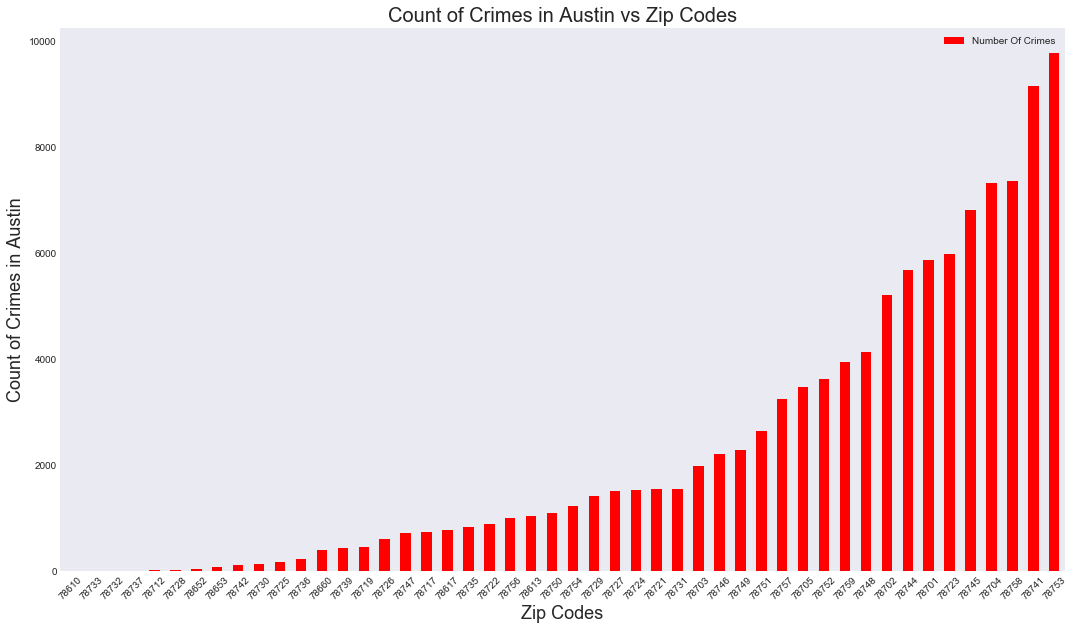

In [81]:
plt.style.use('seaborn-dark')

df_crime_zip_code.plot(x='Zip',y='Number Of Crimes', kind='bar',figsize=(18,10),color=['red','yellow','black']);
plt.xticks(rotation=45);
plt.xlabel('Zip Codes' ,fontsize=(18))
plt.ylabel('Count of Crimes in Austin',fontsize=(18))
plt.title('Count of Crimes in Austin vs Zip Codes',fontsize=(20));